In [5]:
import requests

# Mapping of file identifiers to URLs
files = {
    "^CNXIT": "https://www.niftyindices.com/IndexConstituent/ind_niftyitlist.csv",
    "^CNXAUTO": "https://www.niftyindices.com/IndexConstituent/ind_niftyautolist.csv",
    "^NSEBANK": "https://www.niftyindices.com/IndexConstituent/ind_niftybanklist.csv",
    "^CNXFMCG": "https://www.niftyindices.com/IndexConstituent/ind_niftyfmcglist.csv",
    "^CNXMEDIA": "https://www.niftyindices.com/IndexConstituent/ind_niftymedialist.csv",
    "^CNXMETAL": "https://www.niftyindices.com/IndexConstituent/ind_niftymetallist.csv",
    "^CNXPSE": "https://www.niftyindices.com/IndexConstituent/ind_niftypselist.csv",
    "^CNXMNC": "https://www.niftyindices.com/IndexConstituent/ind_niftymnclist.csv",
    "^CNXINFRA": "https://www.niftyindices.com/IndexConstituent/ind_niftyinfralist.csv",
    "^CNXREALTY": "https://www.niftyindices.com/IndexConstituent/ind_niftyrealtylist.csv",
    "^CNXENERGY": "https://www.niftyindices.com/IndexConstituent/ind_niftyenergylist.csv",
    "^CNXPSUBANK": "https://www.niftyindices.com/IndexConstituent/ind_niftypsubanklist.csv",
    "^CNXSERVICE": "https://www.niftyindices.com/IndexConstituent/ind_niftyfinancelist.csv",
    "^CNXCONSUM": "https://www.niftyindices.com/IndexConstituent/ind_niftyconsumptionlist.csv",
    "NIFTY_MIDCAP_100.NS": "https://www.niftyindices.com/IndexConstituent/ind_niftymidcap100list.csv"
}

# Common headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/115.0.0.0 Safari/537.36"
}

# Download each file
for name, url in files.items():
    print(f"Downloading {name} from {url}...")
    try:
        with requests.get(url, headers=headers, timeout=15, stream=True) as response:
            response.raise_for_status()  # Raises an HTTPError for bad responses
            filename = f"{name}.csv"
            with open(filename, "wb") as file:
                for chunk in response.iter_content(chunk_size=8192):
                    if chunk:  # Filter out keep-alive chunks
                        file.write(chunk)
        print(f"{filename} downloaded successfully!")
    except requests.exceptions.Timeout:
        print(f"Timeout error: Could not download {name} within the specified time.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {name}: {e}")

^CNXIT.csv downloaded successfully!
^CNXAUTO.csv downloaded successfully!
^NSEBANK.csv downloaded successfully!
^CNXFMCG.csv downloaded successfully!
^CNXMEDIA.csv downloaded successfully!
^CNXMETAL.csv downloaded successfully!
^CNXPSE.csv downloaded successfully!
^CNXMNC.csv downloaded successfully!
^CNXINFRA.csv downloaded successfully!
^CNXREALTY.csv downloaded successfully!
^CNXENERGY.csv downloaded successfully!
^CNXPSUBANK.csv downloaded successfully!
^CNXSERVICE.csv downloaded successfully!
^CNXCONSUM.csv downloaded successfully!
NIFTY_MIDCAP_100.NS.csv downloaded successfully!


In [7]:
import pandas as pd

# Dictionary of sector identifiers to CSV file names
# (Matches the naming convention from the previous download code)
sector_files = {
    "^CNXIT": "^CNXIT.csv",
    "^CNXAUTO": "^CNXAUTO.csv",
    "^NSEBANK": "^NSEBANK.csv",
    "^CNXFMCG": "^CNXFMCG.csv",
    "^CNXMEDIA": "^CNXMEDIA.csv",
    "^CNXMETAL": "^CNXMETAL.csv",
    "^CNXPSE": "^CNXPSE.csv",
    "^CNXMNC": "^CNXMNC.csv",
    "^CNXINFRA": "^CNXINFRA.csv",
    "^CNXREALTY": "^CNXREALTY.csv",
    "^CNXENERGY": "^CNXENERGY.csv",
    "^CNXPSUBANK": "^CNXPSUBANK.csv",
    "^CNXSERVICE": "^CNXSERVICE.csv",
    "^CNXCONSUM": "^CNXCONSUM.csv",
    "NIFTY_MIDCAP_100.NS": "NIFTY_MIDCAP_100.NS.csv"
}

# Dictionary to hold symbols for each sector
all_symbols = {}

for sector, filename in sector_files.items():
    try:
        # Read the CSV into a DataFrame
        df = pd.read_csv(filename)
        
        # Extract the 'Symbol' column as a list
        symbols = df['Symbol'].tolist()
        
        # Store the list of symbols in a dictionary
        all_symbols[sector] = symbols
        
        # Print or otherwise use the symbols
        print(f"Symbols for {sector}:")
        print(symbols)
        print("----------")
    except FileNotFoundError:
        print(f"File not found: {filename}. Please ensure it is downloaded.")
    except KeyError:
        print(f"'Symbol' column not found in {filename}. Check the CSV structure.")
    except Exception as e:
        print(f"An error occurred while processing {filename}: {e}")

# Now all_symbols dictionary holds all sector symbols

Symbols for ^CNXIT:
['COFORGE', 'HCLTECH', 'INFY', 'LTIM', 'MPHASIS', 'OFSS', 'PERSISTENT', 'TCS', 'TECHM', 'WIPRO']
----------
Symbols for ^CNXAUTO:
['ASHOKLEY', 'BAJAJ-AUTO', 'BALKRISIND', 'BHARATFORG', 'BOSCHLTD', 'EICHERMOT', 'EXIDEIND', 'HEROMOTOCO', 'MRF', 'M&M', 'MARUTI', 'MOTHERSON', 'TVSMOTOR', 'TATAMOTORS', 'TIINDIA']
----------
Symbols for ^NSEBANK:
['AUBANK', 'AXISBANK', 'BANKBARODA', 'CANBK', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'SBIN']
----------
Symbols for ^CNXFMCG:
['BRITANNIA', 'COLPAL', 'DABUR', 'EMAMILTD', 'GODREJCP', 'HINDUNILVR', 'ITC', 'MARICO', 'NESTLEIND', 'PATANJALI', 'RADICO', 'TATACONSUM', 'UBL', 'UNITDSPR', 'VBL']
----------
Symbols for ^CNXMEDIA:
['DBCORP', 'DISHTV', 'HATHWAY', 'NAZARA', 'NETWORK18', 'PVRINOX', 'SAREGAMA', 'SUNTV', 'TIPSMUSIC', 'ZEEL']
----------
Symbols for ^CNXMETAL:
['APLAPOLLO', 'ADANIENT', 'HINDALCO', 'HINDCOPPER', 'HINDZINC', 'JSWSTEEL', 'JSL', 'JINDALSTEL', 'LLOYDSME', 'NMDC', 'NATIO

Extracted 10 symbols for ^CNXIT:
['COFORGE', 'HCLTECH', 'INFY', 'LTIM', 'MPHASIS', 'OFSS', 'PERSISTENT', 'TCS', 'TECHM', 'WIPRO']
----------
Extracted 15 symbols for ^CNXAUTO:
['ASHOKLEY', 'BAJAJ-AUTO', 'BALKRISIND', 'BHARATFORG', 'BOSCHLTD', 'EICHERMOT', 'EXIDEIND', 'HEROMOTOCO', 'MRF', 'M&M', 'MARUTI', 'MOTHERSON', 'TVSMOTOR', 'TATAMOTORS', 'TIINDIA']
----------
Extracted 12 symbols for ^NSEBANK:
['AUBANK', 'AXISBANK', 'BANKBARODA', 'CANBK', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'SBIN']
----------
Extracted 15 symbols for ^CNXFMCG:
['BRITANNIA', 'COLPAL', 'DABUR', 'EMAMILTD', 'GODREJCP', 'HINDUNILVR', 'ITC', 'MARICO', 'NESTLEIND', 'PATANJALI', 'RADICO', 'TATACONSUM', 'UBL', 'UNITDSPR', 'VBL']
----------
Extracted 10 symbols for ^CNXMEDIA:
['DBCORP', 'DISHTV', 'HATHWAY', 'NAZARA', 'NETWORK18', 'PVRINOX', 'SAREGAMA', 'SUNTV', 'TIPSMUSIC', 'ZEEL']
----------
Extracted 15 symbols for ^CNXMETAL:
['APLAPOLLO', 'ADANIENT', 'HINDALCO', 'HINDCO

Enter the number of years for simulation (1-15):  5



Correlation Matrix of Sector Returns (Last 5 Years):
                           ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA  \
Ticker                     ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA   
            Ticker                                                          
^CNXIT      ^CNXIT       1.000000  0.421854  0.361453  0.363238  0.337614   
^CNXAUTO    ^CNXAUTO     0.421854  1.000000  0.635744  0.500177  0.560622   
^NSEBANK    ^NSEBANK     0.361453  0.635744  1.000000  0.409216  0.466591   
^CNXFMCG    ^CNXFMCG     0.363238  0.500177  0.409216  1.000000  0.369587   
^CNXMEDIA   ^CNXMEDIA    0.337614  0.560622  0.466591  0.369587  1.000000   
^CNXMETAL   ^CNXMETAL    0.387589  0.580438  0.559264  0.355521  0.537234   
^CNXPSE     ^CNXPSE      0.306242  0.578412  0.540702  0.343188  0.566691   
^CNXMNC     ^CNXMNC      0.501160  0.776448  0.610979  0.744360  0.593041   
^CNXINFRA   ^CNXINFRA    0.457816  0.731548  0.689895  0.509313  0.612217   
^CNXREALTY  ^CNXREALTY

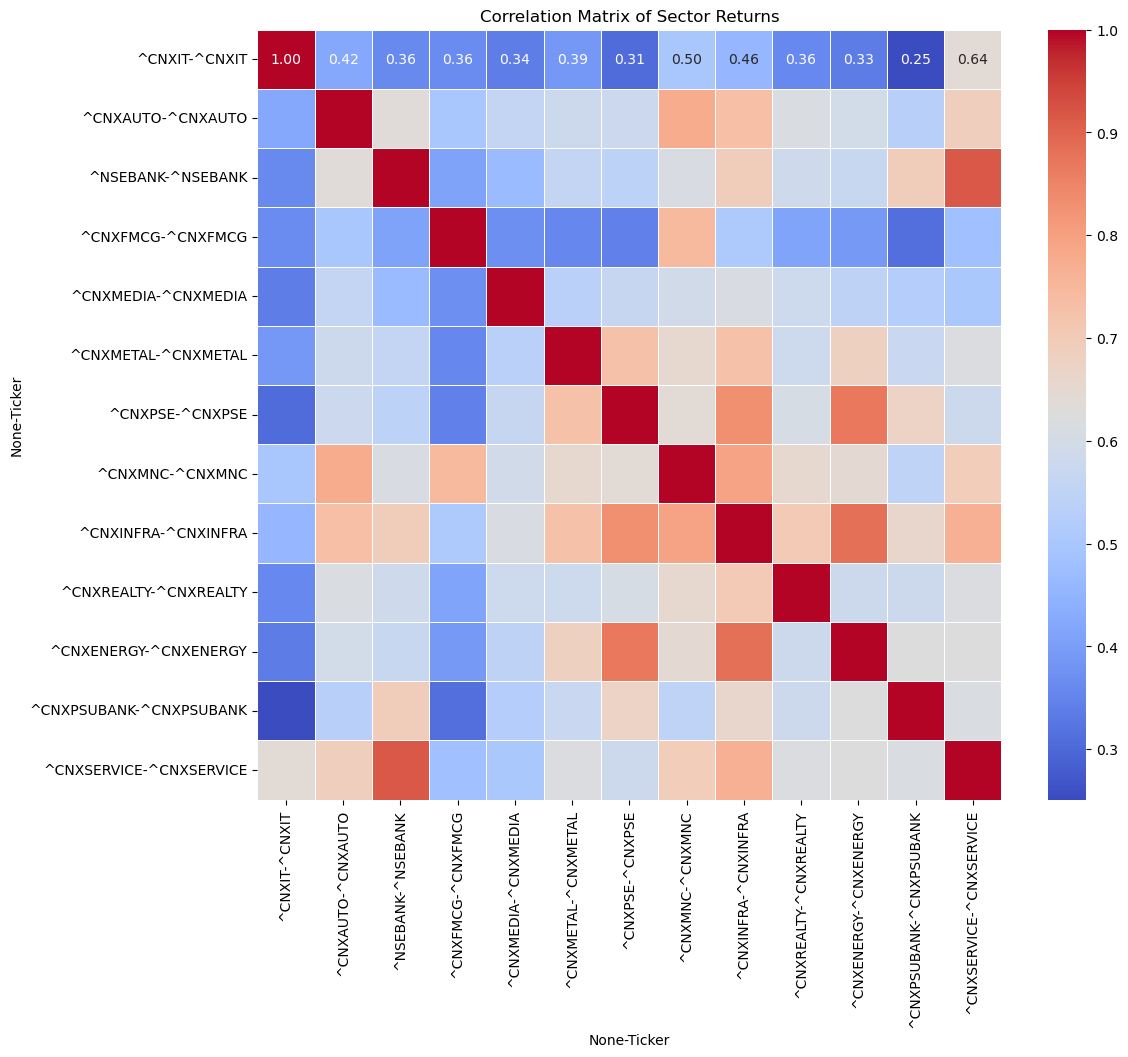

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector Cluster Mapping (for Diversification):
  ('^CNXIT', '^CNXIT'): Cluster 2
  ('^CNXAUTO', '^CNXAUTO'): Cluster 1
  ('^NSEBANK', '^NSEBANK'): Cluster 1
  ('^CNXFMCG', '^CNXFMCG'): Cluster 1
  ('^CNXMEDIA', '^CNXMEDIA'): Cluster 0
  ('^CNXMETAL', '^CNXMETAL'): Cluster 1
  ('^CNXPSE', '^CNXPSE'): Cluster 1
  ('^CNXMNC', '^CNXMNC'): Cluster 1
  ('^CNXINFRA', '^CNXINFRA'): Cluster 1
  ('^CNXREALTY', '^CNXREALTY'): Cluster 0
  ('^CNXENERGY', '^CNXENERGY'): Cluster 1
  ('^CNXPSUBANK', '^CNXPSUBANK'): Cluster 0
  ('^CNXSERVICE', '^CNXSERVICE'): Cluster 1

--- Combined Macro (Sector) and Micro (Stock) Rebalancing Simulation ---

Period 2020-07-01 to 2020-09-30:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXMEDIA', '^CNXMEDIA'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMEDIA', '^CNXMEDIA'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & W

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2021-01-01 to 2021-03-31:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXAUTO', '^CNXAUTO'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
  Raw Portfolio Return: 5.93%
  Effective Portfolio Return: 5.93%
  Cumulative Portfolio Value: ₹137,815.40
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2021-04-01 to 2021-06-30:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXAUTO', '^CNXAUTO'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
  Raw Portfolio Return: 8.87%
  Effective Portfolio Return: 8.87%
  Cumulative Portfolio Value: ₹150,042.29
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2021-07-01 to 2021-09-30:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXMNC', '^CNXMNC'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXMNC', '^CNXMNC'): 100.00%
  Raw Portfolio Return: 17.03%
  Effective Portfolio Return: 17.03%
  Cumulative Portfolio Value: ₹175,598.88
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2021-10-01 to 2021-12-31:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
    ('^CNXMNC', '^CNXMNC'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXMNC', '^CNXMNC'): 100.00%
  Raw Portfolio Return: 1.55%
  Effective Portfolio Return: 1.55%
  Cumulative Portfolio Value: ₹178,326.72
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2022-01-01 to 2022-03-31:
  Risk Factor: 0.99
  Selected Sectors & HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
    ('^CNXMNC', '^CNXMNC'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXMNC', '^CNXMNC'): 100.00%
  Raw Portfolio Return: -4.27%
  Effective Portfolio Return: -4.23%
  Cumulative Portfolio Value: ₹170,786.38
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2022-04-01 to 2022-06-30:
  Risk Factor: 0.99
  Selected Sectors & HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXENERGY', '^CNXENERGY'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXENERGY', '^CNXENERGY'): 100.00%
  Raw Portfolio Return: -13.75%
  Effective Portfolio Return: -13.63%
  Cumulative Portfolio Value: ₹147,509.32
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2022-07-01 to 2022-09-30:
  Risk Factor: 0.89
  Selected Sectors & HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXENERGY', '^CNXENERGY'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXAUTO', '^CNXAUTO'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
  Raw Portfolio Return: 3.33%
  Effective Portfolio Return: 2.97%
  Cumulative Portfolio Value: ₹151,894.67
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2022-10-01 to 2022-12-31:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXENERGY', '^CNXENERGY'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXENERGY', '^CNXENERGY'): 100.00%
  Raw Portfolio Return: 5.94%
  Effective Portfolio Return: 5.94%
  Cumulative Portfolio Value: ₹160,918.75
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2023-01-01 to 2023-03-31:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXPSUBANK', '^CNXPSUBANK'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXENERGY', '^CNXENERGY'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXENERGY', '^CNXENERGY'): 100.00%
  Raw Portfolio Return: -10.83%
  Effective Portfolio Return: -10.83%
  Cumulative Portfolio Value: ₹143,498.34
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2023-04-01 to 2023-06-30:
  Risk Factor: 0.95
  Selected Sectors & HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXPSUBANK', '^CNXPSUBANK'): 100.00%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
    ('^CNXAUTO', '^CNXAUTO'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
  Raw Portfolio Return: 11.83%
  Effective Portfolio Return: 11.28%
  Cumulative Portfolio Value: ₹159,688.99
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2023-07-01 to 2023-09-30:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
    ('^CNXMNC', '^CNXMNC'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXMNC', '^CNXMNC'): 100.00%
  Raw Portfolio Return: 4.88%
  Effective Portfolio Return: 4.88%
  Cumulative Portfolio Value: ₹167,486.00
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2023-10-01 to 2023-12-31:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXPSUBANK', '^CNXPSUBANK'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXAUTO', '^CNXAUTO'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXMETAL', '^CNXMETAL'): 100.00%
  Raw Portfolio Return: 14.37%
  Effective Portfolio Return: 14.37%
  Cumulative Portfolio Value: ₹191,550.49
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2024-01-01 to 2024-03-31:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXPSE', '^CNXPSE'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXPSE', '^CNXPSE'): 100.00%
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
  Raw Portfolio Return: 10.71%
  Effective Portfolio Return: 10.71%
  Cumulative Portfolio Value: ₹212,055.98
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2024-04-01 to 2024-06-30:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
    ('^CNXPSE', '^CNXPSE'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXPSE', '^CNXPSE'): 100.00%
  Raw Portfolio Return: 11.63%
  Effective Portfolio Return: 11.63%
  Cumulative Portfolio Value: ₹236,726.36
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2024-07-01 to 2024-09-30:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXMNC', '^CNXMNC'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXMNC', '^CNXMNC'): 100.00%
  Raw Portfolio Return: 8.66%
  Effective Portfolio Return: 8.66%
  Cumulative Portfolio Value: ₹257,238.16
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Period 2024-10-01 to 2024-12-31:
  Risk Factor: 1.00
  Selected Sectors & HRP Weights:
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXAUTO', '^CNXAUTO'): 100.00%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
      Top 5 Stocks & Weights:
        ('^CNXREALTY', '^CNXREALTY'): 100.00%
    ('^CNXIT', '^CNXIT'): 28.04%
      Top 5 Stocks & Weights:
        ('^CNXIT', '^CNXIT'): 100.00%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
      Top 5 Stocks & Weights:
        ('^CNXINFRA', '^CNXINFRA'): 100.00%
    ('^CNXMNC', '^CNXMNC'): 44.86%
      Top 5 Stocks & Weights:
        ('^CNXMNC', '^CNXMNC'): 100.00%
  Raw Portfolio Return: -8.59%
  Effective Portfolio Return: -8.59%
  Cumulative Portfolio Value: ₹235,151.72
--------------------------------------------------------------------------------

=== NIFTY 50 Benchmark Performance (5 Years) ===
Time Period  Total Return (%)  CAGR (%)  Final Portfolio Value
    5 Years            190.94     23.81              290944.24

===

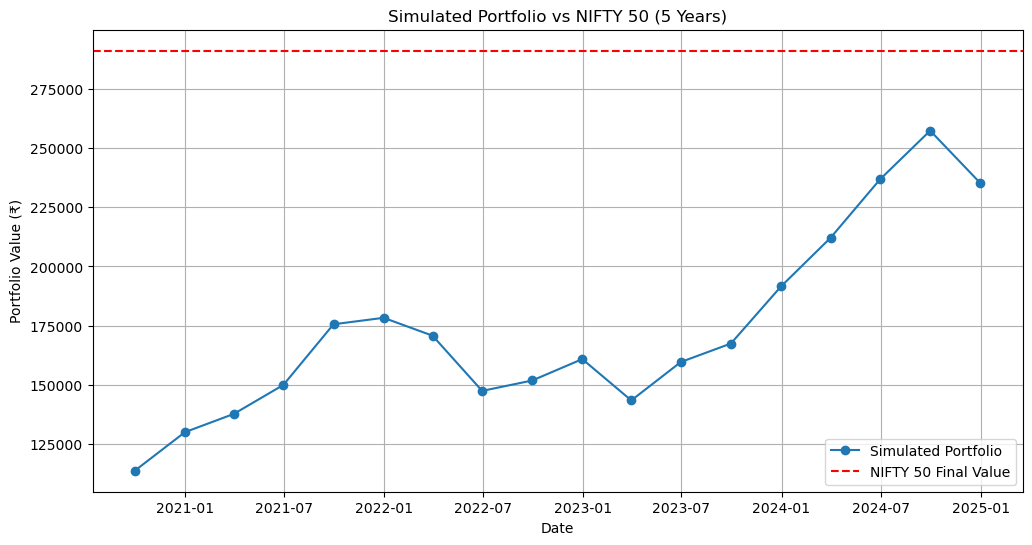


--- Investment Advice as of 2025-03-31 ---
Using training data from 2024-07-21 to 2025-03-30:

--- Top 3 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
  ('^CNXIT', '^CNXIT'): 50.00%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 37.50%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXMETAL', '^CNXMETAL')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
  ('^CNXIT', '^CNXIT'): 47.37%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 31.58%
  ('^CNXMETAL', '^CNXMETAL'): 10.53%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXMETAL', '

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1752892463.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

##############################################
# PART 1: Extract Component Data from CSVs
##############################################
# --- These CSV files should have been downloaded already ---
# Mapping of sector index symbols to CSV filenames
sector_files = {
    "^CNXIT": "^CNXIT.csv",
    "^CNXAUTO": "^CNXAUTO.csv",
    "^NSEBANK": "^NSEBANK.csv",
    "^CNXFMCG": "^CNXFMCG.csv",
    "^CNXMEDIA": "^CNXMEDIA.csv",
    "^CNXMETAL": "^CNXMETAL.csv",
    "^CNXPSE": "^CNXPSE.csv",
    "^CNXMNC": "^CNXMNC.csv",
    "^CNXINFRA": "^CNXINFRA.csv",
    "^CNXREALTY": "^CNXREALTY.csv",
    "^CNXENERGY": "^CNXENERGY.csv",
    "^CNXPSUBANK": "^CNXPSUBANK.csv",
    "^CNXSERVICE": "^CNXSERVICE.csv",
    "^CNXCONSUM": "^CNXCONSUM.csv",
    "NIFTY_MIDCAP_100.NS": "NIFTY_MIDCAP_100.NS.csv"
}

# Build a dictionary mapping sector tickers to their list of constituent stock symbols.
sector_stock_dict = {}
for sector, filename in sector_files.items():
    try:
        df = pd.read_csv(filename)
        # Expecting a column named 'Symbol'
        symbols = df['Symbol'].dropna().tolist()
        # (Optional) Modify symbols if necessary, e.g., adding ".NS" suffix if not present.
        # symbols = [s if s.endswith('.NS') else s + '.NS' for s in symbols]
        sector_stock_dict[sector] = symbols
        print(f"Extracted {len(symbols)} symbols for {sector}:")
        print(symbols)
        print("----------")
    except FileNotFoundError:
        print(f"File not found: {filename}. Please ensure it is downloaded.")
    except KeyError:
        print(f"'Symbol' column not found in {filename}. Check the CSV structure.")
    except Exception as e:
        print(f"Error processing {filename}: {e}")

##############################################
# PART 2: User Input & Data Download (Macro)
##############################################
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-15): "))
        if 1 <= num_years <= 15:
            break
        else:
            print("Please enter a number between 1 and 15.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 15.")

# Define the rebalancing frequency (we use quarterly here)
rebalance_freq = 'Q'  # Quarterly rebalancing

# Define sector tickers (for macro-level data)
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
    # You may add others if desired.
]

end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

# Download sector index data (auto-adjusted close prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Align dates across sectors
prices = pd.concat(data_dict, axis=1).dropna()
returns = prices.pct_change().dropna()

# Download benchmark data for trend/stoploss analysis (NIFTY 50)
benchmark_ticker = "^NSEI"
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded for trend analysis.")
benchmark_series = benchmark_data['Close'].squeeze()

##############################################
# PART 3: Macro-Level: Correlation, Clustering & HRP
##############################################
# Compute correlation matrix of sector returns
correlation_matrix = returns.corr()
print(f"\nCorrelation Matrix of Sector Returns (Last {num_years} Years):")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster for diversification.
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values
sector_labels = kmeans.fit_predict(sector_features)
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# HRP Weight Calculation Function (for both sectors and stocks)
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    """
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    corr = returns_df.corr().fillna(0)
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    return weights / weights.sum()

def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification.
    """
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    return selected[:n]

##############################################
# PART 4: Micro-Level: Stock Selection for a Sector
##############################################
def get_stock_allocation_for_sector(sector, period_start, period_end, top_k=5):
    """
    For a given sector (identified by its ticker), download historical stock prices 
    for its constituents (from sector_stock_dict), compute daily returns over a training period,
    and select top_k stocks using HRP on their Sharpe ratios.
    
    Returns a dictionary of stock weights for the sector.
    """
    # If we have no constituents for the sector, default to full allocation to the sector index.
    if sector not in sector_stock_dict or len(sector_stock_dict[sector]) == 0:
        return {sector: 1.0}
    
    stock_list = sector_stock_dict[sector]
    # Use ~1 year of training data prior to period_start
    training_start = period_start - timedelta(days=365)
    stock_data = {}
    for stock in stock_list:
        df = yf.download(stock, start=training_start, end=period_start, progress=False, auto_adjust=True)
        if not df.empty and 'Close' in df.columns:
            stock_data[stock] = df['Close']
    if not stock_data:
        # Fall back to equal weighting if no data
        return {stock: 1/len(stock_list) for stock in stock_list}
    
    stock_prices = pd.concat(stock_data, axis=1).dropna()
    stock_returns = stock_prices.pct_change().dropna()
    if stock_returns.empty or stock_returns.shape[1] < top_k:
        return {stock: 1/len(stock_list) for stock in stock_list}
    
    # Compute Sharpe ratios and select top_k stocks
    sharpe = stock_returns.mean() / stock_returns.std()
    selected_stocks = sharpe.sort_values(ascending=False).index[:top_k].tolist()
    selected_returns = stock_returns[selected_stocks]
    stock_weights = get_hrp_weights(selected_returns)
    return stock_weights.to_dict()

##############################################
# PART 5: Rebalancing Simulation (Macro + Micro)
##############################################
print("\n--- Combined Macro (Sector) and Micro (Stock) Rebalancing Simulation ---\n")
# For this simulation we use quarterly rebalancing
rebalance_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq=rebalance_freq)
initial_capital = 100000
portfolio_value = initial_capital
simulation_details = []

# A helper risk factor function (using benchmark performance over previous quarter)
def get_previous_quarter_risk_factor(i, benchmark_series, rebalance_dates):
    if i == 0:
        return 1.0
    # Define previous quarter's period
    prev_q_start = prices.index[0] if i-1 == 0 else rebalance_dates[i-2] + pd.Timedelta(days=1)
    prev_q_end = rebalance_dates[i-1]
    benchmark_prev = benchmark_series[(benchmark_series.index >= prev_q_start) & (benchmark_series.index <= prev_q_end)]
    if benchmark_prev.empty:
        return 1.0
    prev_return = (benchmark_prev.iloc[-1] / benchmark_prev.iloc[0]) - 1
    # Map return to a risk factor between 0.5 and 1.0
    risk_factor = np.clip(1 + prev_return, 0.5, 1.0)
    return risk_factor

# For each rebalancing period...
for i, period_end in enumerate(rebalance_dates):
    period_start = prices.index[0] if i == 0 else rebalance_dates[i-1] + pd.Timedelta(days=1)
    if period_start >= prices.index[-1]:
        break

    # Use approximately 1 year of training data for sector analysis
    training_end = period_start - timedelta(days=1)
    training_prices = prices[prices.index <= training_end]
    if training_prices.empty:
        continue
    training_returns = training_prices.pct_change().dropna()
    if training_returns.empty:
        continue

    # Compute Sharpe ratios for sectors and select top sectors (for example, top 5)
    sharpe_scores = training_returns.mean() / training_returns.std()
    selected_sectors = select_diversified_sectors(sharpe_scores, n=5, cluster_map=sector_cluster_map)
    selected_training_returns = training_returns[selected_sectors]
    sector_weights = get_hrp_weights(selected_training_returns)
    sector_allocations = sector_weights.to_dict()

    # For each selected sector, determine micro-level stock allocation.
    stock_allocations = {}
    sector_returns = {}
    for sector in selected_sectors:
        # Get stock-level allocation for this sector (top 5 stocks)
        stock_wts = get_stock_allocation_for_sector(sector, period_start, period_end, top_k=5)
        stock_allocations[sector] = stock_wts
        
        # For simulation, download period prices for each stock in the selected list.
        stock_list = list(stock_wts.keys())
        stock_data = {}
        for stock in stock_list:
            df = yf.download(stock, start=period_start, end=period_end, progress=False, auto_adjust=True)
            if not df.empty and 'Close' in df.columns:
                stock_data[stock] = df['Close']
        if not stock_data:
            # Fall back to sector index if no stock data is available.
            period_price = prices.loc[(prices.index >= period_start) & (prices.index <= period_end), sector]
            if period_price.empty or len(period_price) < 2:
                continue
            start_price = period_price.iloc[0]
            end_price = period_price.iloc[-1]
            sector_returns[sector] = (end_price / start_price) - 1
        else:
            stock_prices = pd.concat(stock_data, axis=1).dropna()
            # Calculate period return for each stock from first to last day
            start_prices = stock_prices.iloc[0]
            end_prices = stock_prices.iloc[-1]
            stock_period_returns = (end_prices / start_prices) - 1
            # Compute weighted return using the micro-level HRP weights
            weighted_stock_return = sum(stock_wts[stk] * stock_period_returns.get(stk, 0) for stk in stock_wts)
            sector_returns[sector] = weighted_stock_return

    # Compute raw portfolio return as the weighted sum of sector returns.
    # Ensure each sector's return is a float.
    raw_portfolio_return = 0.0
    for sec in selected_sectors:
        ret = sector_returns.get(sec, 0)
        if isinstance(ret, pd.Series):
            ret = ret.iloc[0]
        raw_portfolio_return += sector_allocations.get(sec, 0) * ret

    # Get risk factor from previous quarter
    risk_factor = get_previous_quarter_risk_factor(i, benchmark_series, rebalance_dates)
    effective_return = risk_factor * raw_portfolio_return
    
    # Update portfolio value
    portfolio_value *= (1 + effective_return)
    
    # Record details for this period
    simulation_details.append({
        'period_start': period_start,
        'period_end': period_end,
        'selected_sectors': selected_sectors,
        'sector_allocations': sector_allocations,
        'stock_allocations': stock_allocations,  # contains top 5 stocks & weights per sector
        'sector_returns': sector_returns,
        'raw_return': raw_portfolio_return,
        'risk_factor': risk_factor,
        'effective_return': effective_return,
        'portfolio_value': portfolio_value
    })
    
    # Print period summary with sector and micro (stock) details.
    print(f"Period {period_start.date()} to {period_end.date()}:")
    print(f"  Risk Factor: {risk_factor:.2f}")
    print("  Selected Sectors & HRP Weights:")
    for sec in selected_sectors:
        print(f"    {sec}: {sector_allocations.get(sec, 0):.2%}")
        if sec in stock_allocations:
            print("      Top 5 Stocks & Weights:")
            for stock, wt in stock_allocations[sec].items():
                print(f"        {stock}: {wt:.2%}")
    print(f"  Raw Portfolio Return: {float(raw_portfolio_return):.2%}")
    print(f"  Effective Portfolio Return: {float(effective_return):.2%}")
    print(f"  Cumulative Portfolio Value: ₹{portfolio_value:,.2f}")
    print("-" * 80)

##############################################
# PART 6: Benchmark Analysis (NIFTY 50)
##############################################
initial_capital_bench = 100000
filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price_b = float(filtered_data.iloc[0])
end_price_b = float(filtered_data.iloc[-1])
total_return_b = (end_price_b / start_price_b) - 1
cagr_b = ((1 + total_return_b) ** (1/num_years)) - 1
final_value_b = initial_capital_bench * (1 + total_return_b)

benchmark_results = pd.DataFrame([{
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return_b * 100, 2),
    'CAGR (%)': round(cagr_b * 100, 2),
    'Final Portfolio Value': round(final_value_b, 2)
}])
print(f"\n=== NIFTY 50 Benchmark Performance ({num_years} Years) ===")
print(benchmark_results.to_string(index=False))

##############################################
# PART 7: Performance Comparison & Plotting
##############################################
simulation_df = pd.DataFrame(simulation_details)
print("\n=== Final Simulation Details ===")
print(simulation_df[['period_start', 'period_end', 'raw_return', 'risk_factor', 'effective_return', 'portfolio_value']])

plt.figure(figsize=(12, 6))
plt.plot(simulation_df['period_end'], simulation_df['portfolio_value'], marker='o', label='Simulated Portfolio')
plt.axhline(y=final_value_b, color='r', linestyle='--', label='NIFTY 50 Final Value')
plt.title(f"Simulated Portfolio vs NIFTY 50 ({num_years} Years)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (₹)")
plt.legend()
plt.grid(True)
plt.show()

##############################################
# PART 8: Investment Advice Based on Last 1 Year Data
##############################################
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")
for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    selected_training_returns = advice_training_returns[top_n_sectors]
    hrp_weights = get_hrp_weights(selected_training_returns)
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors:", top_n_sectors)
    print("Recommended HRP Weights:")
    for sector in top_n_sectors:
        print(f"  {sector}: {hrp_weights[sector]:.2%}")
    print("-" * 60)

Enter the number of years for simulation (1-15):  5



Correlation Matrix of Sector Returns (Last 5 Years):
               ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG  ^CNXMEDIA  ^CNXMETAL  \
^CNXIT       1.000000  0.421854  0.361453  0.363238   0.337614   0.387589   
^CNXAUTO     0.421854  1.000000  0.635744  0.500177   0.560622   0.580438   
^NSEBANK     0.361453  0.635744  1.000000  0.409216   0.466591   0.559264   
^CNXFMCG     0.363238  0.500177  0.409216  1.000000   0.369587   0.355521   
^CNXMEDIA    0.337614  0.560622  0.466591  0.369587   1.000000   0.537234   
^CNXMETAL    0.387589  0.580438  0.559264  0.355521   0.537234   1.000000   
^CNXPSE      0.306242  0.578412  0.540702  0.343188   0.566691   0.726239   
^CNXMNC      0.501160  0.776448  0.610979  0.744360   0.593041   0.653017   
^CNXINFRA    0.457816  0.731548  0.689895  0.509313   0.612217   0.727624   
^CNXREALTY   0.357333  0.616153  0.587161  0.414523   0.582510   0.583958   
^CNXENERGY   0.334365  0.594910  0.567549  0.389683   0.544661   0.681154   
^CNXPSUBANK  0.250879 

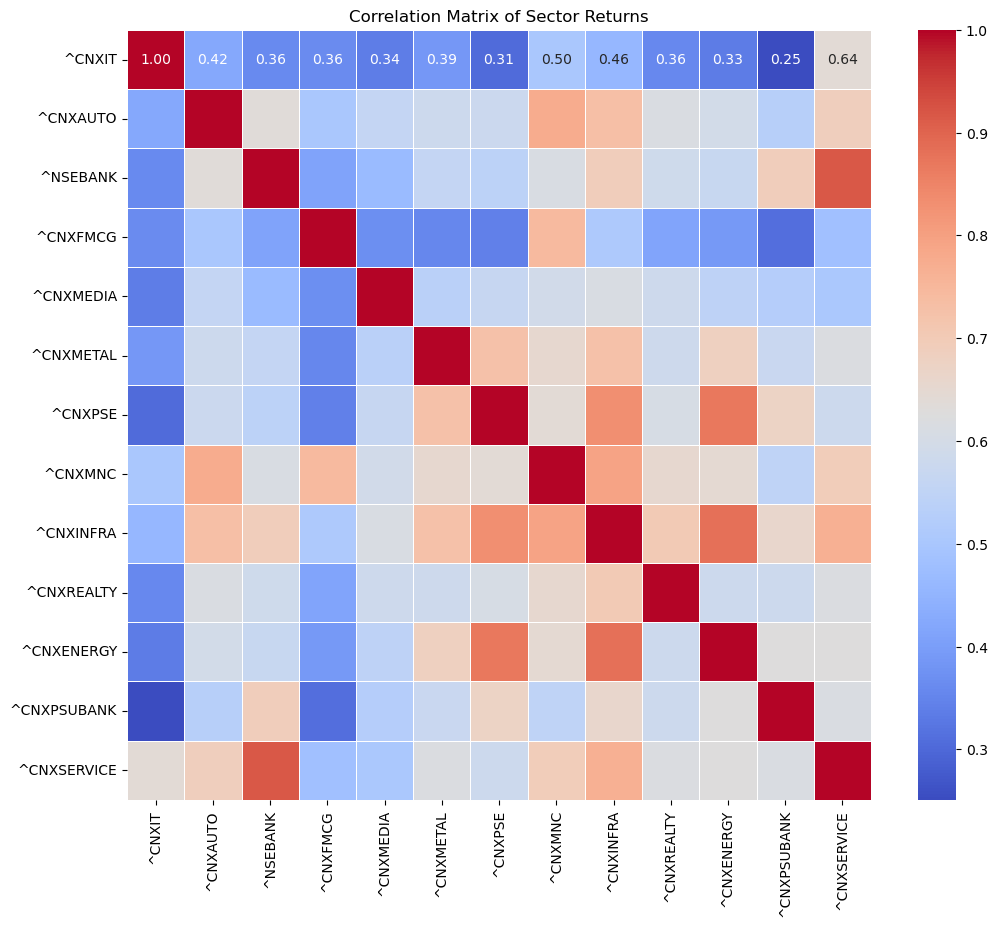

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector Cluster Mapping (for Diversification):
  ^CNXIT: Cluster 2
  ^CNXAUTO: Cluster 1
  ^NSEBANK: Cluster 1
  ^CNXFMCG: Cluster 1
  ^CNXMEDIA: Cluster 0
  ^CNXMETAL: Cluster 1
  ^CNXPSE: Cluster 1
  ^CNXMNC: Cluster 1
  ^CNXINFRA: Cluster 1
  ^CNXREALTY: Cluster 0
  ^CNXENERGY: Cluster 1
  ^CNXPSUBANK: Cluster 0
  ^CNXSERVICE: Cluster 1
Symbols for ^CNXIT: ['COFORGE.NS', 'HCLTECH.NS', 'INFY.NS', 'LTIM.NS', 'MPHASIS.NS', 'OFSS.NS', 'PERSISTENT.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS']
----------
Symbols for ^CNXAUTO: ['ASHOKLEY.NS', 'BAJAJ-AUTO.NS', 'BALKRISIND.NS', 'BHARATFORG.NS', 'BOSCHLTD.NS', 'EICHERMOT.NS', 'EXIDEIND.NS', 'HEROMOTOCO.NS', 'MRF.NS', 'M&M.NS', 'MARUTI.NS', 'MOTHERSON.NS', 'TVSMOTOR.NS', 'TATAMOTORS.NS', 'TIINDIA.NS']
----------
Symbols for ^NSEBANK: ['AUBANK.NS', 'AXISBANK.NS', 'BANKBARODA.NS', 'CANBK.NS', 'FEDERALBNK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'IDFCFIRSTB.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'PNB.NS', 'SBIN.NS']
----------
Symbols for ^CNXFMCG: ['BRITANNI


1 Failed download:
['MAXHEALTH.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1593455400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

2 Failed downloads:
['NAZARA.NS', 'PVRINOX.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1593455400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a futur

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXMEDIA', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
    ^CNXMEDIA: 50.00%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        LTIM.NS: 9.35%
        MPHASIS.NS: 9.35%
        HCLTECH.NS: 8.41%
        TCS.NS: 44.86%
  Raw Portfolio Return: 8.60%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.60%
  Cumulative Value after Transaction Costs: ₹108,435.48
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

2 F

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXAUTO', '^CNXMEDIA']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        LTIM.NS: 9.35%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXAUTO: 12.50%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        BALKRISIND.NS: 9.35%
        M&M.NS: 8.41%
        HEROMOTOCO.NS: 44.86%
        EICHERMOT.NS: 9.35%
    ^CNXMEDIA: 50.00%
  Raw Portfolio Return: 7.50%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹102,859.24
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1609353000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

1 Failed download:
['LODHA.NS']: YFPricesMissingError('possibly delisted; no pric

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        LTIM.NS: 9.35%
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        INFY.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXMETAL: 12.50%
    ^CNXREALTY: 50.00%
  Raw Portfolio Return: 5.93%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.93%
  Cumulative Value after Transaction Costs: ₹108,796.47
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2021-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1617129000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

1 Failed download:
['LODHA.NS']: YFPricesMissingError('possibly delisted; no pric

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXMETAL: 12.50%
    ^CNXREALTY: 50.00%
  Raw Portfolio Return: 5.55%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.55%
  Cumulative Value after Transaction Costs: ₹114,667.18
--------------------------------------------------------------------------------



1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2021-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1624991400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMETAL: 12.50%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        INFY.NS: 8.41%
        WIPRO.NS: 44.86%
        MPHASIS.NS: 9.35%
        LTIM.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        RAYMOND.NS: 9.35%
        LODHA.NS: 8.41%
        DLF.NS: 44.86%
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
  Raw Portfolio Return: 28.69%
  Risk Factor: 1.00
  Effective Portfolio Return: 28.69%
  Cumulative Value after Transaction Costs: ₹147,346.35
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        WIPRO.NS: 44.86%
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 9.35%
        APOLLOHOSP.NS: 8.41%
        MAXHEALTH.NS: 44.86%
        ADANIGREEN.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        LODHA.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 8.41%
        OBEROIRLTY.NS: 44.86%
  Raw Portfolio Return: 9.93%
  Risk Factor: 1.00
  Effective Portfolio Return: 9.93%
  Cumulative Value after Transaction Costs: ₹161,736.43
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        MPHASIS.NS: 9.35%
        TECHM.NS: 44.86%
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        MAXHEALTH.NS: 9.35%
        GRASIM.NS: 8.41%
        TATAPOWER.NS: 44.86%
        ADANIGREEN.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        LODHA.NS: 8.41%
        RAYMOND.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        SOBHA.NS: 9.35%
  Raw Portfolio Return: 0.57%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹153,501.20
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1648665000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in D

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        LTIM.NS: 9.35%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 12.50%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        BRIGADE.NS: 8.41%
        LODHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        OBEROIRLTY.NS: 9.35%
  Raw Portfolio Return: -14.78%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹145,677.46
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

2 Failed downloads:
['AEGISLOG.NS', 'ADANIENSOL.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1656527400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        LTIM.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        LODHA.NS: 28.04%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 9.35%
  Raw Portfolio Return: 2.25%
  Risk Factor: 0.89
  Effective Portfolio Return: 2.01%
  Cumulative Value after Transaction Costs: ₹148,381.60
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-09-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1664476200")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMETAL: 12.50%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        INFY.NS: 8.41%
        LTIM.NS: 9.35%
        HCLTECH.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        RAYMOND.NS: 9.35%
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        LODHA.NS: 44.86%
        OBEROIRLTY.NS: 9.35%
  Raw Portfolio Return: 10.00%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.00%
  Cumulative Value after Transaction Costs: ₹162,975.75
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1672425000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXPSUBANK']
  Sector HRP Weights:
    ^CNXMETAL: 12.50%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        LTIM.NS: 9.35%
        MPHASIS.NS: 9.35%
    ^CNXPSUBANK: 50.00%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 9.35%
        CANBK.NS: 8.41%
        BANKBARODA.NS: 44.86%
        IOB.NS: 28.04%
  Raw Portfolio Return: -6.55%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹154,594.81
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXPSUBANK']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 28.04%
        SIEMENS.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        GRASIM.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        LTIM.NS: 9.35%
        INFY.NS: 44.86%
        COFORGE.NS: 9.35%
    ^CNXPSUBANK: 50.00%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 9.35%
        BANKBARODA.NS: 8.41%
        CANBK.NS: 44.86%
        IOB.NS: 28.04%
  Raw Portfolio Return: 7.35%
  Risk Factor: 0.95
  Effective Portfolio Return: 7.01%
  Cumulative Value after Transaction Costs: ₹165,183.74
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        SIEMENS.NS: 9.35%
        INDHOTEL.NS: 28.04%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        LTIM.NS: 9.35%
        COFORGE.NS: 44.86%
        OFSS.NS: 28.04%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        BRIGADE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        LODHA.NS: 9.35%
  Raw Portfolio Return: 8.99%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.99%
  Cumulative Value after Transaction Costs: ₹179,757.54
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXPSUBANK', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        LT.NS: 9.35%
        CUMMINSIND.NS: 28.04%
        MAXHEALTH.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXPSUBANK: 50.00%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 8.41%
        MAHABANK.NS: 28.04%
        IOB.NS: 9.35%
        CANBK.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        LTIM.NS: 44.86%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 9.35%
  Raw Portfolio Return: 11.84%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹170,513.61
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        LT.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        NTPC.NS: 28.04%
        MAXHEALTH.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        PRESTIGE.NS: 9.35%
        RAYMOND.NS: 8.41%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 28.04%
        LTIM.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
  Raw Portfolio Return: 6.05%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.05%
  Cumulative Value after Transaction Costs: ₹180,557.45
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 28.04%
        LT.NS: 9.35%
        SIEMENS.NS: 9.35%
        MAXHEALTH.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        RAYMOND.NS: 9.35%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
  Raw Portfolio Return: 22.76%
  Risk Factor: 1.00
  Effective Portfolio Return: 22.76%
  Cumulative Value after Transaction Costs: ₹221,320.31
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXAUTO', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXAUTO: 12.50%
      Top Stocks & Weights:
        M&M.NS: 9.35%
        TIINDIA.NS: 28.04%
        TVSMOTOR.NS: 8.41%
        TATAMOTORS.NS: 9.35%
        BAJAJ-AUTO.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        ANANTRAJ.NS: 28.04%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        LTIM.NS: 9.35%
        COFORGE.NS: 44.86%
  Raw Portfolio Return: 18.10%
  Risk Factor: 1.00
  Effective Portfolio Return: 18.10%
  Cumulative Value after Transaction Costs: ₹260,994.12
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXAUTO', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXAUTO: 12.50%
      Top Stocks & Weights:
        M&M.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BAJAJ-AUTO.NS: 44.86%
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
  Raw Portfolio Return: 2.73%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹247,572.64
--------------------------------------------------------------------------------

===== Simulating for Top 4 Sectors =====



C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['MAXHEALTH.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1593455400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

2 Failed downloads:
['PVRINOX.NS', 'NAZARA.NS']: YFPricesMissingError('possibly 

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXMEDIA', '^CNXIT', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
    ^CNXMEDIA: 10.53%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        LTIM.NS: 9.35%
        MPHASIS.NS: 9.35%
        HCLTECH.NS: 8.41%
        TCS.NS: 44.86%
    ^CNXENERGY: 47.37%
  Raw Portfolio Return: 7.24%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.24%
  Cumulative Value after Transaction Costs: ₹107,079.89
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

2 Failed downloads:
['PVRINOX.NS', 'NAZARA.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-09-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1601404200")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_meth

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXAUTO', '^CNXMEDIA', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        LTIM.NS: 9.35%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXAUTO: 10.53%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        BALKRISIND.NS: 9.35%
        M&M.NS: 8.41%
        HEROMOTOCO.NS: 44.86%
        EICHERMOT.NS: 9.35%
    ^CNXMEDIA: 10.53%
    ^CNXMNC: 47.37%
  Raw Portfolio Return: 6.32%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.32%
  Cumulative Value after Transaction Costs: ₹113,673.56
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1609353000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

1 Failed download:
['LODHA.NS']: YFPricesMissingError('possibly delisted; no pric

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        LTIM.NS: 9.35%
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        INFY.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXMETAL: 10.53%
    ^CNXREALTY: 10.53%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        ADANIGREEN.NS: 28.04%
        CGPOWER.NS: 9.35%
        GRASIM.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        GODREJPROP.NS: 44.86%
  Raw Portfolio Return: 10.19%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.19%
  Cumulative Value after Transaction Costs: ₹125,069.90
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2021-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1617129000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in D

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXMETAL: 10.53%
    ^CNXREALTY: 10.53%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 8.41%
        ADANIGREEN.NS: 9.35%
        ADANIPORTS.NS: 44.86%
        CUMMINSIND.NS: 9.35%
  Raw Portfolio Return: 5.87%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.87%
  Cumulative Value after Transaction Costs: ₹132,209.71
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2021-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1624991400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXMETAL: 10.53%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        INFY.NS: 8.41%
        WIPRO.NS: 44.86%
        MPHASIS.NS: 9.35%
        LTIM.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        RAYMOND.NS: 9.35%
        LODHA.NS: 8.41%
        DLF.NS: 44.86%
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 8.41%
        ADANIGREEN.NS: 9.35%
        APOLLOHOSP.NS: 9.35%
        MAXHEALTH.NS: 44.86%
  Raw Portfolio Return: 26.83%
  Risk Factor: 1.00
  Effective Portfolio Return: 26.83%
  Cumulative Value after Transaction Costs: ₹167,434.51
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        WIPRO.NS: 44.86%
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 9.35%
        APOLLOHOSP.NS: 8.41%
        MAXHEALTH.NS: 44.86%
        ADANIGREEN.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        LODHA.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 8.41%
        OBEROIRLTY.NS: 44.86%
    ^CNXMETAL: 47.37%
  Raw Portfolio Return: 8.75%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.75%
  Cumulative Value after Transaction Costs: ₹181,810.98
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 F

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        MPHASIS.NS: 9.35%
        TECHM.NS: 44.86%
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        MAXHEALTH.NS: 9.35%
        GRASIM.NS: 8.41%
        TATAPOWER.NS: 44.86%
        ADANIGREEN.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        LODHA.NS: 8.41%
        RAYMOND.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        SOBHA.NS: 9.35%
    ^CNXMETAL: 47.37%
  Raw Portfolio Return: -1.65%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹172,553.61
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1648665000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        LTIM.NS: 9.35%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 10.53%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        BRIGADE.NS: 8.41%
        LODHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        OBEROIRLTY.NS: 9.35%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        ADANIGREEN.NS: 9.35%
        TATAPOWER.NS: 8.41%
        GRASIM.NS: 44.86%
        MAXHEALTH.NS: 9.35%
  Raw Portfolio Return: -14.46%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹163,758.79
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

2 Failed downloads:
['AEGISLOG.NS', 'ADANIENSOL.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1656527400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 10.53%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        LTIM.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        LODHA.NS: 28.04%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        ADANIGREEN.NS: 9.35%
        MAXHEALTH.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CUMMINSIND.NS: 44.86%
  Raw Portfolio Return: 7.23%
  Risk Factor: 0.89
  Effective Portfolio Return: 6.46%
  Cumulative Value after Transaction Costs: ₹174,070.48
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-09-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1664476200")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXMETAL: 10.53%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        INFY.NS: 8.41%
        LTIM.NS: 9.35%
        HCLTECH.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        RAYMOND.NS: 9.35%
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        LODHA.NS: 44.86%
        OBEROIRLTY.NS: 9.35%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        ADANIGREEN.NS: 44.86%
        MAXHEALTH.NS: 28.04%
        GRASIM.NS: 9.35%
        INDHOTEL.NS: 9.35%
  Raw Portfolio Return: 5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.00%
  Cumulative Value after Transaction Costs: ₹182,494.73
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1672425000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXPSUBANK', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXMETAL: 10.53%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        LTIM.NS: 9.35%
        MPHASIS.NS: 9.35%
    ^CNXPSUBANK: 10.53%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 9.35%
        ADANIGREEN.NS: 44.86%
        MAXHEALTH.NS: 28.04%
        GRASIM.NS: 9.35%
  Raw Portfolio Return: -8.62%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹173,110.04
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 F

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXPSUBANK', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 28.04%
        SIEMENS.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        GRASIM.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        LTIM.NS: 9.35%
        INFY.NS: 44.86%
        COFORGE.NS: 9.35%
    ^CNXPSUBANK: 10.53%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 9.35%
        BANKBARODA.NS: 8.41%
        CANBK.NS: 44.86%
        IOB.NS: 28.04%
    ^CNXMETAL: 47.37%
  Raw Portfolio Return: 4.24%
  Risk Factor: 0.95
  Effective Portfolio Return: 4.05%
  Cumulative Value after Transaction Costs: ₹179,844.68
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        SIEMENS.NS: 9.35%
        INDHOTEL.NS: 28.04%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        LTIM.NS: 9.35%
        COFORGE.NS: 44.86%
        OFSS.NS: 28.04%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        BRIGADE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        LODHA.NS: 9.35%
    ^CNXAUTO: 47.37%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 8.41%
        M&M.NS: 9.35%
        TVSMOTOR.NS: 9.35%
        ASHOKLEY.NS: 44.86%
  Raw Portfolio Return: 6.35%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.35%
  Cumulative Value after Transaction Costs: ₹190,978.27
-

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXPSUBANK', '^CNXIT', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        LT.NS: 9.35%
        CUMMINSIND.NS: 28.04%
        MAXHEALTH.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXPSUBANK: 10.53%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 8.41%
        MAHABANK.NS: 28.04%
        IOB.NS: 9.35%
        CANBK.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        LTIM.NS: 44.86%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 9.35%
    ^CNXAUTO: 47.37%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 9.35%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BHARATFORG.NS: 44.86%
  Raw Portfolio Return: 17.42%
  Risk Factor: 1.00
  Effective Portfolio Return: 17.42%
  Cumulative Value after Transaction Costs: ₹223,910.30
--------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        LT.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        NTPC.NS: 28.04%
        MAXHEALTH.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        PRESTIGE.NS: 9.35%
        RAYMOND.NS: 8.41%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 28.04%
        LTIM.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXPSE: 47.37%
      Top Stocks & Weights:
        HAL.NS: 28.04%
        NTPC.NS: 9.35%
        PFC.NS: 8.41%
        RECLTD.NS: 44.86%
        BEL.NS: 9.35%
  Raw Portfolio Return: 6.06%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.06%
  Cumulative Value after Transaction Costs: ₹237,131.60
-----------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 28.04%
        LT.NS: 9.35%
        SIEMENS.NS: 9.35%
        MAXHEALTH.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        RAYMOND.NS: 9.35%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXAUTO: 47.37%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        M&M.NS: 9.35%
        BAJAJ-AUTO.NS: 44.86%
  Raw Portfolio Return: 13.23%
  Risk Factor: 1.00
  Effective Portfolio Return: 13.23%
  Cumulative Value after Transaction Costs: ₹268,111.60
-

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXAUTO', '^CNXREALTY', '^CNXIT', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXAUTO: 10.53%
      Top Stocks & Weights:
        M&M.NS: 9.35%
        TIINDIA.NS: 28.04%
        TVSMOTOR.NS: 8.41%
        TATAMOTORS.NS: 9.35%
        BAJAJ-AUTO.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        ANANTRAJ.NS: 28.04%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        LTIM.NS: 9.35%
        COFORGE.NS: 44.86%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 9.35%
        SIEMENS.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        TATAPOWER.NS: 28.04%
  Raw Portfolio Return: 12.25%
  Risk Factor: 1.00
  Effective Portfolio Return: 12.25%
  Cumulative Value after Transaction Costs: ₹300,

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXAUTO', '^CNXREALTY', '^CNXIT', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXAUTO: 10.53%
      Top Stocks & Weights:
        M&M.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BAJAJ-AUTO.NS: 44.86%
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 9.35%
        CUMMINSIND.NS: 8.41%
        SIEMENS.NS: 44.86%
        NTPC.NS: 9.35%
        MAXHEALTH.NS: 28.04%
  Raw Portfolio Return: 2.06%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulativ


1 Failed download:
['MAXHEALTH.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1593455400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

2 Failed downloads:
['NAZARA.NS', 'PVRINOX.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1593455400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a futur

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
    ^CNXMEDIA: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        LTIM.NS: 9.35%
        MPHASIS.NS: 9.35%
        HCLTECH.NS: 8.41%
        TCS.NS: 44.86%
    ^CNXENERGY: 44.86%
    ^CNXMNC: 9.35%
  Raw Portfolio Return: 6.43%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.43%
  Cumulative Value after Transaction Costs: ₹106,269.07
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

2 Failed downloads:
['NAZARA.NS', 'PVRINOX.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-09-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1601404200")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_meth

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXAUTO', '^CNXMEDIA', '^CNXMNC', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        LTIM.NS: 9.35%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXAUTO: 8.41%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        BALKRISIND.NS: 9.35%
        M&M.NS: 8.41%
        HEROMOTOCO.NS: 44.86%
        EICHERMOT.NS: 9.35%
    ^CNXMEDIA: 9.35%
    ^CNXMNC: 44.86%
    ^CNXINFRA: 9.35%
      Top Stocks & Weights:
        ADANIGREEN.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 9.35%
        RELIANCE.NS: 8.41%
        GRASIM.NS: 44.86%
  Raw Portfolio Return: 8.39%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.39%
  Cumulative Value after Transaction Costs: ₹115,008.86
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1609353000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

1 Failed download:
['LODHA.NS']: YFPricesMissingError('possibly delisted; no pric

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        LTIM.NS: 9.35%
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        INFY.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXMETAL: 9.35%
    ^CNXREALTY: 9.35%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        ADANIGREEN.NS: 28.04%
        CGPOWER.NS: 9.35%
        GRASIM.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXAUTO: 44.86%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 8.41%
        BALKRISIND.NS: 44.86%
        TATAMOTORS.NS: 9.35%
        MOTHERSON.NS: 9.35%
  Raw Portfolio Return: 15.21%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.21%
  Cumulative Value after Transaction Costs: ₹132,299.63
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2021-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1617129000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in D

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXMETAL: 9.35%
    ^CNXREALTY: 9.35%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 8.41%
        ADANIGREEN.NS: 9.35%
        ADANIPORTS.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXAUTO: 44.86%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 9.35%
        M&M.NS: 8.41%
        MOTHERSON.NS: 9.35%
        BALKRISIND.NS: 44.86%
  Raw Portfolio Return: 11.51%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.51%
  Cumulative Value after Transaction Costs: ₹147,310.48
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2021-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1624991400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC']
  Sector HRP Weights:
    ^CNXMETAL: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        INFY.NS: 8.41%
        WIPRO.NS: 44.86%
        MPHASIS.NS: 9.35%
        LTIM.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        RAYMOND.NS: 9.35%
        LODHA.NS: 8.41%
        DLF.NS: 44.86%
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 8.41%
        ADANIGREEN.NS: 9.35%
        APOLLOHOSP.NS: 9.35%
        MAXHEALTH.NS: 44.86%
    ^CNXMNC: 44.86%
  Raw Portfolio Return: 12.94%
  Risk Factor: 1.00
  Effective Portfolio Return: 12.94%
  Cumulative Value after Transaction Costs: ₹166,123.06
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 F

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMETAL', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        WIPRO.NS: 44.86%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 9.35%
        APOLLOHOSP.NS: 8.41%
        MAXHEALTH.NS: 44.86%
        ADANIGREEN.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        LODHA.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 8.41%
        OBEROIRLTY.NS: 44.86%
    ^CNXMETAL: 9.35%
    ^CNXMNC: 44.86%
  Raw Portfolio Return: 7.52%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.52%
  Cumulative Value after Transaction Costs: ₹178,345.96
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 F

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMETAL', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        MPHASIS.NS: 9.35%
        TECHM.NS: 44.86%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        MAXHEALTH.NS: 9.35%
        GRASIM.NS: 8.41%
        TATAPOWER.NS: 44.86%
        ADANIGREEN.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        LODHA.NS: 8.41%
        RAYMOND.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        SOBHA.NS: 9.35%
    ^CNXMETAL: 9.35%
    ^CNXMNC: 44.86%
  Raw Portfolio Return: -1.51%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹169,265.02
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1648665000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

1 Failed download:
['SOBHA.NS']: YFRateLimitError('Too Many Requests. Rate limite

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        LTIM.NS: 9.35%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 9.35%
    ^CNXREALTY: 9.35%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        ADANIGREEN.NS: 9.35%
        TATAPOWER.NS: 8.41%
        GRASIM.NS: 44.86%
        MAXHEALTH.NS: 9.35%
    ^CNXENERGY: 44.86%
  Raw Portfolio Return: -8.73%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹160,637.82
--------------------------------------------------------------------------------



2 Failed downloads:
['AEGISLOG.NS', 'ADANIENSOL.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1656527400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXENERGY: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        LTIM.NS: 9.35%
    ^CNXREALTY: 8.41%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        LODHA.NS: 28.04%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 9.35%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        ADANIGREEN.NS: 9.35%
        MAXHEALTH.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CUMMINSIND.NS: 44.86%
    ^CNXAUTO: 44.86%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 9.35%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BALKRISIND.NS: 44.86%
  Raw Portfolio Return: 5.30%
  Risk Factor: 0.89
  Effective Portfolio Return: 4.73%
  Cumulative Valu

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-09-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1664476200")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMETAL: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        INFY.NS: 8.41%
        LTIM.NS: 9.35%
        HCLTECH.NS: 44.86%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        RAYMOND.NS: 9.35%
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        LODHA.NS: 44.86%
        OBEROIRLTY.NS: 9.35%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        ADANIGREEN.NS: 44.86%
        MAXHEALTH.NS: 28.04%
        GRASIM.NS: 9.35%
        INDHOTEL.NS: 9.35%
    ^CNXENERGY: 44.86%
  Raw Portfolio Return: 4.42%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.42%
  Cumulative Value after Transaction Costs: ₹175,144.75
--------------------------------------------------------------------------------



1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1672425000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXPSUBANK', '^CNXINFRA', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMETAL: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        LTIM.NS: 9.35%
        MPHASIS.NS: 9.35%
    ^CNXPSUBANK: 9.35%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 9.35%
        CANBK.NS: 8.41%
        BANKBARODA.NS: 44.86%
        IOB.NS: 28.04%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 9.35%
        ADANIGREEN.NS: 44.86%
        MAXHEALTH.NS: 28.04%
        GRASIM.NS: 9.35%
    ^CNXENERGY: 44.86%
  Raw Portfolio Return: -2.11%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹166,138.02
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 F

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXPSUBANK', '^CNXMETAL', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 28.04%
        SIEMENS.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        GRASIM.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        LTIM.NS: 9.35%
        INFY.NS: 44.86%
        COFORGE.NS: 9.35%
    ^CNXPSUBANK: 9.35%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 9.35%
        BANKBARODA.NS: 8.41%
        CANBK.NS: 44.86%
        IOB.NS: 28.04%
    ^CNXMETAL: 9.35%
    ^CNXAUTO: 44.86%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 9.35%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BHARATFORG.NS: 44.86%
  Raw Portfolio Return: 10.84%
  Risk Factor: 0.95
  Effective Portfolio Return: 10.34%
  Cumulative Value after Tran

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXAUTO', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        SIEMENS.NS: 9.35%
        INDHOTEL.NS: 28.04%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        LTIM.NS: 9.35%
        COFORGE.NS: 44.86%
        OFSS.NS: 28.04%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        BRIGADE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        LODHA.NS: 9.35%
    ^CNXAUTO: 9.35%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 8.41%
        M&M.NS: 9.35%
        TVSMOTOR.NS: 9.35%
        ASHOKLEY.NS: 44.86%
    ^CNXMNC: 44.86%
  Raw Portfolio Return: 3.92%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.92%
  Cumulative Value after Tran

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXPSUBANK', '^CNXIT', '^CNXAUTO', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        LT.NS: 9.35%
        CUMMINSIND.NS: 28.04%
        MAXHEALTH.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXPSUBANK: 9.35%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 8.41%
        MAHABANK.NS: 28.04%
        IOB.NS: 9.35%
        CANBK.NS: 44.86%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        LTIM.NS: 44.86%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 9.35%
    ^CNXAUTO: 44.86%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 9.35%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BHARATFORG.NS: 44.86%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        NMDC.NS: 9.35%
        JSL.NS: 8.41%
        WELCORP.NS: 44.86%
        HINDCOPPER.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

5 F

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        LT.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        NTPC.NS: 28.04%
        MAXHEALTH.NS: 44.86%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        PRESTIGE.NS: 9.35%
        RAYMOND.NS: 8.41%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 44.86%
    ^CNXIT: 28.04%
    ^CNXPSE: 44.86%
    ^CNXAUTO: 9.35%
  Raw Portfolio Return: 2.73%
  Risk Factor: 1.00
  Effective Portfolio Return: 2.73%
  Cumulative Value after Transaction Costs: ₹230,482.94
--------------------------------------------------------------------------------



30 Failed downloads:
['MOTHERSON.NS', 'INDUSTOWER.NS', 'CUMMINSIND.NS', 'SHREECEM.NS', 'ASHOKLEY.NS', 'POWERGRID.NS', 'LT.NS', 'APOLLOHOSP.NS', 'CGPOWER.NS', 'ADANIGREEN.NS', 'NTPC.NS', 'IOC.NS', 'BPCL.NS', 'INDHOTEL.NS', 'RELIANCE.NS', 'BHARATFORG.NS', 'TATAPOWER.NS', 'GODREJPROP.NS', 'GRASIM.NS', 'SIEMENS.NS', 'BHARTIARTL.NS', 'DLF.NS', 'ONGC.NS', 'MAXHEALTH.NS', 'ADANIPORTS.NS', 'INDIGO.NS', 'GAIL.NS', 'HINDPETRO.NS', 'AMBUJACEM.NS', 'ULTRACEMCO.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXINFRA.



10 Failed downloads:
['PHOENIXLTD.NS', 'OBEROIRLTY.NS', 'PRESTIGE.NS', 'GODREJPROP.NS', 'BRIGADE.NS', 'RAYMOND.NS', 'SOBHA.NS', 'LODHA.NS', 'ANANTRAJ.NS', 'DLF.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXREALTY.



10 Failed downloads:
['OFSS.NS', 'WIPRO.NS', 'TECHM.NS', 'LTIM.NS', 'PERSISTENT.NS', 'COFORGE.NS', 'TCS.NS', 'HCLTECH.NS', 'INFY.NS', 'MPHASIS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXIT.



15 Failed downloads:
['BOSCHLTD.NS', 'TIINDIA.NS', 'EXIDEIND.NS', 'M&M.NS', 'MARUTI.NS', 'BHARATFORG.NS', 'BAJAJ-AUTO.NS', 'MOTHERSON.NS', 'TATAMOTORS.NS', 'HEROMOTOCO.NS', 'EICHERMOT.NS', 'TVSMOTOR.NS', 'MRF.NS', 'BALKRISIND.NS', 'ASHOKLEY.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXAUTO.



20 Failed downloads:
['POWERGRID.NS', 'RVNL.NS', 'OIL.NS', 'RECLTD.NS', 'IRCTC.NS', 'IRFC.NS', 'BHEL.NS', 'CONCOR.NS', 'BPCL.NS', 'PFC.NS', 'NMDC.NS', 'IOC.NS', 'NTPC.NS', 'NHPC.NS', 'ONGC.NS', 'BEL.NS', 'COALINDIA.NS', 'HAL.NS', 'HINDPETRO.NS', 'GAIL.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


No training data available for stocks in sector ^CNXPSE.



15 Failed downloads:
['TIINDIA.NS', 'BAJAJ-AUTO.NS', 'MOTHERSON.NS', 'BOSCHLTD.NS', 'MARUTI.NS', 'M&M.NS', 'BHARATFORG.NS', 'EXIDEIND.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'TVSMOTOR.NS', 'MRF.NS', 'TATAMOTORS.NS', 'BALKRISIND.NS', 'ASHOKLEY.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXAUTO.



10 Failed downloads:
['GODREJPROP.NS', 'SOBHA.NS', 'RAYMOND.NS', 'LODHA.NS', 'OBEROIRLTY.NS', 'BRIGADE.NS', 'PHOENIXLTD.NS', 'PRESTIGE.NS', 'ANANTRAJ.NS', 'DLF.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXREALTY.



10 Failed downloads:
['PERSISTENT.NS', 'HCLTECH.NS', 'OFSS.NS', 'COFORGE.NS', 'TECHM.NS', 'WIPRO.NS', 'TCS.NS', 'LTIM.NS', 'INFY.NS', 'MPHASIS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXIT.



30 Failed downloads:
['LT.NS', 'APOLLOHOSP.NS', 'ASHOKLEY.NS', 'SHREECEM.NS', 'INDUSTOWER.NS', 'POWERGRID.NS', 'MOTHERSON.NS', 'CUMMINSIND.NS', 'BHARATFORG.NS', 'INDHOTEL.NS', 'ADANIGREEN.NS', 'CGPOWER.NS', 'RELIANCE.NS', 'BPCL.NS', 'IOC.NS', 'NTPC.NS', 'GODREJPROP.NS', 'ONGC.NS', 'MAXHEALTH.NS', 'GRASIM.NS', 'SIEMENS.NS', 'DLF.NS', 'TATAPOWER.NS', 'BHARTIARTL.NS', 'ADANIPORTS.NS', 'ULTRACEMCO.NS', 'GAIL.NS', 'HINDPETRO.NS', 'INDIGO.NS', 'AMBUJACEM.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXINFRA.



30 Failed downloads:
['SCHAEFFLER.NS', 'CUMMINSIND.NS', 'ASHOKLEY.NS', 'HINDUNILVR.NS', 'SUVENPHAR.NS', 'HYUNDAI.NS', 'UNITDSPR.NS', 'OFSS.NS', 'JBCHEPHARM.NS', 'HONAUT.NS', 'UBL.NS', 'CASTROLIND.NS', 'POWERINDIA.NS', 'MARUTI.NS', 'TIMKEN.NS', 'BRITANNIA.NS', 'SKFINDIA.NS', '3MINDIA.NS', 'SIEMENS.NS', 'BOSCHLTD.NS', 'COLPAL.NS', 'NESTLEIND.NS', 'ESCORTS.NS', 'CRISIL.NS', 'ABBOTINDIA.NS', 'VEDL.NS', 'LINDEINDIA.NS', 'ABB.NS', 'AMBUJACEM.NS', 'GLAND.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


No training data available for stocks in sector ^CNXMNC.



15 Failed downloads:
['MOTHERSON.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EXIDEIND.NS', 'BHARATFORG.NS', 'MARUTI.NS', 'TIINDIA.NS', 'BOSCHLTD.NS', 'EICHERMOT.NS', 'TATAMOTORS.NS', 'HEROMOTOCO.NS', 'MRF.NS', 'ASHOKLEY.NS', 'TVSMOTOR.NS', 'BALKRISIND.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXAUTO.



10 Failed downloads:
['SOBHA.NS', 'RAYMOND.NS', 'GODREJPROP.NS', 'BRIGADE.NS', 'PRESTIGE.NS', 'PHOENIXLTD.NS', 'OBEROIRLTY.NS', 'LODHA.NS', 'DLF.NS', 'ANANTRAJ.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXREALTY.



10 Failed downloads:
['WIPRO.NS', 'TCS.NS', 'HCLTECH.NS', 'PERSISTENT.NS', 'LTIM.NS', 'OFSS.NS', 'TECHM.NS', 'COFORGE.NS', 'INFY.NS', 'MPHASIS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXIT.



30 Failed downloads:
['SHREECEM.NS', 'MOTHERSON.NS', 'POWERGRID.NS', 'INDUSTOWER.NS', 'CUMMINSIND.NS', 'APOLLOHOSP.NS', 'LT.NS', 'ASHOKLEY.NS', 'BHARATFORG.NS', 'IOC.NS', 'INDHOTEL.NS', 'NTPC.NS', 'BPCL.NS', 'RELIANCE.NS', 'CGPOWER.NS', 'ADANIGREEN.NS', 'MAXHEALTH.NS', 'TATAPOWER.NS', 'GODREJPROP.NS', 'DLF.NS', 'ONGC.NS', 'SIEMENS.NS', 'GRASIM.NS', 'BHARTIARTL.NS', 'ULTRACEMCO.NS', 'AMBUJACEM.NS', 'GAIL.NS', 'INDIGO.NS', 'ADANIPORTS.NS', 'HINDPETRO.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXINFRA.



30 Failed downloads:
['ASHOKLEY.NS', 'UNITDSPR.NS', 'SUVENPHAR.NS', 'HYUNDAI.NS', 'OFSS.NS', 'SCHAEFFLER.NS', 'HINDUNILVR.NS', 'CUMMINSIND.NS', 'CASTROLIND.NS', 'HONAUT.NS', 'MARUTI.NS', 'TIMKEN.NS', 'POWERINDIA.NS', 'UBL.NS', 'BRITANNIA.NS', 'JBCHEPHARM.NS', 'BOSCHLTD.NS', 'NESTLEIND.NS', 'ESCORTS.NS', 'CRISIL.NS', 'SKFINDIA.NS', '3MINDIA.NS', 'COLPAL.NS', 'SIEMENS.NS', 'ABB.NS', 'GLAND.NS', 'VEDL.NS', 'AMBUJACEM.NS', 'LINDEINDIA.NS', 'ABBOTINDIA.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


No training data available for stocks in sector ^CNXMNC.

===== Simulating for Top 6 Sectors =====




30 Failed downloads:
['APOLLOHOSP.NS', 'LT.NS', 'ASHOKLEY.NS', 'SHREECEM.NS', 'INDUSTOWER.NS', 'MOTHERSON.NS', 'POWERGRID.NS', 'CUMMINSIND.NS', 'NTPC.NS', 'IOC.NS', 'ADANIGREEN.NS', 'INDHOTEL.NS', 'RELIANCE.NS', 'CGPOWER.NS', 'BPCL.NS', 'BHARATFORG.NS', 'TATAPOWER.NS', 'BHARTIARTL.NS', 'DLF.NS', 'GRASIM.NS', 'GODREJPROP.NS', 'ONGC.NS', 'MAXHEALTH.NS', 'SIEMENS.NS', 'HINDPETRO.NS', 'ADANIPORTS.NS', 'INDIGO.NS', 'AMBUJACEM.NS', 'GAIL.NS', 'ULTRACEMCO.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXINFRA.



10 Failed downloads:
['NETWORK18.NS', 'TIPSMUSIC.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'DBCORP.NS', 'DISHTV.NS', 'ZEEL.NS', 'HATHWAY.NS', 'PVRINOX.NS', 'NAZARA.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXMEDIA.



10 Failed downloads:
['COFORGE.NS', 'WIPRO.NS', 'PERSISTENT.NS', 'TCS.NS', 'HCLTECH.NS', 'TECHM.NS', 'OFSS.NS', 'LTIM.NS', 'INFY.NS', 'MPHASIS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXIT.



40 Failed downloads:
['OIL.NS', 'BHEL.NS', 'AEGISLOG.NS', 'GSPL.NS', 'PETRONET.NS', 'ADANIPOWER.NS', 'POWERGRID.NS', 'CESC.NS', 'BPCL.NS', 'NLCINDIA.NS', 'ADANIENSOL.NS', 'RPOWER.NS', 'JPPOWER.NS', 'GVT&D.NS', 'POWERINDIA.NS', 'NHPC.NS', 'CASTROLIND.NS', 'RELIANCE.NS', 'GUJGASLTD.NS', 'ADANIGREEN.NS', 'CGPOWER.NS', 'NTPC.NS', 'SUZLON.NS', 'IGL.NS', 'JSWENERGY.NS', 'TRITURBINE.NS', 'TATAPOWER.NS', 'MGL.NS', 'SIEMENS.NS', 'IOC.NS', 'ONGC.NS', 'INOXWIND.NS', 'SJVN.NS', 'ATGL.NS', 'COALINDIA.NS', 'THERMAX.NS', 'TORNTPOWER.NS', 'ABB.NS', 'HINDPETRO.NS', 'GAIL.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXENERGY.



30 Failed downloads:
['HINDUNILVR.NS', 'UNITDSPR.NS', 'CUMMINSIND.NS', 'ASHOKLEY.NS', 'SUVENPHAR.NS', 'SCHAEFFLER.NS', 'HYUNDAI.NS', 'OFSS.NS', 'UBL.NS', 'MARUTI.NS', 'JBCHEPHARM.NS', 'POWERINDIA.NS', 'CASTROLIND.NS', 'TIMKEN.NS', 'HONAUT.NS', 'BRITANNIA.NS', 'BOSCHLTD.NS', '3MINDIA.NS', 'CRISIL.NS', 'SIEMENS.NS', 'COLPAL.NS', 'ESCORTS.NS', 'NESTLEIND.NS', 'SKFINDIA.NS', 'LINDEINDIA.NS', 'ABB.NS', 'ABBOTINDIA.NS', 'AMBUJACEM.NS', 'GLAND.NS', 'VEDL.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXMNC.



15 Failed downloads:
['TIINDIA.NS', 'MARUTI.NS', 'M&M.NS', 'EXIDEIND.NS', 'BHARATFORG.NS', 'MOTHERSON.NS', 'BAJAJ-AUTO.NS', 'BOSCHLTD.NS', 'TVSMOTOR.NS', 'EICHERMOT.NS', 'MRF.NS', 'ASHOKLEY.NS', 'HEROMOTOCO.NS', 'BALKRISIND.NS', 'TATAMOTORS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


No training data available for stocks in sector ^CNXAUTO.



10 Failed downloads:
['WIPRO.NS', 'TECHM.NS', 'OFSS.NS', 'COFORGE.NS', 'PERSISTENT.NS', 'LTIM.NS', 'TCS.NS', 'HCLTECH.NS', 'INFY.NS', 'MPHASIS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXIT.



15 Failed downloads:
['MOTHERSON.NS', 'BHARATFORG.NS', 'MARUTI.NS', 'BAJAJ-AUTO.NS', 'M&M.NS', 'BOSCHLTD.NS', 'TIINDIA.NS', 'EXIDEIND.NS', 'HEROMOTOCO.NS', 'BALKRISIND.NS', 'EICHERMOT.NS', 'TVSMOTOR.NS', 'ASHOKLEY.NS', 'TATAMOTORS.NS', 'MRF.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXAUTO.



10 Failed downloads:
['HATHWAY.NS', 'ZEEL.NS', 'SAREGAMA.NS', 'TIPSMUSIC.NS', 'DISHTV.NS', 'DBCORP.NS', 'NETWORK18.NS', 'SUNTV.NS', 'PVRINOX.NS', 'NAZARA.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXMEDIA.



30 Failed downloads:
['UNITDSPR.NS', 'ASHOKLEY.NS', 'OFSS.NS', 'SUVENPHAR.NS', 'HINDUNILVR.NS', 'CUMMINSIND.NS', 'SCHAEFFLER.NS', 'HYUNDAI.NS', 'POWERINDIA.NS', 'JBCHEPHARM.NS', 'UBL.NS', 'BRITANNIA.NS', 'CASTROLIND.NS', 'MARUTI.NS', 'TIMKEN.NS', 'HONAUT.NS', 'SIEMENS.NS', '3MINDIA.NS', 'COLPAL.NS', 'SKFINDIA.NS', 'NESTLEIND.NS', 'ESCORTS.NS', 'BOSCHLTD.NS', 'CRISIL.NS', 'ABB.NS', 'AMBUJACEM.NS', 'GLAND.NS', 'VEDL.NS', 'LINDEINDIA.NS', 'ABBOTINDIA.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXMNC.



30 Failed downloads:
['ASHOKLEY.NS', 'INDUSTOWER.NS', 'POWERGRID.NS', 'CUMMINSIND.NS', 'LT.NS', 'MOTHERSON.NS', 'APOLLOHOSP.NS', 'SHREECEM.NS', 'INDHOTEL.NS', 'RELIANCE.NS', 'ADANIGREEN.NS', 'IOC.NS', 'CGPOWER.NS', 'BHARATFORG.NS', 'BPCL.NS', 'NTPC.NS', 'GRASIM.NS', 'DLF.NS', 'SIEMENS.NS', 'ONGC.NS', 'BHARTIARTL.NS', 'GODREJPROP.NS', 'TATAPOWER.NS', 'MAXHEALTH.NS', 'ULTRACEMCO.NS', 'AMBUJACEM.NS', 'HINDPETRO.NS', 'GAIL.NS', 'ADANIPORTS.NS', 'INDIGO.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXINFRA.



40 Failed downloads:
['ADANIPOWER.NS', 'OIL.NS', 'BHEL.NS', 'CESC.NS', 'AEGISLOG.NS', 'PETRONET.NS', 'GSPL.NS', 'POWERGRID.NS', 'NLCINDIA.NS', 'JPPOWER.NS', 'ADANIENSOL.NS', 'POWERINDIA.NS', 'RPOWER.NS', 'NHPC.NS', 'BPCL.NS', 'GVT&D.NS', 'IGL.NS', 'SUZLON.NS', 'RELIANCE.NS', 'GUJGASLTD.NS', 'CASTROLIND.NS', 'CGPOWER.NS', 'ADANIGREEN.NS', 'NTPC.NS', 'IOC.NS', 'INOXWIND.NS', 'TRITURBINE.NS', 'SIEMENS.NS', 'TATAPOWER.NS', 'ONGC.NS', 'JSWENERGY.NS', 'MGL.NS', 'TORNTPOWER.NS', 'THERMAX.NS', 'COALINDIA.NS', 'HINDPETRO.NS', 'ATGL.NS', 'SJVN.NS', 'GAIL.NS', 'ABB.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


No training data available for stocks in sector ^CNXENERGY.



10 Failed downloads:
['PERSISTENT.NS', 'COFORGE.NS', 'LTIM.NS', 'OFSS.NS', 'TECHM.NS', 'HCLTECH.NS', 'TCS.NS', 'WIPRO.NS', 'MPHASIS.NS', 'INFY.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXIT.



15 Failed downloads:
['HINDALCO.NS', 'JSWSTEEL.NS', 'NMDC.NS', 'NATIONALUM.NS', 'VEDL.NS', 'APLAPOLLO.NS', 'LLOYDSME.NS', 'JSL.NS', 'SAIL.NS', 'TATASTEEL.NS', 'HINDZINC.NS', 'ADANIENT.NS', 'WELCORP.NS', 'JINDALSTEL.NS', 'HINDCOPPER.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXMETAL.



10 Failed downloads:
['OBEROIRLTY.NS', 'GODREJPROP.NS', 'SOBHA.NS', 'RAYMOND.NS', 'PRESTIGE.NS', 'PHOENIXLTD.NS', 'LODHA.NS', 'BRIGADE.NS', 'DLF.NS', 'ANANTRAJ.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXREALTY.



30 Failed downloads:
['SHREECEM.NS', 'POWERGRID.NS', 'ASHOKLEY.NS', 'CUMMINSIND.NS', 'APOLLOHOSP.NS', 'MOTHERSON.NS', 'INDUSTOWER.NS', 'LT.NS', 'CGPOWER.NS', 'INDHOTEL.NS', 'RELIANCE.NS', 'NTPC.NS', 'BHARATFORG.NS', 'BPCL.NS', 'IOC.NS', 'ADANIGREEN.NS', 'MAXHEALTH.NS', 'GODREJPROP.NS', 'SIEMENS.NS', 'ONGC.NS', 'DLF.NS', 'GRASIM.NS', 'TATAPOWER.NS', 'BHARTIARTL.NS', 'ULTRACEMCO.NS', 'HINDPETRO.NS', 'GAIL.NS', 'INDIGO.NS', 'AMBUJACEM.NS', 'ADANIPORTS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXINFRA.



15 Failed downloads:
['BHARATFORG.NS', 'M&M.NS', 'TIINDIA.NS', 'MARUTI.NS', 'BOSCHLTD.NS', 'BAJAJ-AUTO.NS', 'EXIDEIND.NS', 'MOTHERSON.NS', 'BALKRISIND.NS', 'TVSMOTOR.NS', 'ASHOKLEY.NS', 'TATAMOTORS.NS', 'MRF.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXAUTO.



30 Failed downloads:
['SCHAEFFLER.NS', 'HYUNDAI.NS', 'ASHOKLEY.NS', 'OFSS.NS', 'UNITDSPR.NS', 'SUVENPHAR.NS', 'HINDUNILVR.NS', 'CUMMINSIND.NS', 'POWERINDIA.NS', 'UBL.NS', 'MARUTI.NS', 'BRITANNIA.NS', 'HONAUT.NS', 'TIMKEN.NS', 'CASTROLIND.NS', 'JBCHEPHARM.NS', 'BOSCHLTD.NS', 'SKFINDIA.NS', 'SIEMENS.NS', 'CRISIL.NS', 'COLPAL.NS', 'NESTLEIND.NS', 'ESCORTS.NS', '3MINDIA.NS', 'LINDEINDIA.NS', 'GLAND.NS', 'ABB.NS', 'VEDL.NS', 'AMBUJACEM.NS', 'ABBOTINDIA.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


No training data available for stocks in sector ^CNXMNC.



10 Failed downloads:
['COFORGE.NS', 'WIPRO.NS', 'HCLTECH.NS', 'PERSISTENT.NS', 'TECHM.NS', 'OFSS.NS', 'TCS.NS', 'LTIM.NS', 'INFY.NS', 'MPHASIS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXIT.



15 Failed downloads:
['NMDC.NS', 'NATIONALUM.NS', 'JSL.NS', 'HINDALCO.NS', 'LLOYDSME.NS', 'VEDL.NS', 'APLAPOLLO.NS', 'JSWSTEEL.NS', 'SAIL.NS', 'WELCORP.NS', 'TATASTEEL.NS', 'HINDZINC.NS', 'HINDCOPPER.NS', 'JINDALSTEL.NS', 'ADANIENT.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXMETAL.



10 Failed downloads:
['BRIGADE.NS', 'PHOENIXLTD.NS', 'SOBHA.NS', 'RAYMOND.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'LODHA.NS', 'PRESTIGE.NS', 'ANANTRAJ.NS', 'DLF.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXREALTY.



30 Failed downloads:
['INDUSTOWER.NS', 'ASHOKLEY.NS', 'MOTHERSON.NS', 'APOLLOHOSP.NS', 'SHREECEM.NS', 'LT.NS', 'CUMMINSIND.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'CGPOWER.NS', 'BPCL.NS', 'ADANIGREEN.NS', 'BHARATFORG.NS', 'IOC.NS', 'NTPC.NS', 'INDHOTEL.NS', 'MAXHEALTH.NS', 'ONGC.NS', 'DLF.NS', 'TATAPOWER.NS', 'BHARTIARTL.NS', 'GODREJPROP.NS', 'SIEMENS.NS', 'GRASIM.NS', 'AMBUJACEM.NS', 'HINDPETRO.NS', 'GAIL.NS', 'ULTRACEMCO.NS', 'INDIGO.NS', 'ADANIPORTS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXINFRA.



15 Failed downloads:
['MOTHERSON.NS', 'BAJAJ-AUTO.NS', 'EXIDEIND.NS', 'MARUTI.NS', 'BHARATFORG.NS', 'BOSCHLTD.NS', 'M&M.NS', 'TIINDIA.NS', 'EICHERMOT.NS', 'BALKRISIND.NS', 'TATAMOTORS.NS', 'TVSMOTOR.NS', 'ASHOKLEY.NS', 'MRF.NS', 'HEROMOTOCO.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXAUTO.



30 Failed downloads:
['HYUNDAI.NS', 'CUMMINSIND.NS', 'UNITDSPR.NS', 'SCHAEFFLER.NS', 'ASHOKLEY.NS', 'HINDUNILVR.NS', 'SUVENPHAR.NS', 'OFSS.NS', 'MARUTI.NS', 'HONAUT.NS', 'TIMKEN.NS', 'CASTROLIND.NS', 'BRITANNIA.NS', 'UBL.NS', 'JBCHEPHARM.NS', 'POWERINDIA.NS', 'ESCORTS.NS', 'CRISIL.NS', 'SKFINDIA.NS', 'SIEMENS.NS', 'COLPAL.NS', 'BOSCHLTD.NS', '3MINDIA.NS', 'NESTLEIND.NS', 'VEDL.NS', 'ABBOTINDIA.NS', 'GLAND.NS', 'ABB.NS', 'LINDEINDIA.NS', 'AMBUJACEM.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


No training data available for stocks in sector ^CNXMNC.



15 Failed downloads:
['JSL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'NMDC.NS', 'APLAPOLLO.NS', 'VEDL.NS', 'NATIONALUM.NS', 'LLOYDSME.NS', 'TATASTEEL.NS', 'JINDALSTEL.NS', 'SAIL.NS', 'WELCORP.NS', 'HINDCOPPER.NS', 'HINDZINC.NS', 'ADANIENT.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXMETAL.



10 Failed downloads:
['WIPRO.NS', 'LTIM.NS', 'TECHM.NS', 'TCS.NS', 'HCLTECH.NS', 'COFORGE.NS', 'OFSS.NS', 'INFY.NS', 'PERSISTENT.NS', 'MPHASIS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXIT.



10 Failed downloads:
['PHOENIXLTD.NS', 'RAYMOND.NS', 'PRESTIGE.NS', 'SOBHA.NS', 'GODREJPROP.NS', 'LODHA.NS', 'OBEROIRLTY.NS', 'BRIGADE.NS', 'ANANTRAJ.NS', 'DLF.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXREALTY.



30 Failed downloads:
['ASHOKLEY.NS', 'POWERGRID.NS', 'INDUSTOWER.NS', 'CUMMINSIND.NS', 'LT.NS', 'APOLLOHOSP.NS', 'MOTHERSON.NS', 'SHREECEM.NS', 'INDHOTEL.NS', 'RELIANCE.NS', 'ADANIGREEN.NS', 'BHARATFORG.NS', 'CGPOWER.NS', 'IOC.NS', 'BPCL.NS', 'NTPC.NS', 'GRASIM.NS', 'SIEMENS.NS', 'GODREJPROP.NS', 'DLF.NS', 'TATAPOWER.NS', 'BHARTIARTL.NS', 'MAXHEALTH.NS', 'ONGC.NS', 'ULTRACEMCO.NS', 'AMBUJACEM.NS', 'GAIL.NS', 'INDIGO.NS', 'HINDPETRO.NS', 'ADANIPORTS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXINFRA.



30 Failed downloads:
['ASHOKLEY.NS', 'SCHAEFFLER.NS', 'OFSS.NS', 'SUVENPHAR.NS', 'CUMMINSIND.NS', 'HYUNDAI.NS', 'UNITDSPR.NS', 'HINDUNILVR.NS', 'JBCHEPHARM.NS', 'UBL.NS', 'BRITANNIA.NS', 'HONAUT.NS', 'MARUTI.NS', 'TIMKEN.NS', 'POWERINDIA.NS', 'CASTROLIND.NS', 'NESTLEIND.NS', 'ESCORTS.NS', 'COLPAL.NS', '3MINDIA.NS', 'BOSCHLTD.NS', 'CRISIL.NS', 'SIEMENS.NS', 'SKFINDIA.NS', 'AMBUJACEM.NS', 'LINDEINDIA.NS', 'ABBOTINDIA.NS', 'VEDL.NS', 'ABB.NS', 'GLAND.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXMNC.



15 Failed downloads:
['BOSCHLTD.NS', 'BHARATFORG.NS', 'BAJAJ-AUTO.NS', 'MARUTI.NS', 'M&M.NS', 'TIINDIA.NS', 'EXIDEIND.NS', 'MOTHERSON.NS', 'HEROMOTOCO.NS', 'TATAMOTORS.NS', 'ASHOKLEY.NS', 'EICHERMOT.NS', 'TVSMOTOR.NS', 'MRF.NS', 'BALKRISIND.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


No training data available for stocks in sector ^CNXAUTO.



10 Failed downloads:
['COFORGE.NS', 'OFSS.NS', 'TCS.NS', 'LTIM.NS', 'PERSISTENT.NS', 'TECHM.NS', 'WIPRO.NS', 'HCLTECH.NS', 'INFY.NS', 'MPHASIS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXIT.



30 Failed downloads:
['LT.NS', 'POWERGRID.NS', 'SHREECEM.NS', 'CUMMINSIND.NS', 'MOTHERSON.NS', 'ASHOKLEY.NS', 'INDUSTOWER.NS', 'APOLLOHOSP.NS', 'IOC.NS', 'BPCL.NS', 'INDHOTEL.NS', 'BHARATFORG.NS', 'CGPOWER.NS', 'ADANIGREEN.NS', 'NTPC.NS', 'RELIANCE.NS', 'BHARTIARTL.NS', 'ONGC.NS', 'GRASIM.NS', 'TATAPOWER.NS', 'DLF.NS', 'MAXHEALTH.NS', 'GODREJPROP.NS', 'SIEMENS.NS', 'ULTRACEMCO.NS', 'INDIGO.NS', 'AMBUJACEM.NS', 'ADANIPORTS.NS', 'HINDPETRO.NS', 'GAIL.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


No training data available for stocks in sector ^CNXINFRA.



8 Failed downloads:
['RAYMOND.NS', 'PHOENIXLTD.NS', 'BRIGADE.NS', 'PRESTIGE.NS', 'OBEROIRLTY.NS', 'LODHA.NS', 'GODREJPROP.NS', 'SOBHA.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2021-09-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1632940200")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either f

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        MPHASIS.NS: 9.35%
        TECHM.NS: 44.86%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        MAXHEALTH.NS: 9.35%
        GRASIM.NS: 8.41%
        TATAPOWER.NS: 44.86%
        ADANIGREEN.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        LODHA.NS: 8.41%
        RAYMOND.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        SOBHA.NS: 9.35%
    ^CNXMETAL: 8.55%
    ^CNXMNC: 42.74%
    ^CNXSERVICE: 7.69%
  Raw Portfolio Return: -1.42%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹94,908.24
------------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1648665000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        LTIM.NS: 9.35%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 8.55%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        BRIGADE.NS: 8.41%
        LODHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        OBEROIRLTY.NS: 9.35%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        ADANIGREEN.NS: 9.35%
        TATAPOWER.NS: 8.41%
        GRASIM.NS: 44.86%
        MAXHEALTH.NS: 9.35%
    ^CNXENERGY: 42.74%
    ^CNXSERVICE: 7.69%
  Raw Portfolio Return: -8.62%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹90,070.90
--------------------------------------------


2 Failed downloads:
['AEGISLOG.NS', 'ADANIENSOL.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1656527400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 6.84%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        LTIM.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        LODHA.NS: 28.04%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 42.74%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        ADANIGREEN.NS: 9.35%
        MAXHEALTH.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CUMMINSIND.NS: 44.86%
    ^CNXAUTO: 8.55%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 9.35%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BALKRISIND.NS: 44.86%
    ^CNXMETAL: 7.69%
  Raw Portfolio Return: 7.30%
  Risk Factor: 0.89
  Effective Portfol


1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-09-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1664476200")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMETAL: 7.69%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        INFY.NS: 8.41%
        LTIM.NS: 9.35%
        HCLTECH.NS: 44.86%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        RAYMOND.NS: 9.35%
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        LODHA.NS: 44.86%
        OBEROIRLTY.NS: 9.35%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        ADANIGREEN.NS: 44.86%
        MAXHEALTH.NS: 28.04%
        GRASIM.NS: 9.35%
        INDHOTEL.NS: 9.35%
    ^CNXENERGY: 42.74%
    ^CNXAUTO: 8.55%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 9.35%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        EICHERMOT.NS: 44.86%
  Raw Portfolio Return: 3.89%
  Risk Factor: 1.00
  Effective Portfolio R

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2022-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1672425000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXPSUBANK', '^CNXINFRA', '^CNXENERGY', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMETAL: 8.55%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        LTIM.NS: 9.35%
        MPHASIS.NS: 9.35%
    ^CNXPSUBANK: 8.55%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 9.35%
        CANBK.NS: 8.41%
        BANKBARODA.NS: 44.86%
        IOB.NS: 28.04%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 9.35%
        ADANIGREEN.NS: 44.86%
        MAXHEALTH.NS: 28.04%
        GRASIM.NS: 9.35%
    ^CNXENERGY: 42.74%
    ^CNXAUTO: 7.69%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        TATAMOTORS.NS: 9.35%
        BHARATFORG.NS: 44.86%
  Raw Portfolio Return: -2.45%
  STOPLOSS Triggered: Capped Return = -5.00%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXPSUBANK', '^CNXMETAL', '^CNXAUTO', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 28.04%
        SIEMENS.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        GRASIM.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        LTIM.NS: 9.35%
        INFY.NS: 44.86%
        COFORGE.NS: 9.35%
    ^CNXPSUBANK: 8.55%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 9.35%
        BANKBARODA.NS: 8.41%
        CANBK.NS: 44.86%
        IOB.NS: 28.04%
    ^CNXMETAL: 8.55%
    ^CNXAUTO: 7.69%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 9.35%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BHARATFORG.NS: 44.86%
    ^CNXMNC: 42.74%
  Raw Portfolio Return: 4.24%
  Risk Factor: 0.95
  Effective Portfolio Return: 4.04%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXAUTO', '^CNXMNC', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        SIEMENS.NS: 9.35%
        INDHOTEL.NS: 28.04%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        LTIM.NS: 9.35%
        COFORGE.NS: 44.86%
        OFSS.NS: 28.04%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        BRIGADE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        LODHA.NS: 9.35%
    ^CNXAUTO: 7.69%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 8.41%
        M&M.NS: 9.35%
        TVSMOTOR.NS: 9.35%
        ASHOKLEY.NS: 44.86%
    ^CNXMNC: 42.74%
    ^CNXMETAL: 8.55%
  Raw Portfolio Return: 3.55%
  Risk Factor: 1.00
  Effective Portfolio Return: 3

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXPSUBANK', '^CNXIT', '^CNXAUTO', '^CNXMETAL', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        LT.NS: 9.35%
        CUMMINSIND.NS: 28.04%
        MAXHEALTH.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXPSUBANK: 8.55%
      Top Stocks & Weights:
        INDIANB.NS: 9.35%
        SBIN.NS: 8.41%
        MAHABANK.NS: 28.04%
        IOB.NS: 9.35%
        CANBK.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        LTIM.NS: 44.86%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 9.35%
    ^CNXAUTO: 7.69%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 9.35%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BHARATFORG.NS: 44.86%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        NMDC.NS: 9.35%
        JSL.NS: 8.41%
        WELCORP.NS: 44.86%
        HI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE', '^CNXAUTO', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        LT.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        NTPC.NS: 28.04%
        MAXHEALTH.NS: 44.86%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        PRESTIGE.NS: 9.35%
        RAYMOND.NS: 8.41%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 28.04%
        LTIM.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXPSE: 42.74%
      Top Stocks & Weights:
        HAL.NS: 28.04%
        NTPC.NS: 9.35%
        PFC.NS: 8.41%
        RECLTD.NS: 44.86%
        BEL.NS: 9.35%
    ^CNXAUTO: 8.55%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        TVSMOTOR.NS: 8.41%
        TATAMOTORS.NS: 9.35%
        M&M.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXAUTO', '^CNXPSE', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXINFRA: 8.55%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 28.04%
        LT.NS: 9.35%
        SIEMENS.NS: 9.35%
        MAXHEALTH.NS: 44.86%
    ^CNXREALTY: 6.84%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        RAYMOND.NS: 9.35%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXAUTO: 42.74%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        M&M.NS: 9.35%
        BAJAJ-AUTO.NS: 44.86%
    ^CNXPSE: 8.55%
      Top Stocks & Weights:
        HAL.NS: 28.04%
        NTPC.NS: 9.35%
        RECLTD.NS: 8.41%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXAUTO', '^CNXREALTY', '^CNXIT', '^CNXINFRA', '^CNXMNC', '^CNXPSE']
  Sector HRP Weights:
    ^CNXAUTO: 8.55%
      Top Stocks & Weights:
        M&M.NS: 9.35%
        TIINDIA.NS: 28.04%
        TVSMOTOR.NS: 8.41%
        TATAMOTORS.NS: 9.35%
        BAJAJ-AUTO.NS: 44.86%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        RAYMOND.NS: 8.41%
        ANANTRAJ.NS: 28.04%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        LTIM.NS: 9.35%
        COFORGE.NS: 44.86%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 8.41%
        CUMMINSIND.NS: 9.35%
        SIEMENS.NS: 9.35%
        MAXHEALTH.NS: 44.86%
        TATAPOWER.NS: 28.04%
    ^CNXMNC: 8.55%
    ^CNXPSE: 42.74%
      Top Stocks & Weights:
        HAL.NS: 9.35%
        BEL.NS: 9.35%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXAUTO', '^CNXREALTY', '^CNXIT', '^CNXINFRA', '^CNXMNC', '^CNXPSE']
  Sector HRP Weights:
    ^CNXAUTO: 8.55%
      Top Stocks & Weights:
        M&M.NS: 9.35%
        TVSMOTOR.NS: 8.41%
        BAJAJ-AUTO.NS: 44.86%
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 9.35%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 9.35%
        CUMMINSIND.NS: 8.41%
        SIEMENS.NS: 44.86%
        NTPC.NS: 9.35%
        MAXHEALTH.NS: 28.04%
    ^CNXMNC: 8.55%
    ^CNXPSE: 42.74%
      Top Stocks & Weights:
        HAL.NS: 8.41%
        NTPC.NS: 9.35%
        RVNL

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['MAXHEALTH.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1593455400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

2 Failed downloads:
['NAZARA.NS', 'PVRINOX.NS']: YFPricesMissingError('possibly 

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^CNXMNC', '^CNXAUTO', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 7.96%
    ^CNXMEDIA: 7.96%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        LTIM.NS: 9.35%
        MPHASIS.NS: 9.35%
        HCLTECH.NS: 8.41%
        TCS.NS: 44.86%
    ^CNXENERGY: 7.17%
    ^CNXMNC: 6.37%
    ^CNXAUTO: 5.69%
      Top Stocks & Weights:
        BALKRISIND.NS: 8.41%
        M&M.NS: 44.86%
        TIINDIA.NS: 28.04%
        HEROMOTOCO.NS: 9.35%
        BAJAJ-AUTO.NS: 9.35%
    ^CNXMETAL: 40.96%
  Raw Portfolio Return: 6.89%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.89%
  Cumulative Value after Transaction Costs: ₹106,731.68
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

2 Failed downloads:
['NAZARA.NS', 'PVRINOX.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-09-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1601404200")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_meth

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXAUTO', '^CNXMEDIA', '^CNXMNC', '^CNXINFRA', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        LTIM.NS: 9.35%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXAUTO: 7.96%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        BALKRISIND.NS: 9.35%
        M&M.NS: 8.41%
        HEROMOTOCO.NS: 44.86%
        EICHERMOT.NS: 9.35%
    ^CNXMEDIA: 6.37%
    ^CNXMNC: 7.17%
    ^CNXINFRA: 5.69%
      Top Stocks & Weights:
        ADANIGREEN.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 9.35%
        RELIANCE.NS: 8.41%
        GRASIM.NS: 44.86%
    ^CNXENERGY: 40.96%
    ^CNXMETAL: 7.96%
  Raw Portfolio Return: 6.53%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.53%
  Cumulative Value after Transaction Costs: ₹113,527.44
----------------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1609353000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

1 Failed download:
['LODHA.NS']: YFPricesMissingError('possibly delisted; no pric

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        LTIM.NS: 9.35%
        PERSISTENT.NS: 28.04%
        HCLTECH.NS: 8.41%
        INFY.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXMETAL: 7.17%
    ^CNXREALTY: 7.96%
    ^CNXINFRA: 5.69%
    ^CNXAUTO: 40.96%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        M&M.NS: 8.41%
        BALKRISIND.NS: 44.86%
        TATAMOTORS.NS: 9.35%
        MOTHERSON.NS: 9.35%
    ^CNXMNC: 6.37%
    ^CNXSERVICE: 7.96%
  Raw Portfolio Return: 12.77%
  Risk Factor: 1.00
  Effective Portfolio Return: 12.77%
  Cumulative Value after Transaction Costs: ₹127,834.37
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2021-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1617129000")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()

1 Failed download:
['LODHA.NS']: YFPricesMissingError('possibly delisted; no pric

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXMETAL: 7.96%
    ^CNXREALTY: 7.96%
    ^CNXINFRA: 6.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 8.41%
        ADANIGREEN.NS: 9.35%
        ADANIPORTS.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXAUTO: 5.69%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 9.35%
        M&M.NS: 8.41%
        MOTHERSON.NS: 9.35%
        BALKRISIND.NS: 44.86%
    ^CNXMNC: 40.96%
    ^CNXSERVICE: 7.17%
  Raw Portfolio Return: 4.61%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.61%
  Cumulative Value after Transaction Costs: ₹133,520.86
----------------------------------------------------------


1 Failed download:
['LLOYDSME.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-01 -> 2021-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1585679400, endDate = 1624991400")')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:213: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_stock = prices_stock.pct_change().dropna()
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXAUTO', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMETAL: 7.96%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        INFY.NS: 8.41%
        WIPRO.NS: 44.86%
        MPHASIS.NS: 9.35%
        LTIM.NS: 9.35%
    ^CNXREALTY: 7.96%
      Top Stocks & Weights:
        RAYMOND.NS: 9.35%
        LODHA.NS: 8.41%
        DLF.NS: 44.86%
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
    ^CNXINFRA: 6.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 8.41%
        ADANIGREEN.NS: 9.35%
        APOLLOHOSP.NS: 9.35%
        MAXHEALTH.NS: 44.86%
    ^CNXMNC: 5.69%
    ^CNXAUTO: 40.96%
      Top Stocks & Weights:
        TIINDIA.NS: 28.04%
        TATAMOTORS.NS: 8.41%
        BALKRISIND.NS: 9.35%
        MOTHERSON.NS: 9.35%
        BHARATFORG.NS: 44.86%
    ^CNXSERVICE: 7.17%
  Raw Portfolio Return: 12.32%
  Risk Fac

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size

1 F

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMETAL', '^CNXMNC', '^CNXENERGY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        MPHASIS.NS: 9.35%
        LTIM.NS: 9.35%
        INFY.NS: 8.41%
        WIPRO.NS: 44.86%
    ^CNXINFRA: 7.96%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        GRASIM.NS: 9.35%
        APOLLOHOSP.NS: 8.41%
        MAXHEALTH.NS: 44.86%
        ADANIGREEN.NS: 9.35%
    ^CNXREALTY: 7.96%
      Top Stocks & Weights:
        LODHA.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 8.41%
        OBEROIRLTY.NS: 44.86%
    ^CNXMETAL: 6.37%
    ^CNXMNC: 5.69%
    ^CNXENERGY: 7.17%
    ^CNXSERVICE: 40.96%
  Raw Portfolio Return: 6.62%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.62%
  Cumulative Value after Transaction Costs: ₹159,413.87
------------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\2154467367.py:157: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


KeyboardInterrupt: 

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import requests

# =============================================================================
# 0. User Input: Number of Years for Simulation (between 1 and 15)
# =============================================================================
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-15): "))
        if 1 <= num_years <= 15:
            break
        else:
            print("Please enter a number between 1 and 15.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 15.")

# =============================================================================
# 1. Sector Data Download and Preprocessing (using sector indices)
# =============================================================================
# Define sector tickers (for indices)
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define time period based on user input
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

# Download data for each sector (using auto-adjusted prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame with aligned dates and drop missing values
prices = pd.concat(data_dict, axis=1).dropna()

# --- FIX: Reset the columns to be plain sector tickers (not multi-index)
if isinstance(prices.columns, pd.MultiIndex):
    prices.columns = prices.columns.get_level_values(0)

returns = prices.pct_change().dropna()

# =============================================================================
# 2. Download Benchmark Data for Trend/Stoploss Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded for trend analysis.")
benchmark_series = benchmark_data['Close'].squeeze()

# =============================================================================
# 3. Correlation Analysis & Clustering for Diversification (Sector Level)
# =============================================================================
correlation_matrix = returns.corr()
print(f"\nCorrelation Matrix of Sector Returns (Last {num_years} Years):")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster (3 clusters chosen here)
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values
sector_labels = kmeans.fit_predict(sector_features)
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 4. Component Extraction: Read Stock Components for Each Sector from CSVs
# =============================================================================
# (Ensure that the component extraction CSV files have been downloaded and are in your working directory)
sector_files = {
    "^CNXIT": "^CNXIT.csv",
    "^CNXAUTO": "^CNXAUTO.csv",
    "^NSEBANK": "^NSEBANK.csv",
    "^CNXFMCG": "^CNXFMCG.csv",
    "^CNXMEDIA": "^CNXMEDIA.csv",
    "^CNXMETAL": "^CNXMETAL.csv",
    "^CNXPSE": "^CNXPSE.csv",
    "^CNXMNC": "^CNXMNC.csv",
    "^CNXINFRA": "^CNXINFRA.csv",
    "^CNXREALTY": "^CNXREALTY.csv",
    "^CNXENERGY": "^CNXENERGY.csv",
    "^CNXPSUBANK": "^CNXPSUBANK.csv",
    "^CNXSERVICE": "^CNXSERVICE.csv",
    "^CNXCONSUM": "^CNXCONSUM.csv",
    "NIFTY_MIDCAP_100.NS": "NIFTY_MIDCAP_100.NS.csv"
}

all_symbols = {}
for sector, filename in sector_files.items():
    try:
        df = pd.read_csv(filename)
        symbols = df['Symbol'].tolist()
        # --- FIX: Append ".NS" extension if not already present
        symbols = [s if s.endswith('.NS') else s + '.NS' for s in symbols]
        all_symbols[sector] = symbols
        print(f"Symbols for {sector}: {symbols}")
        print("----------")
    except FileNotFoundError:
        print(f"File not found: {filename}. Please ensure it is downloaded.")
    except KeyError:
        print(f"'Symbol' column not found in {filename}. Check the CSV structure.")
    except Exception as e:
        print(f"An error occurred while processing {filename}: {e}")

# =============================================================================
# 5. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    """
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    corr = returns_df.corr().fillna(0)
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    return weights / weights.sum()

# =============================================================================
# 6. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification.
    """
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    return selected[:n]

# =============================================================================
# 7. Function to Select Top Stocks within a Sector
# =============================================================================
def get_top_stocks(sector, train_start, train_end, top_n=5):
    """
    For a given sector, download historical data for all its component stocks over the training period,
    compute Sharpe ratios and then return the top 'top_n' stocks along with their HRP weights.
    """
    symbols = all_symbols.get(sector, [])
    if not symbols:
        print(f"No symbols available for sector {sector}.")
        return [], pd.Series(dtype=float)
    
    # Download historical price data for the stocks in the sector
    stock_data = yf.download(symbols, start=train_start, end=train_end, progress=False, auto_adjust=True)
    
    # Handle the case where multiple tickers are returned with multi-level columns
    if 'Close' in stock_data.columns:
        prices_stock = stock_data['Close']
    else:
        prices_stock = stock_data
    
    prices_stock = prices_stock.dropna(how='all', axis=0)
    if prices_stock.empty:
        print(f"No training data available for stocks in sector {sector}.")
        return [], pd.Series(dtype=float)
    
    returns_stock = prices_stock.pct_change().dropna()
    sharpe = returns_stock.mean() / returns_stock.std()
    sharpe = sharpe.dropna()
    # Select top_n stocks by Sharpe ratio
    top_stocks = sharpe.sort_values(ascending=False).head(top_n).index.tolist()
    selected_returns = returns_stock[top_stocks]
    hrp_weights_stocks = get_hrp_weights(selected_returns)
    return top_stocks, hrp_weights_stocks

# =============================================================================
# 8. Quarterly Rebalancing Simulation with Enhanced Risk Management & Transaction Costs
# =============================================================================
print("\n--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
stoploss_pct = 0.05  # 5% stoploss threshold
transaction_cost_rate = 0.00075  # 0.15% per trade (0.075% per buy and sell)

results_summary = []
all_quarterly_results = {}

# Risk factor function (using benchmark performance of previous quarter)
def get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates):
    if i == 0:
        return 1.0
    prev_q_start = prices.index[0] if i-1 == 0 else quarter_end_dates[i-2] + pd.Timedelta(days=1)
    prev_q_end = quarter_end_dates[i-1]
    benchmark_prev = benchmark_series[(benchmark_series.index >= prev_q_start) & (benchmark_series.index <= prev_q_end)]
    if benchmark_prev.empty:
        return 1.0
    prev_return = (benchmark_prev.iloc[-1] / benchmark_prev.iloc[0]) - 1
    risk_factor = np.clip(1 + prev_return, 0.5, 1.0)
    return risk_factor

# Loop over different numbers of sectors to invest in (from 3 to 10)
for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []
    quarterly_results = []
    
    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        # Use ~1 year of training data prior to quarter start (for sector selection)
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        # Sector-level Sharpe scores & diversified selection
        sharpe_scores = training_returns.mean() / training_returns.std()
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        # Calculate HRP weights for sectors based on training returns
        selected_training_returns = training_returns[selected_sectors]
        sector_hrp_weights = get_hrp_weights(selected_training_returns)
        
        # For each selected sector, determine top 5 stocks and get their HRP weights
        sector_stock_info = {}
        sector_stock_returns = {}
        sector_weighted_returns = {}
        
        for sector in selected_sectors:
            # For stock selection training period, use the same training period as for sectors
            top_stocks, stock_hrp_weights = get_top_stocks(sector, training_prices.index[0].date(), training_end.date(), top_n=5)
            if not top_stocks:
                continue
            # Download price data for these stocks for the current quarter period
            stock_prices = yf.download(top_stocks, start=q_start, end=q_end, progress=False, auto_adjust=True)
            if 'Close' in stock_prices.columns:
                stock_prices = stock_prices['Close']
            stock_prices = stock_prices.dropna(how='all', axis=0)
            if stock_prices.empty or len(stock_prices) < 2:
                continue
            # Compute raw return for each stock (from first to last day of quarter)
            start_prices = stock_prices.iloc[0]
            end_prices = stock_prices.iloc[-1]
            stock_returns = (end_prices / start_prices) - 1
            # Compute weighted return for the sector using the HRP weights from stock training data
            weighted_return = np.dot(stock_hrp_weights[top_stocks], stock_returns[top_stocks])
            
            sector_stock_info[sector] = {
                'top_stocks': top_stocks,
                'stock_hrp_weights': stock_hrp_weights[top_stocks].to_dict()
            }
            sector_stock_returns[sector] = stock_returns.to_dict()
            sector_weighted_returns[sector] = weighted_return
        
        # If none of the sectors returned valid stock info, skip this quarter
        if not sector_weighted_returns:
            continue
        
        # Compute overall portfolio return as weighted sum of (stock-based) sector returns
        overall_return = 0
        for sector in selected_sectors:
            if sector in sector_weighted_returns:
                overall_return += sector_hrp_weights[sector] * sector_weighted_returns[sector]
        
        # --- Intraperiod Stoploss Check using simulated daily returns ---
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        daily_returns = period_prices.pct_change().dropna()
        daily_portfolio_returns = daily_returns.apply(lambda row: np.dot(sector_hrp_weights[selected_sectors], row), axis=1)
        cum_daily = (1 + daily_portfolio_returns).cumprod()
        if cum_daily.min() < (1 - stoploss_pct):
            stoploss_triggered = True
            stoploss_return = -stoploss_pct
        else:
            stoploss_triggered = False
            stoploss_return = overall_return
        
        # Apply risk factor based on previous quarter benchmark performance
        risk_factor = get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates)
        effective_portfolio_return = risk_factor * stoploss_return
        
        # Incorporate transaction costs on entry and exit
        net_value_entry = cumulative_value * (1 - transaction_cost_rate)
        new_value = net_value_entry * (1 + effective_portfolio_return)
        net_value_exit = new_value * (1 - transaction_cost_rate)
        cumulative_value = net_value_exit
        quarterly_returns.append(effective_portfolio_return)
        
        # Store all details of this quarter's simulation
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'sector_hrp_weights': sector_hrp_weights.to_dict(),
            'sector_stock_info': sector_stock_info,
            'sector_stock_returns': sector_stock_returns,
            'sector_weighted_returns': sector_weighted_returns,
            'raw_portfolio_return': overall_return,
            'stoploss_triggered': stoploss_triggered,
            'stoploss_return': stoploss_return,
            'risk_factor': risk_factor,
            'effective_portfolio_return': effective_portfolio_return,
            'cumulative_value': cumulative_value
        })
        
        # Print simulation details for the quarter
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  Sector HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {sector_hrp_weights[sector]:.2%}")
            if sector in sector_stock_info:
                info = sector_stock_info[sector]
                print("      Top Stocks & Weights:")
                for stock, wt in info['stock_hrp_weights'].items():
                    print(f"        {stock}: {wt:.2%}")
        print(f"  Raw Portfolio Return: {overall_return:.2%}")
        if stoploss_triggered:
            print(f"  STOPLOSS Triggered: Capped Return = {stoploss_return:.2%}")
        print(f"  Risk Factor: {risk_factor:.2f}")
        print(f"  Effective Portfolio Return: {effective_portfolio_return:.2%}")
        print(f"  Cumulative Value after Transaction Costs: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan
    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# 9. Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
initial_capital_bench = 100000
benchmark_results = []

filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price = float(filtered_data.iloc[0])
end_price = float(filtered_data.iloc[-1])
total_return = (end_price / start_price) - 1
cagr = ((1 + total_return) ** (1/num_years)) - 1
final_value = initial_capital_bench * (1 + total_return)

benchmark_results.append({
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return * 100, 2),
    'CAGR (%)': round(cagr * 100, 2),
    'Final Portfolio Value': round(final_value, 2)
})

benchmark_results_df = pd.DataFrame(benchmark_results)
print(f"\n=== NIFTY 50 Benchmark Performance ({num_years} Years) ===")
print(benchmark_results_df.to_string(index=False))

nifty_final = final_value
comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_final) / nifty_final * 100
).round(2)

print(f"\n=== Final Performance Comparison ({num_years}-Year Period) ===")
print(comparison_df[['Number of Sectors', 'HRP Portfolio Value', 'NIFTY Value', 'Outperformance (%)']].to_string(index=False))

plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'],
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title(f"HRP Portfolio vs NIFTY 50 Performance ({num_years}-Year Period)")
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')
plt.show()

# =============================================================================
# 10. Investment Advice Based on Last 1 Year Data (Stock-Level)
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")
for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors and Their Top 5 Stocks with Recommended Weights:")
    for sector in top_n_sectors:
        top_stocks, stock_hrp_weights = get_top_stocks(sector, advice_training_prices.index[0].date(), advice_training_end.date(), top_n=5)
        if top_stocks:
            print(f"\nSector: {sector}")
            print(f"  Top Stocks: {top_stocks}")
            print("  Recommended HRP Weights:")
            for stock in top_stocks:
                print(f"    {stock}: {stock_hrp_weights[stock]:.2%}")
    print("-" * 60)

Enter the number of years for simulation (1-15):  6



Correlation Matrix of Sector Returns (Last 6 Years):
               ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG  ^CNXMEDIA  ^CNXMETAL  \
^CNXIT       1.000000  0.456548  0.419099  0.457459   0.377978   0.443924   
^CNXAUTO     0.456548  1.000000  0.694435  0.572279   0.570805   0.634704   
^NSEBANK     0.419099  0.694435  1.000000  0.526534   0.507641   0.606272   
^CNXFMCG     0.457459  0.572279  0.526534  1.000000   0.422219   0.450931   
^CNXMEDIA    0.377978  0.570805  0.507641  0.422219   1.000000   0.555344   
^CNXMETAL    0.443924  0.634704  0.606272  0.450931   0.555344   1.000000   
^CNXPSE      0.382707  0.619587  0.588144  0.450556   0.576247   0.758801   
^CNXMNC      0.549088  0.809589  0.691335  0.793210   0.591340   0.689291   
^CNXINFRA    0.512586  0.762753  0.747125  0.611113   0.609467   0.749805   
^CNXREALTY   0.394097  0.646804  0.641661  0.470985   0.588822   0.611931   
^CNXENERGY   0.421288  0.638844  0.618888  0.499171   0.560837   0.719013   
^CNXPSUBANK  0.295074 

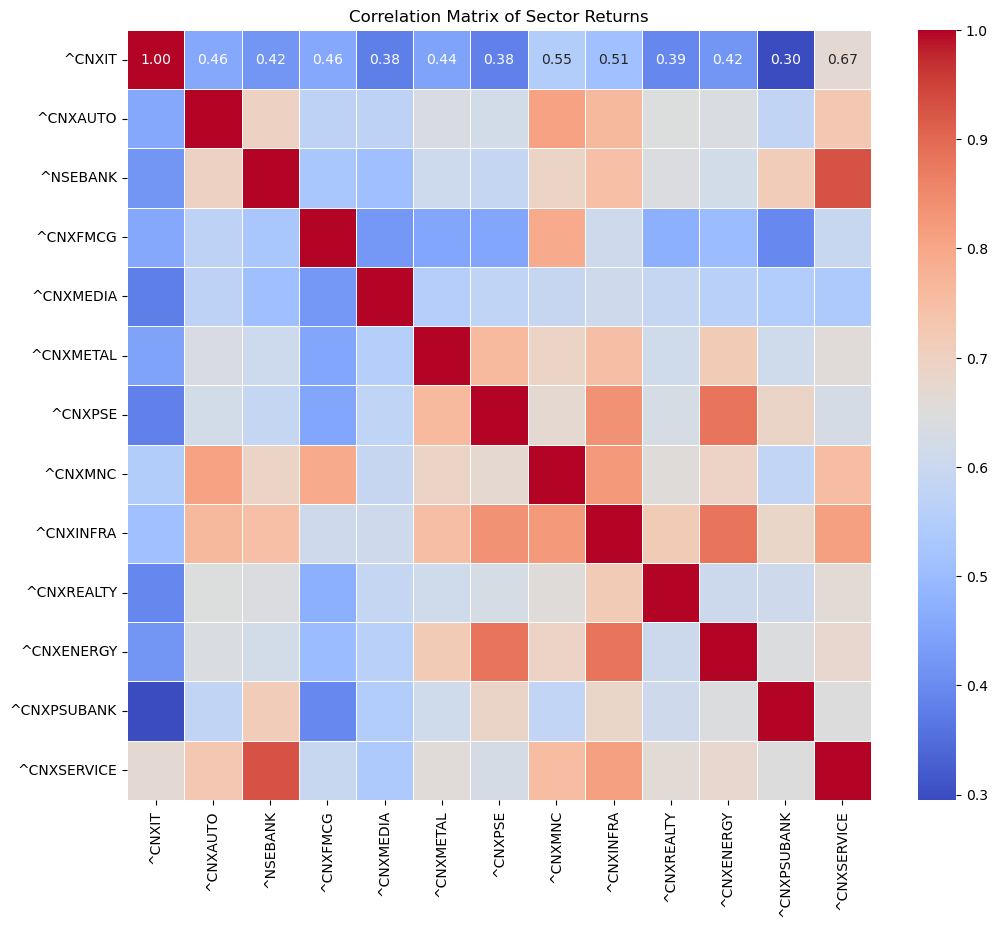

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector Cluster Mapping (for Diversification):
  ^CNXIT: Cluster 2
  ^CNXAUTO: Cluster 1
  ^NSEBANK: Cluster 1
  ^CNXFMCG: Cluster 1
  ^CNXMEDIA: Cluster 0
  ^CNXMETAL: Cluster 1
  ^CNXPSE: Cluster 1
  ^CNXMNC: Cluster 1
  ^CNXINFRA: Cluster 1
  ^CNXREALTY: Cluster 0
  ^CNXENERGY: Cluster 1
  ^CNXPSUBANK: Cluster 0
  ^CNXSERVICE: Cluster 1
Valid symbols for NIFTY_MIDCAP_100.NS: ['ACC.NS', 'APLAPOLLO.NS', 'ABFRL.NS', 'APOLLOTYRE.NS', 'ASHOKLEY.NS', 'ASTRAL.NS', 'AUROPHARMA.NS', 'BANKINDIA.NS', 'MAHABANK.NS', 'BHARATFORG.NS', 'BHEL.NS', 'BIOCON.NS', 'COFORGE.NS', 'COLPAL.NS', 'CONCOR.NS', 'CUMMINSIND.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'FEDERALBNK.NS', 'GMRAIRPORT.NS', 'GLENMARK.NS', 'GODREJPROP.NS', 'HINDPETRO.NS', 'HINDZINC.NS', 'IRB.NS', 'INDIANB.NS', 'IGL.NS', 'INDUSTOWER.NS', 'JUBLFOOD.NS', 'LTF.NS', 'LICHSGFIN.NS', 'LUPIN.NS', 'MRF.NS', 'M&MFIN.NS', 'MARICO.NS', 'MFSL.NS', 'MOTILALOFS.NS', 'MPHASIS.NS', 'MUTHOOTFIN.NS', 'NHPC.NS', 'NMDC.NS', 'NATIONALUM.NS', 'OBEROIRLTY.NS', 'OIL.NS'

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        SHREECEM.NS: 8.41%
        LT.NS: 28.04%
        ULTRACEMCO.NS: 44.86%
        SIEMENS.NS: 9.35%
        HINDPETRO.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        OBEROIRLTY.NS: 28.04%
        GODREJPROP.NS: 8.41%
        SOBHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        WIPRO.NS: 28.04%
        TCS.NS: 9.35%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
  Raw Portfolio Return: -5.86%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹94,857.55
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        TATACONSUM.NS: 8.41%
        COLPAL.NS: 28.04%
        HINDUNILVR.NS: 9.35%
        DABUR.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        PRESTIGE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        ANANTRAJ.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        INFY.NS: 8.41%
        COFORGE.NS: 28.04%
        TCS.NS: 44.86%
        MPHASIS.NS: 9.35%
        PERSISTENT.NS: 9.35%
  Raw Portfolio Return: 9.76%
  Risk Factor: 0.97
  Effective Portfolio Return: 9.44%
  Cumulative Value after Transaction Costs: ₹103,658.65
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXSERVICE: 12.50%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
        BAJFINANCE.NS: 9.35%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 28.04%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 9.35%
        PRESTIGE.NS: 44.86%
        DLF.NS: 28.04%
        GODREJPROP.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
        TCS.NS: 9.35%
        TECHM.NS: 28.04%
        HCLTECH.NS: 9.35%
  Raw Portfolio Return: -34.30%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹98,328.06
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        DABUR.NS: 44.86%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 28.04%
        INFY.NS: 44.86%
        TCS.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 37.50%
      Top Stocks & Weights:
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
  Raw Portfolio Return: 41.15%
  Risk Factor: 0.71
  Effective Portfolio Return: 29.04%
  Cumulative Value after Transaction Costs: ₹126,693.12
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        PATANJALI.NS: 28.04%
        TATACONSUM.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        PERSISTENT.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 37.50%
      Top Stocks & Weights:
        GODREJPROP.NS: 8.41%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
  Raw Portfolio Return: 35.70%
  Risk Factor: 1.00
  Effective Portfolio Return: 35.70%
  Cumulative Value after Transaction Costs: ₹171,668.57
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 44.86%
        NESTLEIND.NS: 9.35%
        ESCORTS.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
  Raw Portfolio Return: 40.34%
  Risk Factor: 1.00
  Effective Portfolio Return: 40.34%
  Cumulative Value after Transaction Costs: ₹240,563.01
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
        LINDEINDIA.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
  Raw Portfolio Return: 18.67%
  Risk Factor: 1.00
  Effective Portfolio Return: 18.67%
  Cumulative Value after Transaction Costs: ₹285,051.59
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 28.04%
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        ADANIPORTS.NS: 9.35%
        ULTRACEMCO.NS: 8.41%
        GRASIM.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 8.41%
        BRIGADE.NS: 44.86%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 28.04%
  Raw Portfolio Return: 10.50%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹270,392.97
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 12.50%
      Top Stocks & Weights:
        ADANIENT.NS: 28.04%
        APLAPOLLO.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDCOPPER.NS: 9.35%
        TATASTEEL.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
  Raw Portfolio Return: 31.43%
  Risk Factor: 1.00
  Effective Portfolio Return: 31.43%
  Cumulative Value after Transaction Costs: ₹354,832.05
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXREALTY: 12.50%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 50.00%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        BHARTIARTL.NS: 9.35%
        GODREJPROP.NS: 8.41%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 44.86%
  Raw Portfolio Return: 19.58%
  Risk Factor: 1.00
  Effective Portfolio Return: 19.58%
  Cumulative Value after Transaction Costs: ₹423,676.07
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        SOBHA.NS: 44.86%
  Raw Portfolio Return: -10.22%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹402,103.51
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 12.50%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
        JSL.NS: 44.86%
        NMDC.NS: 9.35%
        HINDALCO.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PRESTIGE.NS: 9.35%
        GODREJPROP.NS: 44.86%
  Raw Portfolio Return: -24.80%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹381,608.86
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        ADANIPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        JSWENERGY.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
  Raw Portfolio Return: 10.03%
  Risk Factor: 0.89
  Effective Portfolio Return: 8.95%
  Cumulative Value after Transaction Costs: ₹415,157.22
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 12.50%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        TATASTEEL.NS: 28.04%
        JSL.NS: 8.41%
        NMDC.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
  Raw Portfolio Return: 9.72%
  Risk Factor: 1.00
  Effective Portfolio Return: 9.72%
  Cumulative Value after Transaction Costs: ₹454,812.51
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMETAL: 12.50%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        JSL.NS: 8.41%
        TATASTEEL.NS: 28.04%
        NMDC.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
  Raw Portfolio Return: -7.86%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹431,424.02
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXIT', '^CNXFMCG', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        RADICO.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
  Raw Portfolio Return: 19.26%
  Risk Factor: 0.95
  Effective Portfolio Return: 18.37%
  Cumulative Value after Transaction Costs: ₹509,913.05
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        BRITANNIA.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
  Raw Portfolio Return: 10.59%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.59%
  Cumulative Value after Transaction Costs: ₹563,080.66
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
  Raw Portfolio Return: 37.77%
  Risk Factor: 1.00
  Effective Portfolio Return: 37.77%
  Cumulative Value after Transaction Costs: ₹774,587.20
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
  Raw Portfolio Return: 10.43%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.43%
  Cumulative Value after Transaction Costs: ₹854,131.92
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
  Raw Portfolio Return: 21.58%
  Risk Factor: 1.00
  Effective Portfolio Return: 21.58%
  Cumulative Value after Transaction Costs: ₹1,036,905.87
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        SIEMENS.NS: 8.41%
        CGPOWER.NS: 28.04%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
  Raw Portfolio Return: 14.82%
  Risk Factor: 1.00
  Effective Portfolio Return: 14.82%
  Cumulative Value after Transaction Costs: ₹1,188,754.22
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
  Raw Portfolio Return: -1.50%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹1,127,623.17
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT']
  Sector HRP Weights:
    ^CNXINFRA: 12.50%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 9.35%
        BHARTIARTL.NS: 8.41%
        APOLLOHOSP.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        OBEROIRLTY.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        INFY.NS: 9.35%
  Raw Portfolio Return: -19.41%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.92
  Effective Portfolio Return: -4.58%
  Cumulative Value after Transaction Costs: ₹1,074,332.28
--------------------------------------------------------------------------------

===== Simulating for Top 4 Sectors =====



C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        SHREECEM.NS: 8.41%
        LT.NS: 28.04%
        ULTRACEMCO.NS: 44.86%
        SIEMENS.NS: 9.35%
        HINDPETRO.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        OBEROIRLTY.NS: 28.04%
        GODREJPROP.NS: 8.41%
        SOBHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        WIPRO.NS: 28.04%
        TCS.NS: 9.35%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
    ^CNXSERVICE: 47.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        SBIN.NS: 9.35%
        HDFCBANK.NS: 44.86%
  Raw Portfolio Return: -2.41%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXREALTY', '^CNXIT', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        TATACONSUM.NS: 8.41%
        COLPAL.NS: 28.04%
        HINDUNILVR.NS: 9.35%
        DABUR.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        PRESTIGE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        ANANTRAJ.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        INFY.NS: 8.41%
        COFORGE.NS: 28.04%
        TCS.NS: 44.86%
        MPHASIS.NS: 9.35%
        PERSISTENT.NS: 9.35%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        COLPAL.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        SIEMENS.NS: 44.86%
  Raw Portfolio Return: 7.30%
  Risk Factor: 0.97
  Effective Portfolio Return: 7.06%
  Cumulative Value after Transaction Costs: ₹101,40

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXREALTY', '^CNXIT', '^NSEBANK']
  Sector HRP Weights:
    ^CNXSERVICE: 10.53%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
        BAJFINANCE.NS: 9.35%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 28.04%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 9.35%
        PRESTIGE.NS: 44.86%
        DLF.NS: 28.04%
        GODREJPROP.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
        TCS.NS: 9.35%
        TECHM.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^NSEBANK: 47.37%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        SBIN.NS: 9.35%
        AXISBANK.NS: 44.86%
  Raw Portfolio Return: -34.11%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        DABUR.NS: 44.86%
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 28.04%
        INFY.NS: 44.86%
        TCS.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 31.58%
      Top Stocks & Weights:
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        JBCHEPHARM.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        TIMKEN.NS: 44.86%
  Raw Portfolio Return: 33.82%
  Risk Factor: 0.71
  Effective Portfolio Return: 23.87%
  Cumulative Value after Transaction Costs: ₹118

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        PATANJALI.NS: 28.04%
        TATACONSUM.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        PERSISTENT.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        GODREJPROP.NS: 8.41%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        TIMKEN.NS: 9.35%
        HINDUNILVR.NS: 9.35%
  Raw Portfolio Return: 29.87%
  Risk Factor: 1.00
  Effective Portfolio Return: 29.87%
  Cumulative Value after Transaction Costs: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 44.86%
        NESTLEIND.NS: 9.35%
        ESCORTS.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXFMCG: 47.37%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        BRITANNIA.NS: 44.86%
        DABUR.NS: 9.35%
  Raw Portfolio Return: 16.93%
  Risk Factor: 1.00
  Effective Portfolio Return: 16.93%
  Cumulative Value after Transaction Costs:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
        LINDEINDIA.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXSERVICE: 47.37%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        BAJFINANCE.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        CHOLAFIN.NS: 9.35%
  Raw Portfolio Return: 13.41%
  Risk Factor: 1.00
  Effective Portfolio Return: 13.41%
  Cumulative Value after Transactio

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 28.04%
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        ADANIPORTS.NS: 9.35%
        ULTRACEMCO.NS: 8.41%
        GRASIM.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 8.41%
        BRIGADE.NS: 44.86%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 28.04%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        TIMKEN.NS: 28.04%
        HONAUT.NS: 9.35%
  Raw Portfolio Return: 12.89%
  Risk Factor: 1.00
  Effective Portfolio Return: 12.89%
  Cumulative Value after Transaction Costs: ₹22

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        ADANIENT.NS: 28.04%
        APLAPOLLO.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDCOPPER.NS: 9.35%
        TATASTEEL.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        CRISIL.NS: 9.35%
  Raw Portfolio Return: 30.14%
  Risk Factor: 1.00
  Effective Portfolio Return: 30.14%
  Cumulative Value after Transaction Costs: ₹2

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        BHARTIARTL.NS: 9.35%
        GODREJPROP.NS: 8.41%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 47.37%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 44.86%
        JSL.NS: 28.04%
        TATASTEEL.NS: 9.35%
        JSWSTEEL.NS: 9.35%
  Raw Portfolio Return: 12.59%
  Risk Factor: 1.00
  Effective Portfolio Return: 12.59%
  Cumulative Value after Transaction Costs: ₹33

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        SOBHA.NS: 44.86%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
  Raw Portfolio Return: 3.82%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cum

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
        JSL.NS: 44.86%
        NMDC.NS: 9.35%
        HINDALCO.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PRESTIGE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CGPOWER.NS: 28.04%
        BHARTIARTL.NS: 9.35%
        SIEMENS.NS: 44.86%
  Raw Portfolio Return: -14.88%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulat

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        ADANIPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        JSWENERGY.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
  Raw Portfolio Return: 10.43%
  Risk Factor: 0.89
  Effective Portfolio Return: 9.31%
  Cumulative Value after Transaction Costs

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 31.58%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        TATASTEEL.NS: 28.04%
        JSL.NS: 8.41%
        NMDC.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 47.37%
      Top Stocks & Weights:
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        RADICO.NS: 44.86%
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
  Raw Portfolio Return: 7.35%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.35%
  Cumulative Value after Transaction Costs: ₹353,938.27

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        JSL.NS: 8.41%
        TATASTEEL.NS: 28.04%
        NMDC.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
  Raw Portfolio Return: -4.66%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumul

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXIT', '^CNXFMCG', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        RADICO.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        TATAPOWER.NS: 44.86%
  Raw Portfolio Return: 14.91%
  Risk Factor: 0.95
  Effective Portfolio Return: 14.23%
  Cumulative Value after Transaction Costs:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        BRITANNIA.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 47.37%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
  Raw Portfolio Return: 6.56%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.56%
  Cumulative Value after Transaction Costs: ₹

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXREALTY: 47.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
  Raw Portfolio Return: 37.86%
  Risk Factor: 1.00
  Effective Portfolio Return: 37.86%
  Cumulative Value after Transaction Costs: ₹56

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 47.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
  Raw Portfolio Return: 9.75%
  Risk Factor: 1.00
  Effective Portfolio Return: 9.75%
  Cumulative Value after Transaction Costs: ₹614,

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXPSE: 47.37%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
        PFC.NS: 9.35%
        NHPC.NS: 9.35%
        NMDC.NS: 44.86%
  Raw Portfolio Return: 15.62%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.62%
  Cumulative Value after Transaction Costs: ₹709,497.44
-------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        SIEMENS.NS: 8.41%
        CGPOWER.NS: 28.04%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
  Raw Portfolio Return: 8.16%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.16%
  Cumulative Value after Transaction Costs: ₹766,21

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
  Raw Portfolio Return: -3.93%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cu

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 10.53%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 9.35%
        BHARTIARTL.NS: 8.41%
        APOLLOHOSP.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        OBEROIRLTY.NS: 44.86%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        SIEMENS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        ABB.NS: 9.35%
  Raw Portfolio Return: -13.53%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.92
  Effective Portfolio Return: -4.58

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXSERVICE', '^CNXPSE']
  Sector HRP Weights:
    ^CNXINFRA: 9.35%
      Top Stocks & Weights:
        SHREECEM.NS: 8.41%
        LT.NS: 28.04%
        ULTRACEMCO.NS: 44.86%
        SIEMENS.NS: 9.35%
        HINDPETRO.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        OBEROIRLTY.NS: 28.04%
        GODREJPROP.NS: 8.41%
        SOBHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        WIPRO.NS: 28.04%
        TCS.NS: 9.35%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
    ^CNXSERVICE: 8.41%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        SBIN.NS: 9.35%
        HDFCBANK.NS: 44.86%
    ^CNXPSE: 44.86%
      Top Stocks & Weights:
        BEL.NS: 9.35%
        COALINDIA.NS: 28.04%
        PFC.NS: 8.41%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        TATACONSUM.NS: 8.41%
        COLPAL.NS: 28.04%
        HINDUNILVR.NS: 9.35%
        DABUR.NS: 44.86%
    ^CNXREALTY: 8.41%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        PRESTIGE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        ANANTRAJ.NS: 44.86%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        INFY.NS: 8.41%
        COFORGE.NS: 28.04%
        TCS.NS: 44.86%
        MPHASIS.NS: 9.35%
        PERSISTENT.NS: 9.35%
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        COLPAL.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXINFRA: 44.86%
      Top Stocks & Weights:
        BPCL.NS: 9.35%
        SIEMENS.NS: 28.04%
        HINDPETRO.NS: 9.35%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXREALTY', '^CNXIT', '^NSEBANK', '^CNXMNC']
  Sector HRP Weights:
    ^CNXSERVICE: 8.41%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
        BAJFINANCE.NS: 9.35%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 28.04%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 9.35%
        PRESTIGE.NS: 44.86%
        DLF.NS: 28.04%
        GODREJPROP.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
        TCS.NS: 9.35%
        TECHM.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^NSEBANK: 44.86%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        SBIN.NS: 9.35%
        AXISBANK.NS: 44.86%
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        NESTLEIND.NS: 28.04%
        TIMKEN.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        DABUR.NS: 44.86%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 28.04%
        INFY.NS: 44.86%
        TCS.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        JBCHEPHARM.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        TIMKEN.NS: 44.86%
    ^CNXINFRA: 9.35%
      Top Stocks & Weights:
        BHARTIARTL.NS: 28.04%
        SIEMENS.NS: 8.41%
        BPCL.NS: 9.3

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        PATANJALI.NS: 28.04%
        TATACONSUM.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        PERSISTENT.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        GODREJPROP.NS: 8.41%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        TIMKEN.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXINFRA: 9.35%
      Top Stocks & Weights:
        BHARTIARTL.NS: 28.04%
        RELIANCE.NS: 8.41%
        SHREECE

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXFMCG', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 44.86%
        NESTLEIND.NS: 9.35%
        ESCORTS.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXFMCG: 44.86%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        BRITANNIA.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXINFRA: 9.35%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        RELIANCE.NS: 9.35%
        BHARTIA

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXSERVICE', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
        LINDEINDIA.NS: 44.86%
    ^CNXREALTY: 8.41%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXSERVICE: 44.86%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        BAJFINANCE.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 28.04%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        ADANIPORTS.NS: 9.35%
        ULTRACEMCO.NS: 8.41%
        GRASIM.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 8.41%
        BRIGADE.NS: 44.86%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 28.04%
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        TIMKEN.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXSERVICE: 44.86%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN.NS: 8.41%
        BAJFIN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXMNC', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        ADANIENT.NS: 28.04%
        APLAPOLLO.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDCOPPER.NS: 9.35%
        TATASTEEL.NS: 44.86%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        CRISIL.NS: 9.35%
    ^CNXINFRA: 44.86%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        SIEMENS.NS: 9.35%
        ADANIPORTS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        BHARTIARTL.NS: 9.35%
        GODREJPROP.NS: 8.41%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 44.86%
        JSL.NS: 28.04%
        TATASTEEL.NS: 9.35%
        JSWSTEEL.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        SOBHA.NS: 44.86%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
        JSL.NS: 44.86

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
        JSL.NS: 44.86%
        NMDC.NS: 9.35%
        HINDALCO.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PRESTIGE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CGPOWER.NS: 28.04%
        BHARTIARTL.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXENERGY: 44.86%
      Top Stocks & Weights:
        JSWENERGY.NS: 28.04%
        TATAPOWER.NS: 9.35%
        CGPOWER.NS: 8.41

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXREALTY', '^CNXINFRA', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 8.41%
      Top Stocks & Weights:
        ADANIPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        JSWENERGY.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 44.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        TIMKEN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 28.04%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        TATASTEEL.NS: 28.04%
        JSL.NS: 8.41%
        NMDC.NS: 44.86%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        RADICO.NS: 44.86%
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        TIMKEN.NS: 28.04%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC']
  Sector HRP Weights:
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        JSL.NS: 8.41%
        TATASTEEL.NS: 28.04%
        NMDC.NS: 44.86%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        TIMKEN.NS: 28.04%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXIT', '^CNXFMCG', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 8.41%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXFMCG: 44.86%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        RADICO.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXREALTY: 28.04%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 9.35%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 9.35%
        JSL.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        BRITANNIA.NS: 44.86%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        TIMKEN.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 28.04%
        TIMKEN.NS: 9

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXFMCG', '^CNXPSE']
  Sector HRP Weights:
    ^CNXINFRA: 9.35%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 28.04%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXIT: 8.41%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 44.86%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXPSE: 9.35%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        PFC.NS: 28.04%
        RECLTD.NS: 9.35%
        N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXPSE: 9.35%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
        PFC.NS: 9.35%
        NHPC.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 44.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        SIEMENS.NS: 9.35%
        ABB.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        SIEMENS.NS: 8.41%
        CGPOWER.NS: 28.04%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 44.86%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        PFC.NS: 28.04%
        RECLTD.NS: 9.35%
        NMD

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 44.86%
      Top Stocks & Weights:
        BEL.NS: 9.35%
        PFC.NS: 8.41%
        RECLTD.NS: 44.86%
        POW

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE']
  Sector HRP Weights:
    ^CNXINFRA: 8.41%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 9.35%
        BHARTIARTL.NS: 8.41%
        APOLLOHOSP.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        OBEROIRLTY.NS: 44.86%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        SIEMENS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        ABB.NS: 9.35%
    ^CNXPSE: 44.86%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
        PFC.NS: 9.35%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXSERVICE', '^CNXPSE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        SHREECEM.NS: 8.41%
        LT.NS: 28.04%
        ULTRACEMCO.NS: 44.86%
        SIEMENS.NS: 9.35%
        HINDPETRO.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        OBEROIRLTY.NS: 28.04%
        GODREJPROP.NS: 8.41%
        SOBHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        WIPRO.NS: 28.04%
        TCS.NS: 9.35%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
    ^CNXSERVICE: 8.55%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        SBIN.NS: 9.35%
        HDFCBANK.NS: 44.86%
    ^CNXPSE: 42.74%
      Top Stocks & Weights:
        BEL.NS: 9.35%
        COALINDIA.NS: 28.04%
        PFC.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        TATACONSUM.NS: 8.41%
        COLPAL.NS: 28.04%
        HINDUNILVR.NS: 9.35%
        DABUR.NS: 44.86%
    ^CNXREALTY: 6.84%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        PRESTIGE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        ANANTRAJ.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        INFY.NS: 8.41%
        COFORGE.NS: 28.04%
        TCS.NS: 44.86%
        MPHASIS.NS: 9.35%
        PERSISTENT.NS: 9.35%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        COLPAL.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXINFRA: 42.74%
      Top Stocks & Weights:
        BPCL.NS: 9.35%
        SIEMENS.NS: 28.04%
        HIND

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXREALTY', '^CNXIT', '^NSEBANK', '^CNXMNC', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXSERVICE: 6.84%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
        BAJFINANCE.NS: 9.35%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 28.04%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 9.35%
        PRESTIGE.NS: 44.86%
        DLF.NS: 28.04%
        GODREJPROP.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
        TCS.NS: 9.35%
        TECHM.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^NSEBANK: 42.74%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        SBIN.NS: 9.35%
        AXISBANK.NS: 44.86%
    ^CNXMNC: 7.69%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        NESTLEIND.NS: 28.04%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        DABUR.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 28.04%
        INFY.NS: 44.86%
        TCS.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        JBCHEPHARM.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        TIMKEN.NS: 44.86%
    ^CNXINFRA: 8.55%
      Top Stocks & Weights:
        BHARTIARTL.NS: 28.04%
        SIEMENS.NS: 8.41%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        PATANJALI.NS: 28.04%
        TATACONSUM.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        PERSISTENT.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        GODREJPROP.NS: 8.41%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        TIMKEN.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        BHARTIARTL.NS: 28.04%
        RELIANCE.NS: 8.41%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXFMCG', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 44.86%
        NESTLEIND.NS: 9.35%
        ESCORTS.NS: 9.35%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        BRITANNIA.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        RELIANCE.NS: 9.35%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXSERVICE', '^CNXFMCG', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
        LINDEINDIA.NS: 44.86%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXSERVICE: 6.84%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        BAJFINANCE.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXSERVICE', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 28.04%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        ADANIPORTS.NS: 9.35%
        ULTRACEMCO.NS: 8.41%
        GRASIM.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        ANANTRAJ.NS: 8.41%
        BRIGADE.NS: 44.86%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 28.04%
    ^CNXMNC: 7.69%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        TIMKEN.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXSERVICE: 42.74%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN.NS: 8.41%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        ADANIENT.NS: 28.04%
        APLAPOLLO.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDCOPPER.NS: 9.35%
        TATASTEEL.NS: 44.86%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        CRISIL.NS: 9.35%
    ^CNXINFRA: 42.74%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        SIEMENS.NS: 9.35%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        BHARTIARTL.NS: 9.35%
        GODREJPROP.NS: 8.41%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 44.86%
        JSL.NS: 28.04%
        TATASTEEL.NS: 9.35%
        JSWSTEEL.NS: 9.35%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        SOBHA.NS: 44.86%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
        JSL.NS: 44.86%
        NMDC.NS: 9.35%
        HINDALCO.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PRESTIGE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CGPOWER.NS: 28.04%
        BHARTIARTL.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXENERGY: 42.74%
      Top Stocks & Weights:
        JSWENERGY.NS: 28.04%
        TATAPOWER.NS: 9.35%
        C

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 6.84%
      Top Stocks & Weights:
        ADANIPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        JSWENERGY.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 42.74%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 7.69%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 6.84%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        TATASTEEL.NS: 28.04%
        JSL.NS: 8.41%
        NMDC.NS: 44.86%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        RADICO.NS: 44.86%
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        TIMKEN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMETAL: 6.84%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        JSL.NS: 8.41%
        TATASTEEL.NS: 28.04%
        NMDC.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 42.74%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        TIMKEN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXIT', '^CNXFMCG', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        RADICO.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXREALTY: 6.84%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 8.55%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 42.74%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 9.35%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        BRITANNIA.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 6.84%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 8.55%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
    ^CNXMNC: 7.69%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 8.55%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXREALTY: 6.84%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXMNC: 7.69%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 28.04%
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXFMCG', '^CNXPSE', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXPSE: 7.69%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        PFC.NS: 28.04%
        RECLTD.NS: 9.35%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE', '^CNXENERGY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXPSE: 7.69%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
        PFC.NS: 9.35%
        NHPC.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 42.74%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        SIEMENS.NS: 9.35%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        SIEMENS.NS: 8.41%
        CGPOWER.NS: 28.04%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 42.74%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        PFC.NS: 28.04%
        RECLTD.NS: 9.35%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 42.74%
      Top Stocks & Weights:
        BEL.NS: 9.35%
        PFC.NS: 8.41%
        RECLTD.NS: 44.86%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 6.84%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 9.35%
        BHARTIARTL.NS: 8.41%
        APOLLOHOSP.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 7.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        OBEROIRLTY.NS: 44.86%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        SIEMENS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        ABB.NS: 9.35%
    ^CNXPSE: 42.74%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
        PFC.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXSERVICE', '^CNXPSE', '^NSEBANK', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXINFRA: 6.37%
      Top Stocks & Weights:
        SHREECEM.NS: 8.41%
        LT.NS: 28.04%
        ULTRACEMCO.NS: 44.86%
        SIEMENS.NS: 9.35%
        HINDPETRO.NS: 9.35%
    ^CNXREALTY: 7.17%
      Top Stocks & Weights:
        OBEROIRLTY.NS: 28.04%
        GODREJPROP.NS: 8.41%
        SOBHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        WIPRO.NS: 28.04%
        TCS.NS: 9.35%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
    ^CNXSERVICE: 5.69%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        SBIN.NS: 9.35%
        HDFCBANK.NS: 44.86%
    ^CNXPSE: 7.96%
      Top Stocks & Weights:
        BEL.NS: 9.35%
        COALINDIA.NS: 28.04%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        TATACONSUM.NS: 8.41%
        COLPAL.NS: 28.04%
        HINDUNILVR.NS: 9.35%
        DABUR.NS: 44.86%
    ^CNXREALTY: 7.17%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        PRESTIGE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        ANANTRAJ.NS: 44.86%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        INFY.NS: 8.41%
        COFORGE.NS: 28.04%
        TCS.NS: 44.86%
        MPHASIS.NS: 9.35%
        PERSISTENT.NS: 9.35%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        COLPAL.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXINFRA: 6.37%
      Top Stocks & Weights:
        BPCL.NS: 9.35%
        SIEMENS.NS: 28.04%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXREALTY', '^CNXIT', '^NSEBANK', '^CNXMNC', '^CNXINFRA', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXSERVICE: 5.69%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
        BAJFINANCE.NS: 9.35%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 28.04%
    ^CNXREALTY: 7.96%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 9.35%
        PRESTIGE.NS: 44.86%
        DLF.NS: 28.04%
        GODREJPROP.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
        TCS.NS: 9.35%
        TECHM.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^NSEBANK: 40.96%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        SBIN.NS: 9.35%
        AXISBANK.NS: 44.86%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        NESTLEIND.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        DABUR.NS: 44.86%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 28.04%
        INFY.NS: 44.86%
        TCS.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 7.17%
      Top Stocks & Weights:
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        JBCHEPHARM.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        TIMKEN.NS: 44.86%
    ^CNXINFRA: 6.37%
      Top Stocks & Weights:
        BHARTIARTL.NS: 28.04%
        SIEMENS.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        PATANJALI.NS: 28.04%
        TATACONSUM.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        PERSISTENT.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 5.69%
      Top Stocks & Weights:
        GODREJPROP.NS: 8.41%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        TIMKEN.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXINFRA: 7.17%
      Top Stocks & Weights:
        BHARTIARTL.NS: 28.04%
        RELIAN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXFMCG', '^CNXINFRA', '^CNXAUTO', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 44.86%
        NESTLEIND.NS: 9.35%
        ESCORTS.NS: 9.35%
    ^CNXREALTY: 7.17%
      Top Stocks & Weights:
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        BRITANNIA.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXINFRA: 5.69%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        RELIANCE.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXSERVICE', '^CNXFMCG', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
        LINDEINDIA.NS: 44.86%
    ^CNXREALTY: 7.17%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXSERVICE: 5.69%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        BAJFINANCE.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATA

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXSERVICE', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 28.04%
    ^CNXINFRA: 5.69%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        ADANIPORTS.NS: 9.35%
        ULTRACEMCO.NS: 8.41%
        GRASIM.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXREALTY: 7.17%
      Top Stocks & Weights:
        ANANTRAJ.NS: 8.41%
        BRIGADE.NS: 44.86%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 28.04%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        TIMKEN.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXSERVICE: 40.96%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 6.37%
      Top Stocks & Weights:
        ADANIENT.NS: 28.04%
        APLAPOLLO.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDCOPPER.NS: 9.35%
        TATASTEEL.NS: 44.86%
    ^CNXREALTY: 7.17%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        CRISIL.NS: 9.35%
    ^CNXINFRA: 5.69%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        SIEMENS.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXREALTY: 5.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 7.17%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        BHARTIARTL.NS: 9.35%
        GODREJPROP.NS: 8.41%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 40.96%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 44.86%
        JSL.NS: 28.04%
        TATASTEEL.NS: 9.35%
        JSWSTEEL.NS: 9.35%
    ^CNXMNC: 6.37%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXMETAL', '^CNXSERVICE', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXINFRA: 7.17%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 7.96%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        SOBHA.NS: 44.86%
    ^CNXMNC: 5.69%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
        JSL.NS: 44.86%
        NMDC.NS: 9.35%
        HINDALCO.NS: 9.35%
    ^CNXREALTY: 7.96%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PRESTIGE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXINFRA: 7.17%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CGPOWER.NS: 28.04%
        BHARTIARTL.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXENERGY: 6.37%
      Top Stocks & Weights:
        JSWENERGY.NS: 28.04%
        TATAPOWER.NS: 9.35%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 5.69%
      Top Stocks & Weights:
        ADANIPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        JSWENERGY.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXREALTY: 7.96%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 40.96%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXINFRA', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 6.37%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        TATASTEEL.NS: 28.04%
        JSL.NS: 8.41%
        NMDC.NS: 44.86%
    ^CNXREALTY: 23.89%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        RADICO.NS: 44.86%
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 40.96%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXFMCG', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        JSL.NS: 8.41%
        TATASTEEL.NS: 28.04%
        NMDC.NS: 44.86%
    ^CNXIT: 6.37%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 23.89%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 7.96%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 5.69%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXIT', '^CNXFMCG', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        RADICO.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXREALTY: 5.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 7.17%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 40.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        BRITANNIA.NS: 44.86%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 5.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 7.17%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
    ^CNXMNC: 6.37%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXMETAL', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 7.17%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXREALTY: 5.69%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXMNC: 6.37%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 28.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXFMCG', '^CNXPSE', '^CNXMNC', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 7.96%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 6.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXPSE: 5.69%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        PFC.NS: 28.04%
        REC

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE', '^CNXENERGY', '^CNXMNC', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 7.96%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 6.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXPSE: 7.96%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
        PFC.NS: 9.35%
        NHPC.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.17%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        SIEMENS.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXINFRA: 7.96%
      Top Stocks & Weights:
        SIEMENS.NS: 8.41%
        CGPOWER.NS: 28.04%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 6.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 5.69%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 7.96%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        PFC.NS: 28.04%
        REC

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXINFRA: 5.69%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
    ^CNXREALTY: 6.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 40.96%
      Top Stocks & Weights:
        BEL.NS: 9.35%
        PFC.NS: 8.41%
        RECLT

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXINFRA: 5.69%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 9.35%
        BHARTIARTL.NS: 8.41%
        APOLLOHOSP.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 6.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        OBEROIRLTY.NS: 44.86%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        SIEMENS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        ABB.NS: 9.35%
    ^CNXPSE: 40.96%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXSERVICE', '^CNXPSE', '^NSEBANK', '^CNXENERGY', '^CNXPSUBANK']
  Sector HRP Weights:
    ^CNXINFRA: 4.83%
      Top Stocks & Weights:
        SHREECEM.NS: 8.41%
        LT.NS: 28.04%
        ULTRACEMCO.NS: 44.86%
        SIEMENS.NS: 9.35%
        HINDPETRO.NS: 9.35%
    ^CNXREALTY: 6.76%
      Top Stocks & Weights:
        OBEROIRLTY.NS: 28.04%
        GODREJPROP.NS: 8.41%
        SOBHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        WIPRO.NS: 28.04%
        TCS.NS: 9.35%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
    ^CNXSERVICE: 6.01%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        SBIN.NS: 9.35%
        HDFCBANK.NS: 44.86%
    ^CNXPSE: 7.51%
      Top Stocks & Weights:
        BEL.NS: 9.35%
        COALINDI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^NSEBANK', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        TATACONSUM.NS: 8.41%
        COLPAL.NS: 28.04%
        HINDUNILVR.NS: 9.35%
        DABUR.NS: 44.86%
    ^CNXREALTY: 6.01%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        PRESTIGE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        ANANTRAJ.NS: 44.86%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        INFY.NS: 8.41%
        COFORGE.NS: 28.04%
        TCS.NS: 44.86%
        MPHASIS.NS: 9.35%
        PERSISTENT.NS: 9.35%
    ^CNXMNC: 6.76%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        COLPAL.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXINFRA: 5.37%
      Top Stocks & Weights:
        BPCL.NS: 9.35%
        SIEMEN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXREALTY', '^CNXIT', '^NSEBANK', '^CNXMNC', '^CNXINFRA', '^CNXFMCG', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
        BAJFINANCE.NS: 9.35%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 28.04%
    ^CNXREALTY: 6.01%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 9.35%
        PRESTIGE.NS: 44.86%
        DLF.NS: 28.04%
        GODREJPROP.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
        TCS.NS: 9.35%
        TECHM.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^NSEBANK: 39.45%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        SBIN.NS: 9.35%
        AXISBANK.NS: 44.86%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^NSEBANK', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 4.83%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        DABUR.NS: 44.86%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 28.04%
        INFY.NS: 44.86%
        TCS.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 7.51%
      Top Stocks & Weights:
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
    ^CNXMNC: 39.45%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        JBCHEPHARM.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        TIMKEN.NS: 44.86%
    ^CNXINFRA: 6.01%
      Top Stocks & Weights:
        BHARTIARTL.NS: 28.04%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        PATANJALI.NS: 28.04%
        TATACONSUM.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        PERSISTENT.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 5.37%
      Top Stocks & Weights:
        GODREJPROP.NS: 8.41%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        TIMKEN.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXINFRA: 6.76%
      Top Stocks & Weights:
        BHARTIARTL.NS: 28.04%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXFMCG', '^CNXINFRA', '^CNXAUTO', '^CNXENERGY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 44.86%
        NESTLEIND.NS: 9.35%
        ESCORTS.NS: 9.35%
    ^CNXREALTY: 5.37%
      Top Stocks & Weights:
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        BRITANNIA.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXINFRA: 6.76%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXSERVICE', '^CNXFMCG', '^CNXINFRA', '^CNXAUTO', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
        LINDEINDIA.NS: 44.86%
    ^CNXREALTY: 6.76%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        BAJFINANCE.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXSERVICE', '^CNXMETAL', '^CNXFMCG', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 28.04%
    ^CNXINFRA: 4.83%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        ADANIPORTS.NS: 9.35%
        ULTRACEMCO.NS: 8.41%
        GRASIM.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXREALTY: 6.76%
      Top Stocks & Weights:
        ANANTRAJ.NS: 8.41%
        BRIGADE.NS: 44.86%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 28.04%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        TIMKEN.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXSERVICE: 39.45%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^CNXFMCG', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 6.01%
      Top Stocks & Weights:
        ADANIENT.NS: 28.04%
        APLAPOLLO.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDCOPPER.NS: 9.35%
        TATASTEEL.NS: 44.86%
    ^CNXREALTY: 6.76%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        CRISIL.NS: 9.35%
    ^CNXINFRA: 4.83%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE', '^CNXFMCG', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 5.37%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXREALTY: 22.54%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 6.76%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        BHARTIARTL.NS: 9.35%
        GODREJPROP.NS: 8.41%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 44.86%
        JSL.NS: 28.04%
        TATASTEEL.NS: 9.35%
        JSWSTEEL.NS: 9.35%
    ^CNXMNC: 4.83%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXMETAL', '^CNXSERVICE', '^CNXENERGY', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 5.37%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXINFRA: 6.76%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 22.54%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        SOBHA.NS: 44.86%
    ^CNXMNC: 4.83%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        AP

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 6.01%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
        JSL.NS: 44.86%
        NMDC.NS: 9.35%
        HINDALCO.NS: 9.35%
    ^CNXREALTY: 6.76%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PRESTIGE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXINFRA: 4.83%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CGPOWER.NS: 28.04%
        BHARTIARTL.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXENERGY: 39.45%
      Top Stocks & Weights:
        JSWENERGY.NS: 28.04%
        TATAPO

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 4.83%
      Top Stocks & Weights:
        ADANIPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        JSWENERGY.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXREALTY: 6.01%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 39.45%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 5.37%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        TATASTEEL.NS: 28.04%
        JSL.NS: 8.41%
        NMDC.NS: 44.86%
    ^CNXREALTY: 22.54%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 4.83%
      Top Stocks & Weights:
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        RADICO.NS: 44.86%
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 39.45%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXFMCG', '^CNXENERGY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMETAL: 6.01%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        JSL.NS: 8.41%
        TATASTEEL.NS: 28.04%
        NMDC.NS: 44.86%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 6.76%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 4.83%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEIN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXIT', '^CNXFMCG', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        RADICO.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXREALTY: 6.76%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 4.83%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        BRITANNIA.NS: 44.86%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 6.76%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 4.83%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
    ^CNXMNC: 39.45%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXPSE']
  Sector HRP Weights:
    ^CNXINFRA: 6.76%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXREALTY: 5.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPH

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXFMCG', '^CNXPSE', '^CNXMNC', '^CNXMETAL', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXINFRA: 6.76%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 22.54%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXIT: 5.37%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 4.83%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXPSE: 7.51%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        PFC.NS: 28.0

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE', '^CNXENERGY', '^CNXMNC', '^CNXAUTO', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 6.76%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 5.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXPSE: 7.51%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
        PFC.NS: 9.35%
        NHPC.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 6.01%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 8.41%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 6.76%
      Top Stocks & Weights:
        SIEMENS.NS: 8.41%
        CGPOWER.NS: 28.04%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 5.37%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 4.83%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 7.51%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        PFC.NS: 28.04

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXFMCG', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXINFRA: 7.51%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
    ^CNXREALTY: 22.54%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 6.01%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 4.83%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 7.51%
      Top Stocks & Weights:
        BEL.NS: 9.35%
        PFC.NS: 8.41%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXFMCG', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 4.83%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 9.35%
        BHARTIARTL.NS: 8.41%
        APOLLOHOSP.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 6.01%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        OBEROIRLTY.NS: 44.86%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        SIEMENS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        ABB.NS: 9.35%
    ^CNXPSE: 39.45%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXSERVICE', '^CNXPSE', '^NSEBANK', '^CNXENERGY', '^CNXPSUBANK', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXINFRA: 5.11%
      Top Stocks & Weights:
        SHREECEM.NS: 8.41%
        LT.NS: 28.04%
        ULTRACEMCO.NS: 44.86%
        SIEMENS.NS: 9.35%
        HINDPETRO.NS: 9.35%
    ^CNXREALTY: 7.16%
      Top Stocks & Weights:
        OBEROIRLTY.NS: 28.04%
        GODREJPROP.NS: 8.41%
        SOBHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
    ^CNXIT: 4.17%
      Top Stocks & Weights:
        WIPRO.NS: 28.04%
        TCS.NS: 9.35%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
    ^CNXSERVICE: 6.44%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        SBIN.NS: 9.35%
        HDFCBANK.NS: 44.86%
    ^CNXPSE: 21.47%
      Top Stocks & Weights:
        BEL.NS: 9.35%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^NSEBANK', '^CNXENERGY', '^CNXPSE']
  Sector HRP Weights:
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        TATACONSUM.NS: 8.41%
        COLPAL.NS: 28.04%
        HINDUNILVR.NS: 9.35%
        DABUR.NS: 44.86%
    ^CNXREALTY: 5.11%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        PRESTIGE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        ANANTRAJ.NS: 44.86%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        INFY.NS: 8.41%
        COFORGE.NS: 28.04%
        TCS.NS: 44.86%
        MPHASIS.NS: 9.35%
        PERSISTENT.NS: 9.35%
    ^CNXMNC: 5.72%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        COLPAL.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXINFRA: 4.60%
      Top Stocks & Weights:
        BPCL.NS: 9.35%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXREALTY', '^CNXIT', '^NSEBANK', '^CNXMNC', '^CNXINFRA', '^CNXFMCG', '^CNXAUTO', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXSERVICE: 7.16%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
        BAJFINANCE.NS: 9.35%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 28.04%
    ^CNXREALTY: 4.60%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 9.35%
        PRESTIGE.NS: 44.86%
        DLF.NS: 28.04%
        GODREJPROP.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
        TCS.NS: 9.35%
        TECHM.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^NSEBANK: 7.16%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        SBIN.NS: 9.35%
        AXISBANK.NS: 44.86%
    ^CNXMNC: 5.72%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^NSEBANK', '^CNXENERGY', '^CNXPSE']
  Sector HRP Weights:
    ^CNXFMCG: 5.72%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        DABUR.NS: 44.86%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 28.04%
        INFY.NS: 44.86%
        TCS.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 7.16%
      Top Stocks & Weights:
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
    ^CNXMNC: 5.11%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        JBCHEPHARM.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        TIMKEN.NS: 44.86%
    ^CNXINFRA: 4.60%
      Top Stocks & Weights:
        BHARTIARTL.NS: 28

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE', '^CNXAUTO', '^NSEBANK']
  Sector HRP Weights:
    ^CNXFMCG: 4.17%
      Top Stocks & Weights:
        PATANJALI.NS: 28.04%
        TATACONSUM.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 5.72%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        PERSISTENT.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 21.47%
      Top Stocks & Weights:
        GODREJPROP.NS: 8.41%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
    ^CNXMNC: 38.17%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        TIMKEN.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXINFRA: 5.11%
      Top Stocks & Weights:
        BHARTIARTL.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXFMCG', '^CNXINFRA', '^CNXAUTO', '^CNXENERGY', '^CNXSERVICE', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMNC: 7.16%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 44.86%
        NESTLEIND.NS: 9.35%
        ESCORTS.NS: 9.35%
    ^CNXREALTY: 6.44%
      Top Stocks & Weights:
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXFMCG: 7.16%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        BRITANNIA.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXINFRA: 5.72%
      Top Stocks & Weights:
        APOLLOHOSP

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXSERVICE', '^CNXFMCG', '^CNXINFRA', '^CNXAUTO', '^CNXMETAL', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 7.16%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
        LINDEINDIA.NS: 44.86%
    ^CNXREALTY: 4.60%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        BAJFINANCE.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 7.16%
      Top Stocks & Weights:
        TATACONS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXSERVICE', '^CNXMETAL', '^CNXFMCG', '^CNXAUTO', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 4.60%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 28.04%
    ^CNXINFRA: 7.16%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        ADANIPORTS.NS: 9.35%
        ULTRACEMCO.NS: 8.41%
        GRASIM.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXREALTY: 6.44%
      Top Stocks & Weights:
        ANANTRAJ.NS: 8.41%
        BRIGADE.NS: 44.86%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 28.04%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        TIMKEN.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXSERVICE: 5.72%
      Top Stocks & Weights:
        MUTHOOTFIN.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^CNXFMCG', '^CNXAUTO', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 4.60%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        ADANIENT.NS: 28.04%
        APLAPOLLO.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDCOPPER.NS: 9.35%
        TATASTEEL.NS: 44.86%
    ^CNXREALTY: 6.44%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        CRISIL.NS: 9.35%
    ^CNXINFRA: 7.16%
      Top Stocks & Weights:
        APOLLOHOSP.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE', '^CNXFMCG', '^CNXENERGY', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 4.60%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXREALTY: 21.47%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 5.72%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        BHARTIARTL.NS: 9.35%
        GODREJPROP.NS: 8.41%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 6.44%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 44.86%
        JSL.NS: 28.04%
        TATASTEEL.NS: 9.35%
        JSWSTEEL.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXMETAL', '^CNXSERVICE', '^CNXENERGY', '^CNXFMCG', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXINFRA: 4.17%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 6.44%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        SOBHA.NS: 44.86%
    ^CNXMNC: 7.16%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
    ^CNXMETAL: 4.60%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 6.44%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
        JSL.NS: 44.86%
        NMDC.NS: 9.35%
        HINDALCO.NS: 9.35%
    ^CNXREALTY: 4.60%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PRESTIGE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXINFRA: 5.72%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CGPOWER.NS: 28.04%
        BHARTIARTL.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXENERGY: 5.11%
      Top Stocks & Weights:
        JSWENERGY.NS: 28.04%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 5.72%
      Top Stocks & Weights:
        ADANIPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        JSWENERGY.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXREALTY: 4.60%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 5.11%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 7.16%
      Top Stocks & Weights:
        LINDEINDIA.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 6.44%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        TATASTEEL.NS: 28.04%
        JSL.NS: 8.41%
        NMDC.NS: 44.86%
    ^CNXREALTY: 4.60%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 7.16%
      Top Stocks & Weights:
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        RADICO.NS: 44.86%
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 7.16%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXFMCG', '^CNXENERGY', '^CNXSERVICE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMETAL: 6.44%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        JSL.NS: 8.41%
        TATASTEEL.NS: 28.04%
        NMDC.NS: 44.86%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 4.60%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 5.72%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 7.16%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXIT', '^CNXFMCG', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE', '^CNXAUTO', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXFMCG: 7.16%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        RADICO.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXREALTY: 4.60%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 5.72%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 6.44%
      Top Stocks & Weights:
        APLAPOLLO.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXSERVICE', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 7.16%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        BRITANNIA.NS: 44.86%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 4.60%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 5.72%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
    ^CNXMNC: 7.16%
      Top Stocks & Weights:
        JBCHEPHARM.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXPSE', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXINFRA: 6.44%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXIT: 5.11%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXREALTY: 21.47%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 4.17%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXMNC: 38.17%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXFMCG', '^CNXPSE', '^CNXMNC', '^CNXMETAL', '^CNXENERGY', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXINFRA: 6.44%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 21.47%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXIT: 5.11%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 4.17%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXPSE: 7.16%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE', '^CNXENERGY', '^CNXMNC', '^CNXAUTO', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXINFRA: 6.44%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 21.47%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 5.11%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXPSE: 7.16%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
        PFC.NS: 9.35%
        NHPC.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 5.72%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXENERGY', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXINFRA: 6.44%
      Top Stocks & Weights:
        SIEMENS.NS: 8.41%
        CGPOWER.NS: 28.04%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 21.47%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 5.11%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 7.16%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        P

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXFMCG', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 6.44%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
    ^CNXREALTY: 21.47%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 5.11%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 7.16%
      Top Stocks & Weights:
        BEL.NS: 9.35%
        P

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXFMCG', '^CNXMETAL', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXINFRA: 6.44%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 9.35%
        BHARTIARTL.NS: 8.41%
        APOLLOHOSP.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 21.47%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        OBEROIRLTY.NS: 44.86%
    ^CNXIT: 5.11%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        SIEMENS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        ABB.NS: 9.35%
    ^CNXPSE: 7.16%
      Top Stocks & Weights:
        BEL.NS: 8.41%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXSERVICE', '^CNXPSE', '^NSEBANK', '^CNXENERGY', '^CNXPSUBANK', '^CNXFMCG', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXINFRA: 6.18%
      Top Stocks & Weights:
        SHREECEM.NS: 8.41%
        LT.NS: 28.04%
        ULTRACEMCO.NS: 44.86%
        SIEMENS.NS: 9.35%
        HINDPETRO.NS: 9.35%
    ^CNXREALTY: 20.58%
      Top Stocks & Weights:
        OBEROIRLTY.NS: 28.04%
        GODREJPROP.NS: 8.41%
        SOBHA.NS: 44.86%
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
    ^CNXIT: 3.66%
      Top Stocks & Weights:
        WIPRO.NS: 28.04%
        TCS.NS: 9.35%
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
    ^CNXSERVICE: 6.86%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        SBIN.NS: 9.35%
        HDFCBANK.NS: 44.86%
    ^CNXPSE: 4.41%
      Top Stocks & Weights:
        BEL.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^NSEBANK', '^CNXENERGY', '^CNXPSE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        TATACONSUM.NS: 8.41%
        COLPAL.NS: 28.04%
        HINDUNILVR.NS: 9.35%
        DABUR.NS: 44.86%
    ^CNXREALTY: 4.41%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        PRESTIGE.NS: 28.04%
        PHOENIXLTD.NS: 9.35%
        ANANTRAJ.NS: 44.86%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        INFY.NS: 8.41%
        COFORGE.NS: 28.04%
        TCS.NS: 44.86%
        MPHASIS.NS: 9.35%
        PERSISTENT.NS: 9.35%
    ^CNXMNC: 5.49%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        COLPAL.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXINFRA: 4.00%
      Top Stocks & Weights:
        BPCL.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXREALTY', '^CNXIT', '^NSEBANK', '^CNXMNC', '^CNXINFRA', '^CNXFMCG', '^CNXAUTO', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXSERVICE: 6.86%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
        BAJFINANCE.NS: 9.35%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 28.04%
    ^CNXREALTY: 4.41%
      Top Stocks & Weights:
        BRIGADE.NS: 8.41%
        PHOENIXLTD.NS: 9.35%
        PRESTIGE.NS: 44.86%
        DLF.NS: 28.04%
        GODREJPROP.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 44.86%
        TCS.NS: 9.35%
        TECHM.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^NSEBANK: 6.86%
      Top Stocks & Weights:
        ICICIBANK.NS: 8.41%
        KOTAKBANK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        SBIN.NS: 9.35%
        AXISBANK.NS: 44.86%
    ^CNXMNC: 5.49%
      Top Stocks & Weights:
        AB

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^NSEBANK', '^CNXENERGY', '^CNXPSE', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXFMCG: 4.90%
      Top Stocks & Weights:
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        DABUR.NS: 44.86%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 28.04%
        INFY.NS: 44.86%
        TCS.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 4.00%
      Top Stocks & Weights:
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 44.86%
        BRIGADE.NS: 28.04%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
    ^CNXMNC: 4.41%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        NESTLEIND.NS: 9.35%
        JBCHEPHARM.NS: 8.41%
        HINDUNILVR.NS: 9.35%
        TIMKEN.NS: 44.86%
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        BHAR

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE', '^CNXAUTO', '^NSEBANK', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXFMCG: 5.49%
      Top Stocks & Weights:
        PATANJALI.NS: 28.04%
        TATACONSUM.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        PERSISTENT.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXREALTY: 6.86%
      Top Stocks & Weights:
        GODREJPROP.NS: 8.41%
        PRESTIGE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
    ^CNXMNC: 4.90%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        TIMKEN.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXINFRA: 4.41%
      Top Stocks & Weights:
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXFMCG', '^CNXINFRA', '^CNXAUTO', '^CNXENERGY', '^CNXSERVICE', '^CNXMETAL', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 28.04%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMNC: 5.49%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 44.86%
        NESTLEIND.NS: 9.35%
        ESCORTS.NS: 9.35%
    ^CNXREALTY: 6.86%
      Top Stocks & Weights:
        PRESTIGE.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXFMCG: 4.90%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        BRITANNIA.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXINFRA: 4.41%
      Top Stocks & Weights:
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXMNC', '^CNXREALTY', '^CNXSERVICE', '^CNXFMCG', '^CNXINFRA', '^CNXAUTO', '^CNXMETAL', '^NSEBANK', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 5.49%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
        LINDEINDIA.NS: 44.86%
    ^CNXREALTY: 6.86%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXSERVICE: 6.86%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        BAJFINANCE.NS: 9.35%
        KOTAKBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 4.90%
      Top Stocks & Weights:
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXSERVICE', '^CNXMETAL', '^CNXFMCG', '^CNXAUTO', '^CNXENERGY', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 28.04%
    ^CNXINFRA: 4.41%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 28.04%
        ADANIPORTS.NS: 9.35%
        ULTRACEMCO.NS: 8.41%
        GRASIM.NS: 44.86%
        SIEMENS.NS: 9.35%
    ^CNXREALTY: 6.86%
      Top Stocks & Weights:
        ANANTRAJ.NS: 8.41%
        BRIGADE.NS: 44.86%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        PRESTIGE.NS: 28.04%
    ^CNXMNC: 5.49%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        TIMKEN.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXSERVICE: 6.86%
      Top Stocks & Weights:
        M

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXMNC', '^CNXINFRA', '^CNXSERVICE', '^CNXFMCG', '^CNXAUTO', '^CNXENERGY', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 4.00%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        MPHASIS.NS: 44.86%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        ADANIENT.NS: 28.04%
        APLAPOLLO.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDCOPPER.NS: 9.35%
        TATASTEEL.NS: 44.86%
    ^CNXREALTY: 5.49%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        CRISIL.NS: 9.35%
    ^CNXINFRA: 20.58%
      Top Stocks & Weights:
        AP

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE', '^CNXFMCG', '^CNXENERGY', '^CNXAUTO', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 4.00%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXREALTY: 5.49%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        GODREJPROP.NS: 8.41%
        BRIGADE.NS: 9.35%
        DLF.NS: 44.86%
        PRESTIGE.NS: 9.35%
    ^CNXINFRA: 20.58%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        BHARTIARTL.NS: 9.35%
        GODREJPROP.NS: 8.41%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 44.86%
        JSL.NS: 28.04%
        TATASTEEL.NS: 9.35%
        JSWSTEEL.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPH

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXINFRA', '^CNXREALTY', '^CNXMNC', '^CNXMETAL', '^CNXSERVICE', '^CNXENERGY', '^CNXFMCG', '^CNXAUTO', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 4.00%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
        INFY.NS: 9.35%
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 5.49%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 8.41%
        GODREJPROP.NS: 9.35%
        DLF.NS: 9.35%
        SOBHA.NS: 44.86%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 44.86%
        ABBOTINDIA.NS: 28.04%
        TIMKEN.NS: 9.35%
        NESTLEIND.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        ADANIE

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^CNXAUTO', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 4.00%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
        COFORGE.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        ADANIENT.NS: 8.41%
        APLAPOLLO.NS: 28.04%
        JSL.NS: 44.86%
        NMDC.NS: 9.35%
        HINDALCO.NS: 9.35%
    ^CNXREALTY: 6.18%
      Top Stocks & Weights:
        ANANTRAJ.NS: 28.04%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PRESTIGE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        CGPOWER.NS: 28.04%
        BHARTIARTL.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        JSWENERGY.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXFMCG', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 4.00%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        ADANIPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
        TATAPOWER.NS: 8.41%
        JSWENERGY.NS: 9.35%
        SIEMENS.NS: 44.86%
    ^CNXREALTY: 6.18%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        LIN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXIT', '^CNXMETAL', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXINFRA', '^CNXENERGY', '^CNXSERVICE', '^CNXAUTO', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 4.00%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 8.41%
        INFY.NS: 28.04%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        TATASTEEL.NS: 28.04%
        JSL.NS: 8.41%
        NMDC.NS: 44.86%
    ^CNXREALTY: 6.18%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 3.66%
      Top Stocks & Weights:
        TATACONSUM.NS: 8.41%
        PATANJALI.NS: 28.04%
        RADICO.NS: 44.86%
        NESTLEIND.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 37.05%
      Top Stocks & Weights:
        JBCHEPHARM.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXMETAL', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXFMCG', '^CNXENERGY', '^CNXSERVICE', '^CNXAUTO', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        ADANIENT.NS: 9.35%
        APLAPOLLO.NS: 9.35%
        JSL.NS: 8.41%
        TATASTEEL.NS: 28.04%
        NMDC.NS: 44.86%
    ^CNXIT: 4.00%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 6.18%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPHARM.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXIT', '^CNXFMCG', '^CNXREALTY', '^CNXINFRA', '^CNXMETAL', '^CNXMNC', '^CNXSERVICE', '^CNXAUTO', '^CNXENERGY', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXFMCG: 6.86%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        RADICO.NS: 9.35%
        NESTLEIND.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXREALTY: 4.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 4.90%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        CUMMINSIND.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 5.49%
      Top Stocks & Weights:
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXREALTY', '^CNXINFRA', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXSERVICE', '^CNXENERGY', '^CNXPSE']
  Sector HRP Weights:
    ^CNXFMCG: 4.90%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        BRITANNIA.NS: 44.86%
    ^CNXIT: 5.49%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXREALTY: 4.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
    ^CNXMNC: 4.41%
      Top Stocks & Weights:
        JBCH

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXIT', '^CNXREALTY', '^CNXFMCG', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXPSE', '^CNXENERGY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        SIEMENS.NS: 8.41%
        TATAPOWER.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXIT: 5.49%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXREALTY: 4.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 8.41%
        PRESTIGE.NS: 44.86%
    ^CNXFMCG: 4.90%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXMNC: 4.41%
      Top Stocks & Weights:
        LINDEIND

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXFMCG', '^CNXPSE', '^CNXMNC', '^CNXMETAL', '^CNXENERGY', '^CNXAUTO', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 8.41%
        SIEMENS.NS: 44.86%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 4.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        DLF.NS: 44.86%
        PHOENIXLTD.NS: 28.04%
    ^CNXIT: 5.49%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        HCLTECH.NS: 28.04%
        MPHASIS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 4.90%
      Top Stocks & Weights:
        TATACONSUM.NS: 9.35%
        PATANJALI.NS: 28.04%
        NESTLEIND.NS: 8.41%
        RADICO.NS: 9.35%
        COLPAL.NS: 44.86%
    ^CNXPSE: 6.86%
      Top Stocks & Weights:
        BEL.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXPSE', '^CNXENERGY', '^CNXMNC', '^CNXAUTO', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        APOLLOHOSP.NS: 9.35%
        TATAPOWER.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 4.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        DLF.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        PRESTIGE.NS: 44.86%
    ^CNXIT: 5.49%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        OFSS.NS: 28.04%
        MPHASIS.NS: 44.86%
    ^CNXPSE: 6.86%
      Top Stocks & Weights:
        BEL.NS: 8.41%
        RECLTD.NS: 28.04%
        PFC.NS: 9.35%
        NHPC.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 6.18%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXENERGY', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        SIEMENS.NS: 8.41%
        CGPOWER.NS: 28.04%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
        BHARTIARTL.NS: 9.35%
    ^CNXREALTY: 4.90%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 5.49%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        OFSS.NS: 28.04%
        HCLTECH.NS: 9.35%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 6.86%
      Top Stocks & Weights:
        BEL.NS: 8

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXFMCG', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 8.41%
        BHARTIARTL.NS: 9.35%
        CUMMINSIND.NS: 44.86%
        TATAPOWER.NS: 9.35%
    ^CNXREALTY: 4.90%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        DLF.NS: 44.86%
    ^CNXIT: 5.49%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        COFORGE.NS: 9.35%
        MPHASIS.NS: 44.86%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        LINDEINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
        SIEMENS.NS: 9.35%
        ABB.NS: 9.35%
        CUMMINSIND.NS: 28.04%
    ^CNXPSE: 6.86%
      Top Stocks & Weights:
        BEL.NS: 9

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXINFRA', '^CNXREALTY', '^CNXIT', '^CNXMNC', '^CNXPSE', '^CNXAUTO', '^CNXFMCG', '^CNXMETAL', '^CNXENERGY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXINFRA: 6.86%
      Top Stocks & Weights:
        CGPOWER.NS: 28.04%
        SIEMENS.NS: 9.35%
        BHARTIARTL.NS: 8.41%
        APOLLOHOSP.NS: 44.86%
        CUMMINSIND.NS: 9.35%
    ^CNXREALTY: 4.41%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        BRIGADE.NS: 9.35%
        PRESTIGE.NS: 8.41%
        PHOENIXLTD.NS: 28.04%
        OBEROIRLTY.NS: 44.86%
    ^CNXIT: 5.49%
      Top Stocks & Weights:
        PERSISTENT.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 9.35%
        OFSS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        SIEMENS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        ABB.NS: 9.35%
    ^CNXPSE: 6.86%
      Top Stocks & Weights:
        BEL.

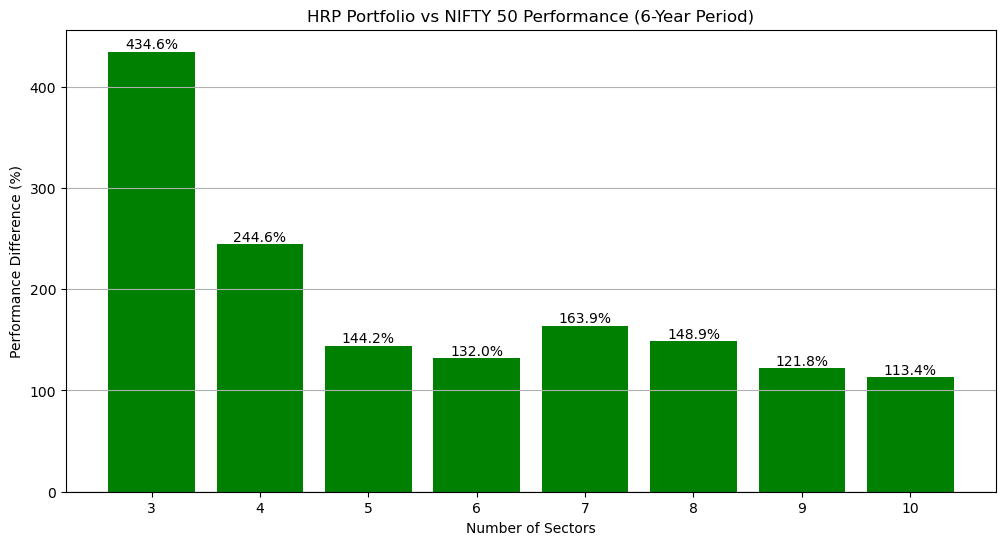


--- Investment Advice as of 2025-04-01 ---
Using training data from 2024-07-22 to 2025-03-31:

--- Top 3 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:

Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%

Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:

Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%

Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%
------------------------------------------------------------
--- Top 6 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:

Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%

Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%

Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%
------------------------------------------------------------
--- Top 7 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%
------------------------------------------------------------
--- Top 8 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%
------------------------------------------------------------
--- Top 9 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%

Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXAUTO
  Top Stocks: ['EICHERMOT.NS', 'TVSMOTOR.NS', 'M&M.NS', 'ASHOKLEY.NS', 'MARUTI.NS']
  Recommended HRP Weights:
    EICHERMOT.NS: 9.35%
    TVSMOTOR.NS: 8.41%
    M&M.NS: 44.86%
    ASHOKLEY.NS: 28.04%
    MARUTI.NS: 9.35%
------------------------------------------------------------
--- Top 10 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXAUTO
  Top Stocks: ['EICHERMOT.NS', 'TVSMOTOR.NS', 'M&M.NS', 'ASHOKLEY.NS', 'MARUTI.NS']
  Recommended HRP Weights:
    EICHERMOT.NS: 9.35%
    TVSMOTOR.NS: 8.41%
    M&M.NS: 44.86%
    ASHOKLEY.NS: 28.04%
    MARUTI.NS: 9.35%

Sector: ^CNXENERGY
  Top Stocks: ['RPOWER.NS', 'GVT&D.NS', 'HINDPETRO.NS', 'TORNTPOWER.NS', 'TRITURBINE.NS']
  Recommended HRP Weights:
    RPOWER.NS: 8.41%
    GVT&D.NS: 28.04%
    HINDPETRO.NS: 9.35%
    TORNTPOWER.NS: 44.86%
    TRITURBINE.NS: 9.35%
------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import requests

# =============================================================================
# 0. User Input: Number of Years for Simulation (between 1 and 15)
# =============================================================================
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-15): "))
        if 1 <= num_years <= 15:
            break
        else:
            print("Please enter a number between 1 and 15.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 15.")

# =============================================================================
# 1. Sector Data Download and Preprocessing (using sector indices)
# =============================================================================
# Define sector tickers (for indices)
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define time period based on user input
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

# Download data for each sector (using auto-adjusted prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame with aligned dates and drop missing values
prices = pd.concat(data_dict, axis=1).dropna()

# --- FIX: Reset the columns to be plain sector tickers (not multi-index)
if isinstance(prices.columns, pd.MultiIndex):
    prices.columns = prices.columns.get_level_values(0)

returns = prices.pct_change().dropna()

# =============================================================================
# 2. Download Benchmark Data for Trend/Stoploss Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded for trend analysis.")
benchmark_series = benchmark_data['Close'].squeeze()

# =============================================================================
# 3. Correlation Analysis & Clustering for Diversification (Sector Level)
# =============================================================================
correlation_matrix = returns.corr()
print(f"\nCorrelation Matrix of Sector Returns (Last {num_years} Years):")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster (3 clusters chosen here)
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values
sector_labels = kmeans.fit_predict(sector_features)
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 4. Validated Stocks Extraction: Read Valid Stock Components from CSV File
# =============================================================================
# We assume that the CSV file 'validated_stocks.csv' has at least two columns: "Sector" and "Symbol"
try:
    df_valid = pd.read_csv('validated_stocks.csv')
    # Group by the "Sector" column and create a dictionary mapping each sector to a list of valid symbols.
    all_symbols = {}
    for sector, group in df_valid.groupby('Sector'):
        symbols = group['Symbol'].tolist()
        # Append ".NS" extension if not already present
        symbols = [s if s.endswith('.NS') else s + '.NS' for s in symbols]
        all_symbols[sector] = symbols
        print(f"Valid symbols for {sector}: {symbols}")
        print("----------")
except Exception as e:
    print("Error reading validated stocks file:", e)
    all_symbols = {}

# =============================================================================
# 5. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    """
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    corr = returns_df.corr().fillna(0)
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    return weights / weights.sum()

# =============================================================================
# 6. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification.
    """
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    return selected[:n]

# =============================================================================
# 7. Function to Select Top Stocks within a Sector
# =============================================================================
def get_top_stocks(sector, train_start, train_end, top_n=5):
    """
    For a given sector, download historical data for all its valid component stocks over the training period,
    compute Sharpe ratios and then return the top 'top_n' stocks along with their HRP weights.
    """
    symbols = all_symbols.get(sector, [])
    if not symbols:
        print(f"No valid symbols available for sector {sector}.")
        return [], pd.Series(dtype=float)
    
    # Download historical price data for the stocks in the sector
    stock_data = yf.download(symbols, start=train_start, end=train_end, progress=False, auto_adjust=True)
    
    # Handle the case where multiple tickers are returned with multi-level columns
    if 'Close' in stock_data.columns:
        prices_stock = stock_data['Close']
    else:
        prices_stock = stock_data
    
    prices_stock = prices_stock.dropna(how='all', axis=0)
    if prices_stock.empty:
        print(f"No training data available for stocks in sector {sector}.")
        return [], pd.Series(dtype=float)
    
    returns_stock = prices_stock.pct_change().dropna()
    sharpe = returns_stock.mean() / returns_stock.std()
    sharpe = sharpe.dropna()
    # Select top_n stocks by Sharpe ratio
    top_stocks = sharpe.sort_values(ascending=False).head(top_n).index.tolist()
    selected_returns = returns_stock[top_stocks]
    hrp_weights_stocks = get_hrp_weights(selected_returns)
    return top_stocks, hrp_weights_stocks

# =============================================================================
# 8. Quarterly Rebalancing Simulation with Enhanced Risk Management & Transaction Costs
# =============================================================================
print("\n--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
stoploss_pct = 0.05  # 5% stoploss threshold
transaction_cost_rate = 0.00075  # 0.15% per trade (0.075% per buy and sell)

results_summary = []
all_quarterly_results = {}

# Risk factor function (using benchmark performance of previous quarter)
def get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates):
    if i == 0:
        return 1.0
    prev_q_start = prices.index[0] if i-1 == 0 else quarter_end_dates[i-2] + pd.Timedelta(days=1)
    prev_q_end = quarter_end_dates[i-1]
    benchmark_prev = benchmark_series[(benchmark_series.index >= prev_q_start) & (benchmark_series.index <= prev_q_end)]
    if benchmark_prev.empty:
        return 1.0
    prev_return = (benchmark_prev.iloc[-1] / benchmark_prev.iloc[0]) - 1
    risk_factor = np.clip(1 + prev_return, 0.5, 1.0)
    return risk_factor

# Loop over different numbers of sectors to invest in (from 3 to 10)
for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []
    quarterly_results = []
    
    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        # Use ~1 year of training data prior to quarter start (for sector selection)
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        # Sector-level Sharpe scores & diversified selection
        sharpe_scores = training_returns.mean() / training_returns.std()
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        # Calculate HRP weights for sectors based on training returns
        selected_training_returns = training_returns[selected_sectors]
        sector_hrp_weights = get_hrp_weights(selected_training_returns)
        
        # For each selected sector, determine top 5 stocks and get their HRP weights
        sector_stock_info = {}
        sector_stock_returns = {}
        sector_weighted_returns = {}
        
        for sector in selected_sectors:
            # For stock selection training period, use the same training period as for sectors
            top_stocks, stock_hrp_weights = get_top_stocks(sector, training_prices.index[0].date(), training_end.date(), top_n=5)
            if not top_stocks:
                continue
            # Download price data for these stocks for the current quarter period
            stock_prices = yf.download(top_stocks, start=q_start, end=q_end, progress=False, auto_adjust=True)
            if 'Close' in stock_prices.columns:
                stock_prices = stock_prices['Close']
            stock_prices = stock_prices.dropna(how='all', axis=0)
            if stock_prices.empty or len(stock_prices) < 2:
                continue
            # Compute raw return for each stock (from first to last day of quarter)
            start_prices = stock_prices.iloc[0]
            end_prices = stock_prices.iloc[-1]
            stock_returns = (end_prices / start_prices) - 1
            # Compute weighted return for the sector using the HRP weights from stock training data
            weighted_return = np.dot(stock_hrp_weights[top_stocks], stock_returns[top_stocks])
            
            sector_stock_info[sector] = {
                'top_stocks': top_stocks,
                'stock_hrp_weights': stock_hrp_weights[top_stocks].to_dict()
            }
            sector_stock_returns[sector] = stock_returns.to_dict()
            sector_weighted_returns[sector] = weighted_return
        
        # If none of the sectors returned valid stock info, skip this quarter
        if not sector_weighted_returns:
            continue
        
        # Compute overall portfolio return as weighted sum of (stock-based) sector returns
        overall_return = 0
        for sector in selected_sectors:
            if sector in sector_weighted_returns:
                overall_return += sector_hrp_weights[sector] * sector_weighted_returns[sector]
        
        # --- Intraperiod Stoploss Check using simulated daily returns ---
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        daily_returns = period_prices.pct_change().dropna()
        daily_portfolio_returns = daily_returns.apply(lambda row: np.dot(sector_hrp_weights[selected_sectors], row), axis=1)
        cum_daily = (1 + daily_portfolio_returns).cumprod()
        if cum_daily.min() < (1 - stoploss_pct):
            stoploss_triggered = True
            stoploss_return = -stoploss_pct
        else:
            stoploss_triggered = False
            stoploss_return = overall_return
        
        # Apply risk factor based on previous quarter benchmark performance
        risk_factor = get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates)
        effective_portfolio_return = risk_factor * stoploss_return
        
        # Incorporate transaction costs on entry and exit
        net_value_entry = cumulative_value * (1 - transaction_cost_rate)
        new_value = net_value_entry * (1 + effective_portfolio_return)
        net_value_exit = new_value * (1 - transaction_cost_rate)
        cumulative_value = net_value_exit
        quarterly_returns.append(effective_portfolio_return)
        
        # Store all details of this quarter's simulation
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'sector_hrp_weights': sector_hrp_weights.to_dict(),
            'sector_stock_info': sector_stock_info,
            'sector_stock_returns': sector_stock_returns,
            'sector_weighted_returns': sector_weighted_returns,
            'raw_portfolio_return': overall_return,
            'stoploss_triggered': stoploss_triggered,
            'stoploss_return': stoploss_return,
            'risk_factor': risk_factor,
            'effective_portfolio_return': effective_portfolio_return,
            'cumulative_value': cumulative_value
        })
        
        # Print simulation details for the quarter
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  Sector HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {sector_hrp_weights[sector]:.2%}")
            if sector in sector_stock_info:
                info = sector_stock_info[sector]
                print("      Top Stocks & Weights:")
                for stock, wt in info['stock_hrp_weights'].items():
                    print(f"        {stock}: {wt:.2%}")
        print(f"  Raw Portfolio Return: {overall_return:.2%}")
        if stoploss_triggered:
            print(f"  STOPLOSS Triggered: Capped Return = {stoploss_return:.2%}")
        print(f"  Risk Factor: {risk_factor:.2f}")
        print(f"  Effective Portfolio Return: {effective_portfolio_return:.2%}")
        print(f"  Cumulative Value after Transaction Costs: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan
    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# 9. Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
initial_capital_bench = 100000
benchmark_results = []

filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price = float(filtered_data.iloc[0])
end_price = float(filtered_data.iloc[-1])
total_return = (end_price / start_price) - 1
cagr = ((1 + total_return) ** (1/num_years)) - 1
final_value = initial_capital_bench * (1 + total_return)

benchmark_results.append({
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return * 100, 2),
    'CAGR (%)': round(cagr * 100, 2),
    'Final Portfolio Value': round(final_value, 2)
})

benchmark_results_df = pd.DataFrame(benchmark_results)
print(f"\n=== NIFTY 50 Benchmark Performance ({num_years} Years) ===")
print(benchmark_results_df.to_string(index=False))

nifty_final = final_value
comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_final) / nifty_final * 100
).round(2)

print(f"\n=== Final Performance Comparison ({num_years}-Year Period) ===")
print(comparison_df[['Number of Sectors', 'HRP Portfolio Value', 'NIFTY Value', 'Outperformance (%)']].to_string(index=False))

plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'],
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title(f"HRP Portfolio vs NIFTY 50 Performance ({num_years}-Year Period)")
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')
plt.show()

# =============================================================================
# 10. Investment Advice Based on Last 1 Year Data (Stock-Level)
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")
for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors and Their Top 5 Stocks with Recommended Weights:")
    for sector in top_n_sectors:
        top_stocks, stock_hrp_weights = get_top_stocks(sector, advice_training_prices.index[0].date(), advice_training_end.date(), top_n=5)
        if top_stocks:
            print(f"\nSector: {sector}")
            print(f"  Top Stocks: {top_stocks}")
            print("  Recommended HRP Weights:")
            for stock in top_stocks:
                print(f"    {stock}: {stock_hrp_weights[stock]:.2%}")
    print("-" * 60)

Enter the number of years for simulation (1-15):  1



Correlation Matrix of Sector Returns (Last 1 Years):
               ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG  ^CNXMEDIA  ^CNXMETAL  \
^CNXIT       1.000000  0.378929  0.297244  0.304218   0.238714   0.295587   
^CNXAUTO     0.378929  1.000000  0.584877  0.465893   0.539327   0.613397   
^NSEBANK     0.297244  0.584877  1.000000  0.278029   0.482081   0.643903   
^CNXFMCG     0.304218  0.465893  0.278029  1.000000   0.271951   0.245670   
^CNXMEDIA    0.238714  0.539327  0.482081  0.271951   1.000000   0.586464   
^CNXMETAL    0.295587  0.613397  0.643903  0.245670   0.586464   1.000000   
^CNXPSE      0.252495  0.587462  0.690783  0.228061   0.630868   0.817179   
^CNXMNC      0.421435  0.783729  0.626281  0.616541   0.606836   0.746627   
^CNXINFRA    0.368504  0.683511  0.754951  0.358376   0.611280   0.793735   
^CNXREALTY   0.292215  0.609175  0.598884  0.277003   0.559722   0.618298   
^CNXENERGY   0.279146  0.613759  0.693708  0.291643   0.625855   0.807503   
^CNXPSUBANK  0.217812 

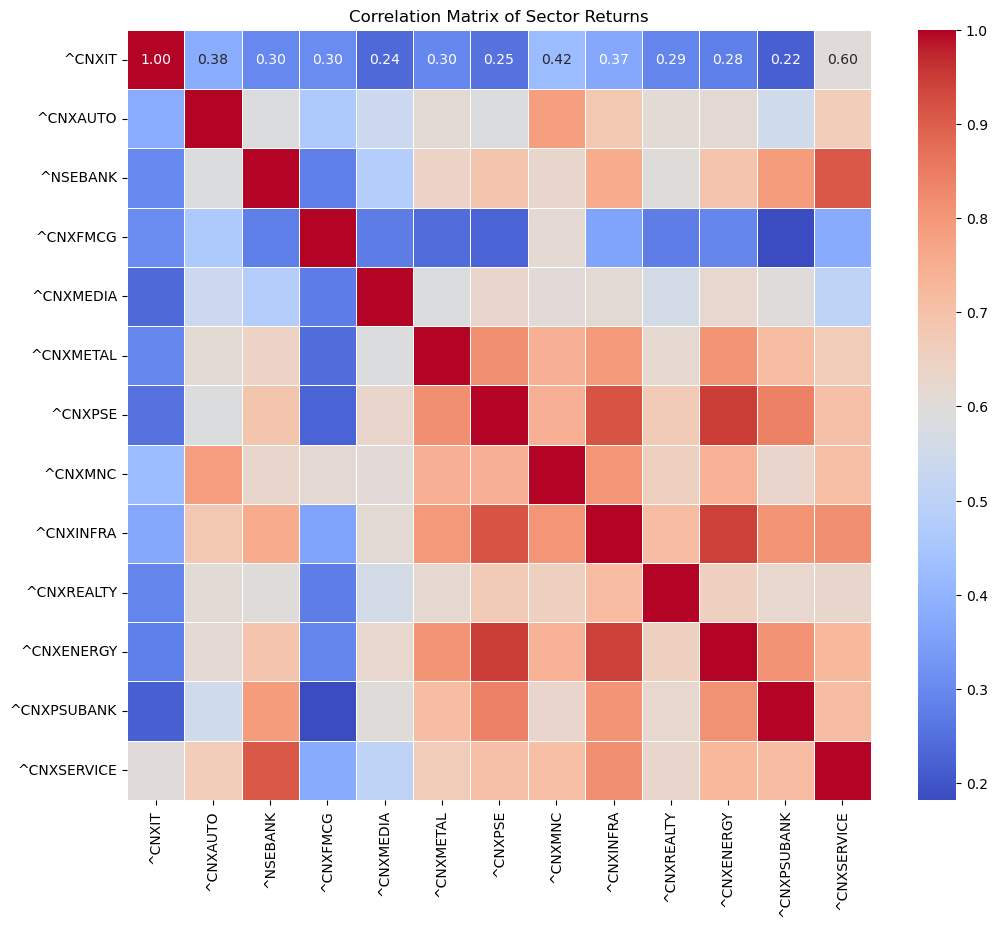

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector Cluster Mapping (for Diversification):
  ^CNXIT: Cluster 2
  ^CNXAUTO: Cluster 0
  ^NSEBANK: Cluster 1
  ^CNXFMCG: Cluster 2
  ^CNXMEDIA: Cluster 0
  ^CNXMETAL: Cluster 1
  ^CNXPSE: Cluster 1
  ^CNXMNC: Cluster 1
  ^CNXINFRA: Cluster 1
  ^CNXREALTY: Cluster 0
  ^CNXENERGY: Cluster 1
  ^CNXPSUBANK: Cluster 1
  ^CNXSERVICE: Cluster 1
Valid symbols for NIFTY_MIDCAP_100.NS: ['ACC.NS', 'APLAPOLLO.NS', 'ABFRL.NS', 'APOLLOTYRE.NS', 'ASHOKLEY.NS', 'ASTRAL.NS', 'AUROPHARMA.NS', 'BANKINDIA.NS', 'MAHABANK.NS', 'BHARATFORG.NS', 'BHEL.NS', 'BIOCON.NS', 'COFORGE.NS', 'COLPAL.NS', 'CONCOR.NS', 'CUMMINSIND.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'FEDERALBNK.NS', 'GMRAIRPORT.NS', 'GLENMARK.NS', 'GODREJPROP.NS', 'HINDPETRO.NS', 'HINDZINC.NS', 'IRB.NS', 'INDIANB.NS', 'IGL.NS', 'INDUSTOWER.NS', 'JUBLFOOD.NS', 'LTF.NS', 'LICHSGFIN.NS', 'LUPIN.NS', 'MRF.NS', 'M&MFIN.NS', 'MARICO.NS', 'MFSL.NS', 'MOTILALOFS.NS', 'MPHASIS.NS', 'MUTHOOTFIN.NS', 'NHPC.NS', 'NMDC.NS', 'NATIONALUM.NS', 'OBEROIRLTY.NS', 'OIL.NS'

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXAUTO', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        SCHAEFFLER.NS: 9.35%
        VEDL.NS: 44.86%
        SKFINDIA.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXAUTO: 50.00%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 28.04%
        EXIDEIND.NS: 8.41%
        BALKRISIND.NS: 9.35%
        BHARATFORG.NS: 44.86%
    ^CNXFMCG: 37.50%
      Top Stocks & Weights:
        EMAMILTD.NS: 28.04%
        MARICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        DABUR.NS: 9.35%
        GODREJCP.NS: 44.86%
  Raw Portfolio Return: 1.04%
  Risk Factor: 1.00
  Effective Portfolio Return: 1.04%
  Cumulative Value after Transaction Costs: ₹100,883.52
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXFMCG', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        COLPAL.NS: 28.04%
        ESCORTS.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXFMCG: 37.50%
      Top Stocks & Weights:
        COLPAL.NS: 9.35%
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        ITC.NS: 9.35%
    ^CNXAUTO: 50.00%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 8.41%
        BAJAJ-AUTO.NS: 28.04%
        TVSMOTOR.NS: 9.35%
        EICHERMOT.NS: 44.86%
  Raw Portfolio Return: -17.05%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹95,695.64
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXIT', '^CNXSERVICE', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TECHM.NS: 8.41%
        INFY.NS: 44.86%
        OFSS.NS: 9.35%
    ^CNXSERVICE: 12.50%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        SHRIRAMFIN.NS: 9.35%
        PFC.NS: 9.35%
    ^CNXREALTY: 50.00%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        OBEROIRLTY.NS: 8.41%
        PRESTIGE.NS: 28.04%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 44.86%
  Raw Portfolio Return: -19.48%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.92
  Effective Portfolio Return: -4.58%
  Cumulative Value after Transaction Costs: ₹91,173.12
--------------------------------------------------------------------------------

===== Simulating for Top 4 Sectors =====



C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXAUTO', '^CNXFMCG', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        SCHAEFFLER.NS: 9.35%
        VEDL.NS: 44.86%
        SKFINDIA.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXAUTO: 10.53%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 28.04%
        EXIDEIND.NS: 8.41%
        BALKRISIND.NS: 9.35%
        BHARATFORG.NS: 44.86%
    ^CNXFMCG: 31.58%
      Top Stocks & Weights:
        EMAMILTD.NS: 28.04%
        MARICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        DABUR.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXREALTY: 47.37%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 9.35%
  Raw Portfolio Return: 9.56%
  Risk Factor: 1.00
  Effective Portfolio Return: 9.56%
  Cumulative Value after Transaction Costs: ₹109,399

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXFMCG', '^CNXAUTO', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        COLPAL.NS: 28.04%
        ESCORTS.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXFMCG: 31.58%
      Top Stocks & Weights:
        COLPAL.NS: 9.35%
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        ITC.NS: 9.35%
    ^CNXAUTO: 47.37%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 8.41%
        BAJAJ-AUTO.NS: 28.04%
        TVSMOTOR.NS: 9.35%
        EICHERMOT.NS: 44.86%
    ^CNXSERVICE: 10.53%
      Top Stocks & Weights:
        SHRIRAMFIN.NS: 8.41%
        MUTHOOTFIN.NS: 9.35%
        CHOLAFIN.NS: 44.86%
        BAJAJFINSV.NS: 9.35%
        HDFCBANK.NS: 28.04%
  Raw Portfolio Return: -16.34%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXIT', '^CNXSERVICE', '^CNXREALTY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TECHM.NS: 8.41%
        INFY.NS: 44.86%
        OFSS.NS: 9.35%
    ^CNXSERVICE: 10.53%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        SHRIRAMFIN.NS: 9.35%
        PFC.NS: 9.35%
    ^CNXREALTY: 10.53%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        OBEROIRLTY.NS: 8.41%
        PRESTIGE.NS: 28.04%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        OFSS.NS: 9.35%
        ASHOKLEY.NS: 44.86%
        CRISIL.NS: 28.04%
        UBL.NS: 9.35%
  Raw Portfolio Return: -16.06%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.92
  Effective Portfolio Return: -4.58%
  Cumulative Va

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXAUTO', '^CNXFMCG', '^CNXREALTY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        SCHAEFFLER.NS: 9.35%
        VEDL.NS: 44.86%
        SKFINDIA.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXAUTO: 9.35%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 28.04%
        EXIDEIND.NS: 8.41%
        BALKRISIND.NS: 9.35%
        BHARATFORG.NS: 44.86%
    ^CNXFMCG: 28.04%
      Top Stocks & Weights:
        EMAMILTD.NS: 28.04%
        MARICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        DABUR.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXREALTY: 9.35%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 9.35%
    ^CNXMETAL: 44.86%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        HINDZINC.NS: 28.04%
        HINDALCO.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXFMCG', '^CNXAUTO', '^CNXSERVICE', '^CNXIT']
  Sector HRP Weights:
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        COLPAL.NS: 28.04%
        ESCORTS.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXFMCG: 28.04%
      Top Stocks & Weights:
        COLPAL.NS: 9.35%
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        ITC.NS: 9.35%
    ^CNXAUTO: 44.86%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 8.41%
        BAJAJ-AUTO.NS: 28.04%
        TVSMOTOR.NS: 9.35%
        EICHERMOT.NS: 44.86%
    ^CNXSERVICE: 9.35%
      Top Stocks & Weights:
        SHRIRAMFIN.NS: 8.41%
        MUTHOOTFIN.NS: 9.35%
        CHOLAFIN.NS: 44.86%
        BAJAJFINSV.NS: 9.35%
        HDFCBANK.NS: 28.04%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        INFY.NS: 9.35%
        TECHM.NS: 8.41%
        PERSISTENT.NS: 28.04%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXIT', '^CNXSERVICE', '^CNXREALTY', '^CNXMNC', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TECHM.NS: 8.41%
        INFY.NS: 44.86%
        OFSS.NS: 9.35%
    ^CNXSERVICE: 9.35%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        SHRIRAMFIN.NS: 9.35%
        PFC.NS: 9.35%
    ^CNXREALTY: 8.41%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        OBEROIRLTY.NS: 8.41%
        PRESTIGE.NS: 28.04%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        OFSS.NS: 9.35%
        ASHOKLEY.NS: 44.86%
        CRISIL.NS: 28.04%
        UBL.NS: 9.35%
    ^NSEBANK: 9.35%
      Top Stocks & Weights:
        FEDERALBNK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        ICICIBANK.NS: 8.41%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXAUTO', '^CNXFMCG', '^CNXREALTY', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        SCHAEFFLER.NS: 9.35%
        VEDL.NS: 44.86%
        SKFINDIA.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXAUTO: 8.55%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 28.04%
        EXIDEIND.NS: 8.41%
        BALKRISIND.NS: 9.35%
        BHARATFORG.NS: 44.86%
    ^CNXFMCG: 25.64%
      Top Stocks & Weights:
        EMAMILTD.NS: 28.04%
        MARICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        DABUR.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 9.35%
    ^CNXMETAL: 42.74%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        HINDZINC.NS: 28.04%
        HIND

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXFMCG', '^CNXAUTO', '^CNXSERVICE', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        COLPAL.NS: 28.04%
        ESCORTS.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        COLPAL.NS: 9.35%
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        ITC.NS: 9.35%
    ^CNXAUTO: 25.64%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 8.41%
        BAJAJ-AUTO.NS: 28.04%
        TVSMOTOR.NS: 9.35%
        EICHERMOT.NS: 44.86%
    ^CNXSERVICE: 8.55%
      Top Stocks & Weights:
        SHRIRAMFIN.NS: 8.41%
        MUTHOOTFIN.NS: 9.35%
        CHOLAFIN.NS: 44.86%
        BAJAJFINSV.NS: 9.35%
        HDFCBANK.NS: 28.04%
    ^CNXIT: 42.74%
      Top Stocks & Weights:
        INFY.NS: 9.35%
        TECHM.NS: 8.41%
        PERSISTE

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXIT', '^CNXSERVICE', '^CNXREALTY', '^CNXMNC', '^NSEBANK', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 6.84%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TECHM.NS: 8.41%
        INFY.NS: 44.86%
        OFSS.NS: 9.35%
    ^CNXSERVICE: 25.64%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        SHRIRAMFIN.NS: 9.35%
        PFC.NS: 9.35%
    ^CNXREALTY: 8.55%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        OBEROIRLTY.NS: 8.41%
        PRESTIGE.NS: 28.04%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXMNC: 7.69%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        OFSS.NS: 9.35%
        ASHOKLEY.NS: 44.86%
        CRISIL.NS: 28.04%
        UBL.NS: 9.35%
    ^NSEBANK: 8.55%
      Top Stocks & Weights:
        FEDERALBNK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        ICICIBANK.NS: 8

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXAUTO', '^CNXFMCG', '^CNXREALTY', '^CNXMETAL', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMNC: 5.69%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        SCHAEFFLER.NS: 9.35%
        VEDL.NS: 44.86%
        SKFINDIA.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXAUTO: 7.17%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 28.04%
        EXIDEIND.NS: 8.41%
        BALKRISIND.NS: 9.35%
        BHARATFORG.NS: 44.86%
    ^CNXFMCG: 23.89%
      Top Stocks & Weights:
        EMAMILTD.NS: 28.04%
        MARICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        DABUR.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXREALTY: 6.37%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 9.35%
    ^CNXMETAL: 40.96%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        HINDZINC.NS: 28.04%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXFMCG', '^CNXAUTO', '^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^CNXPSE']
  Sector HRP Weights:
    ^CNXMNC: 23.89%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        COLPAL.NS: 28.04%
        ESCORTS.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        COLPAL.NS: 9.35%
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        ITC.NS: 9.35%
    ^CNXAUTO: 7.96%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 8.41%
        BAJAJ-AUTO.NS: 28.04%
        TVSMOTOR.NS: 9.35%
        EICHERMOT.NS: 44.86%
    ^CNXSERVICE: 7.96%
      Top Stocks & Weights:
        SHRIRAMFIN.NS: 8.41%
        MUTHOOTFIN.NS: 9.35%
        CHOLAFIN.NS: 44.86%
        BAJAJFINSV.NS: 9.35%
        HDFCBANK.NS: 28.04%
    ^CNXIT: 40.96%
      Top Stocks & Weights:
        INFY.NS: 9.35%
        TECHM.NS: 8.41%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXIT', '^CNXSERVICE', '^CNXREALTY', '^CNXMNC', '^NSEBANK', '^CNXFMCG', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 5.69%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TECHM.NS: 8.41%
        INFY.NS: 44.86%
        OFSS.NS: 9.35%
    ^CNXSERVICE: 23.89%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        SHRIRAMFIN.NS: 9.35%
        PFC.NS: 9.35%
    ^CNXREALTY: 7.96%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        OBEROIRLTY.NS: 8.41%
        PRESTIGE.NS: 28.04%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXMNC: 7.17%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        OFSS.NS: 9.35%
        ASHOKLEY.NS: 44.86%
        CRISIL.NS: 28.04%
        UBL.NS: 9.35%
    ^NSEBANK: 7.96%
      Top Stocks & Weights:
        FEDERALBNK.NS: 28.04%
        HDFCBANK.NS: 9.35%
        ICI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXAUTO', '^CNXFMCG', '^CNXREALTY', '^CNXMETAL', '^CNXSERVICE', '^NSEBANK', '^CNXPSE']
  Sector HRP Weights:
    ^CNXMNC: 5.37%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        SCHAEFFLER.NS: 9.35%
        VEDL.NS: 44.86%
        SKFINDIA.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXAUTO: 6.76%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 28.04%
        EXIDEIND.NS: 8.41%
        BALKRISIND.NS: 9.35%
        BHARATFORG.NS: 44.86%
    ^CNXFMCG: 22.54%
      Top Stocks & Weights:
        EMAMILTD.NS: 28.04%
        MARICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        DABUR.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXREALTY: 6.01%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 9.35%
    ^CNXMETAL: 4.83%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        HINDZINC.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXFMCG', '^CNXAUTO', '^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^CNXPSE', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMNC: 22.54%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        COLPAL.NS: 28.04%
        ESCORTS.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXFMCG: 4.83%
      Top Stocks & Weights:
        COLPAL.NS: 9.35%
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        ITC.NS: 9.35%
    ^CNXAUTO: 7.51%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 8.41%
        BAJAJ-AUTO.NS: 28.04%
        TVSMOTOR.NS: 9.35%
        EICHERMOT.NS: 44.86%
    ^CNXSERVICE: 6.76%
      Top Stocks & Weights:
        SHRIRAMFIN.NS: 8.41%
        MUTHOOTFIN.NS: 9.35%
        CHOLAFIN.NS: 44.86%
        BAJAJFINSV.NS: 9.35%
        HDFCBANK.NS: 28.04%
    ^CNXIT: 39.45%
      Top Stocks & Weights:
        INFY.NS: 9.35%
        TECHM.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXIT', '^CNXSERVICE', '^CNXREALTY', '^CNXMNC', '^NSEBANK', '^CNXFMCG', '^CNXAUTO', '^CNXPSE']
  Sector HRP Weights:
    ^CNXIT: 4.83%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TECHM.NS: 8.41%
        INFY.NS: 44.86%
        OFSS.NS: 9.35%
    ^CNXSERVICE: 22.54%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        SHRIRAMFIN.NS: 9.35%
        PFC.NS: 9.35%
    ^CNXREALTY: 6.01%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        OBEROIRLTY.NS: 8.41%
        PRESTIGE.NS: 28.04%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        OFSS.NS: 9.35%
        ASHOKLEY.NS: 44.86%
        CRISIL.NS: 28.04%
        UBL.NS: 9.35%
    ^NSEBANK: 7.51%
      Top Stocks & Weights:
        FEDERALBNK.NS: 28.04%
        HDFCBANK.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXAUTO', '^CNXFMCG', '^CNXREALTY', '^CNXMETAL', '^CNXSERVICE', '^NSEBANK', '^CNXPSE', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXMNC: 5.11%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        SCHAEFFLER.NS: 9.35%
        VEDL.NS: 44.86%
        SKFINDIA.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXAUTO: 6.44%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 28.04%
        EXIDEIND.NS: 8.41%
        BALKRISIND.NS: 9.35%
        BHARATFORG.NS: 44.86%
    ^CNXFMCG: 21.47%
      Top Stocks & Weights:
        EMAMILTD.NS: 28.04%
        MARICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        DABUR.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXREALTY: 5.72%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 9.35%
    ^CNXMETAL: 4.60%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXFMCG', '^CNXAUTO', '^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^CNXPSE', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXMNC: 7.16%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        COLPAL.NS: 28.04%
        ESCORTS.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXFMCG: 4.17%
      Top Stocks & Weights:
        COLPAL.NS: 9.35%
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        ITC.NS: 9.35%
    ^CNXAUTO: 21.47%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 8.41%
        BAJAJ-AUTO.NS: 28.04%
        TVSMOTOR.NS: 9.35%
        EICHERMOT.NS: 44.86%
    ^CNXSERVICE: 5.72%
      Top Stocks & Weights:
        SHRIRAMFIN.NS: 8.41%
        MUTHOOTFIN.NS: 9.35%
        CHOLAFIN.NS: 44.86%
        BAJAJFINSV.NS: 9.35%
        HDFCBANK.NS: 28.04%
    ^CNXIT: 38.17%
      Top Stocks & Weights:
        INFY.NS: 9.35%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXIT', '^CNXSERVICE', '^CNXREALTY', '^CNXMNC', '^NSEBANK', '^CNXFMCG', '^CNXAUTO', '^CNXPSE', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 4.17%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TECHM.NS: 8.41%
        INFY.NS: 44.86%
        OFSS.NS: 9.35%
    ^CNXSERVICE: 21.47%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        SHRIRAMFIN.NS: 9.35%
        PFC.NS: 9.35%
    ^CNXREALTY: 5.72%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        OBEROIRLTY.NS: 8.41%
        PRESTIGE.NS: 28.04%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXMNC: 7.16%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        OFSS.NS: 9.35%
        ASHOKLEY.NS: 44.86%
        CRISIL.NS: 28.04%
        UBL.NS: 9.35%
    ^NSEBANK: 7.16%
      Top Stocks & Weights:
        FEDERALBNK.NS: 28.04%
        HDFCBA

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXAUTO', '^CNXFMCG', '^CNXREALTY', '^CNXMETAL', '^CNXSERVICE', '^NSEBANK', '^CNXPSE', '^CNXINFRA', '^CNXMEDIA']
  Sector HRP Weights:
    ^CNXMNC: 4.41%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        SCHAEFFLER.NS: 9.35%
        VEDL.NS: 44.86%
        SKFINDIA.NS: 28.04%
        HONAUT.NS: 9.35%
    ^CNXAUTO: 6.18%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 28.04%
        EXIDEIND.NS: 8.41%
        BALKRISIND.NS: 9.35%
        BHARATFORG.NS: 44.86%
    ^CNXFMCG: 20.58%
      Top Stocks & Weights:
        EMAMILTD.NS: 28.04%
        MARICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        DABUR.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXREALTY: 4.90%
      Top Stocks & Weights:
        RAYMOND.NS: 28.04%
        PRESTIGE.NS: 8.41%
        BRIGADE.NS: 9.35%
        ANANTRAJ.NS: 44.86%
        PHOENIXLTD.NS: 9.35%
    ^CNXMETAL: 4.00%
      Top Stocks & Weights:
        VEDL.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXFMCG', '^CNXAUTO', '^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^CNXPSE', '^CNXREALTY', '^CNXINFRA', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMNC: 4.41%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        COLPAL.NS: 28.04%
        ESCORTS.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
    ^CNXFMCG: 3.66%
      Top Stocks & Weights:
        COLPAL.NS: 9.35%
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        ITC.NS: 9.35%
    ^CNXAUTO: 6.86%
      Top Stocks & Weights:
        MOTHERSON.NS: 9.35%
        M&M.NS: 8.41%
        BAJAJ-AUTO.NS: 28.04%
        TVSMOTOR.NS: 9.35%
        EICHERMOT.NS: 44.86%
    ^CNXSERVICE: 20.58%
      Top Stocks & Weights:
        SHRIRAMFIN.NS: 8.41%
        MUTHOOTFIN.NS: 9.35%
        CHOLAFIN.NS: 44.86%
        BAJAJFINSV.NS: 9.35%
        HDFCBANK.NS: 28.04%
    ^CNXIT: 37.05%
      Top Stocks & Weights:
        INFY.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXIT', '^CNXSERVICE', '^CNXREALTY', '^CNXMNC', '^NSEBANK', '^CNXFMCG', '^CNXAUTO', '^CNXPSE', '^CNXMETAL', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 3.66%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TECHM.NS: 8.41%
        INFY.NS: 44.86%
        OFSS.NS: 9.35%
    ^CNXSERVICE: 20.58%
      Top Stocks & Weights:
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 8.41%
        ICICIBANK.NS: 44.86%
        SHRIRAMFIN.NS: 9.35%
        PFC.NS: 9.35%
    ^CNXREALTY: 5.49%
      Top Stocks & Weights:
        ANANTRAJ.NS: 9.35%
        OBEROIRLTY.NS: 8.41%
        PRESTIGE.NS: 28.04%
        BRIGADE.NS: 9.35%
        GODREJPROP.NS: 44.86%
    ^CNXMNC: 6.86%
      Top Stocks & Weights:
        VEDL.NS: 8.41%
        OFSS.NS: 9.35%
        ASHOKLEY.NS: 44.86%
        CRISIL.NS: 28.04%
        UBL.NS: 9.35%
    ^NSEBANK: 6.86%
      Top Stocks & Weights:
        FEDERALBNK.NS: 28.04%
 

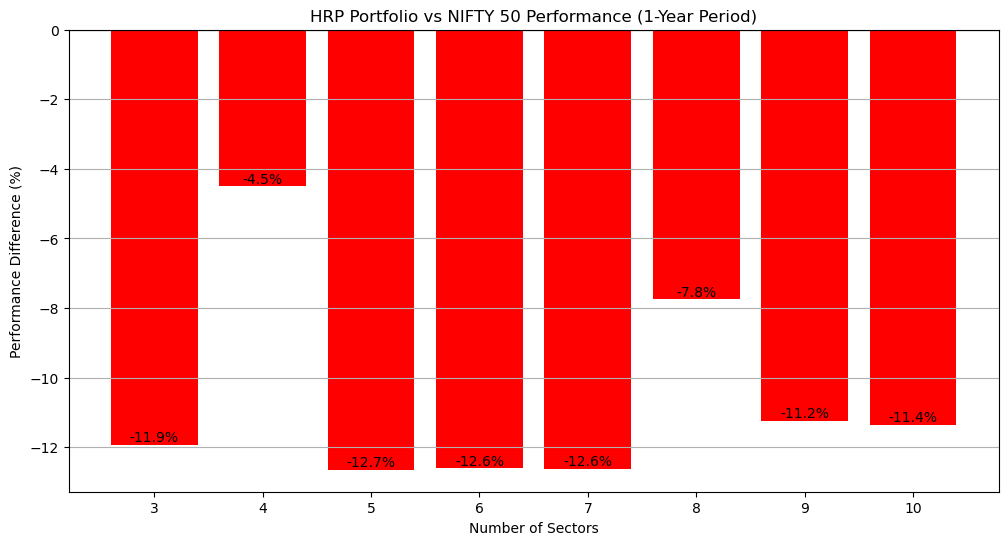


--- Investment Advice as of 2025-04-01 ---
Using training data from 2024-07-22 to 2025-03-31:

--- Top 3 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:

Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%

Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:

Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%

Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%
------------------------------------------------------------
--- Top 6 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:

Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%

Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%

Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%
------------------------------------------------------------
--- Top 7 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%

Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%

Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%
------------------------------------------------------------
--- Top 8 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%

Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%

Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%

Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%
------------------------------------------------------------
--- Top 9 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:

Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXAUTO
  Top Stocks: ['EICHERMOT.NS', 'TVSMOTOR.NS', 'M&M.NS', 'ASHOKLEY.NS', 'MARUTI.NS']
  Recommended HRP Weights:
    EICHERMOT.NS: 9.35%
    TVSMOTOR.NS: 8.41%
    M&M.NS: 44.86%
    ASHOKLEY.NS: 28.04%
    MARUTI.NS: 9.35%
------------------------------------------------------------
--- Top 10 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXAUTO
  Top Stocks: ['EICHERMOT.NS', 'TVSMOTOR.NS', 'M&M.NS', 'ASHOKLEY.NS', 'MARUTI.NS']
  Recommended HRP Weights:
    EICHERMOT.NS: 9.35%
    TVSMOTOR.NS: 8.41%
    M&M.NS: 44.86%
    ASHOKLEY.NS: 28.04%
    MARUTI.NS: 9.35%

Sector: ^CNXENERGY
  Top Stocks: ['RPOWER.NS', 'GVT&D.NS', 'HINDPETRO.NS', 'TORNTPOWER.NS', 'TRITURBINE.NS']
  Recommended HRP Weights:
    RPOWER.NS: 8.41%
    GVT&D.NS: 28.04%
    HINDPETRO.NS: 9.35%
    TORNTPOWER.NS: 44.86%
    TRITURBINE.NS: 9.35%
------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1664989693.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import requests

# =============================================================================
# 0. User Input: Number of Years for Simulation (between 1 and 15)
# =============================================================================
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-15): "))
        if 1 <= num_years <= 15:
            break
        else:
            print("Please enter a number between 1 and 15.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 15.")

# =============================================================================
# 1. Sector Data Download and Preprocessing (using sector indices)
# =============================================================================
# Define sector tickers (for indices)
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define time period based on user input
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

# Download data for each sector (using auto-adjusted prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame with aligned dates and drop missing values
prices = pd.concat(data_dict, axis=1).dropna()

# --- FIX: Reset the columns to be plain sector tickers (not multi-index)
if isinstance(prices.columns, pd.MultiIndex):
    prices.columns = prices.columns.get_level_values(0)

returns = prices.pct_change().dropna()

# =============================================================================
# 2. Download Benchmark Data for Trend/Stoploss Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded for trend analysis.")
benchmark_series = benchmark_data['Close'].squeeze()

# =============================================================================
# 3. Correlation Analysis & Clustering for Diversification (Sector Level)
# =============================================================================
correlation_matrix = returns.corr()
print(f"\nCorrelation Matrix of Sector Returns (Last {num_years} Years):")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster (3 clusters chosen here)
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values
sector_labels = kmeans.fit_predict(sector_features)
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 4. Validated Stocks Extraction: Read Valid Stock Components from CSV File
# =============================================================================
# We assume that the CSV file 'validated_stocks.csv' has at least two columns: "Sector" and "Symbol"
try:
    df_valid = pd.read_csv('validated_stocks.csv')
    # Group by the "Sector" column and create a dictionary mapping each sector to a list of valid symbols.
    all_symbols = {}
    for sector, group in df_valid.groupby('Sector'):
        symbols = group['Symbol'].tolist()
        # Append ".NS" extension if not already present
        symbols = [s if s.endswith('.NS') else s + '.NS' for s in symbols]
        all_symbols[sector] = symbols
        print(f"Valid symbols for {sector}: {symbols}")
        print("----------")
except Exception as e:
    print("Error reading validated stocks file:", e)
    all_symbols = {}

# =============================================================================
# 5. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    """
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    corr = returns_df.corr().fillna(0)
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    return weights / weights.sum()

# =============================================================================
# 6. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification.
    """
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    return selected[:n]

# =============================================================================
# 7. Function to Select Top Stocks within a Sector
# =============================================================================
def get_top_stocks(sector, train_start, train_end, top_n=5):
    """
    For a given sector, download historical data for all its valid component stocks over the training period,
    compute Sharpe ratios and then return the top 'top_n' stocks along with their HRP weights.
    """
    symbols = all_symbols.get(sector, [])
    if not symbols:
        print(f"No valid symbols available for sector {sector}.")
        return [], pd.Series(dtype=float)
    
    # Download historical price data for the stocks in the sector
    stock_data = yf.download(symbols, start=train_start, end=train_end, progress=False, auto_adjust=True)
    
    # Handle the case where multiple tickers are returned with multi-level columns
    if 'Close' in stock_data.columns:
        prices_stock = stock_data['Close']
    else:
        prices_stock = stock_data
    
    prices_stock = prices_stock.dropna(how='all', axis=0)
    if prices_stock.empty:
        print(f"No training data available for stocks in sector {sector}.")
        return [], pd.Series(dtype=float)
    
    returns_stock = prices_stock.pct_change().dropna()
    sharpe = returns_stock.mean() / returns_stock.std()
    sharpe = sharpe.dropna()
    # Select top_n stocks by Sharpe ratio
    top_stocks = sharpe.sort_values(ascending=False).head(top_n).index.tolist()
    selected_returns = returns_stock[top_stocks]
    hrp_weights_stocks = get_hrp_weights(selected_returns)
    return top_stocks, hrp_weights_stocks

# =============================================================================
# 8. Quarterly Rebalancing Simulation with Enhanced Risk Management & Transaction Costs
# =============================================================================
print("\n--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
stoploss_pct = 0.05  # 5% stoploss threshold
transaction_cost_rate = 0.00075  # 0.15% per trade (0.075% per buy and sell)

results_summary = []
all_quarterly_results = {}

# Risk factor function (using benchmark performance of previous quarter)
def get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates):
    if i == 0:
        return 1.0
    prev_q_start = prices.index[0] if i-1 == 0 else quarter_end_dates[i-2] + pd.Timedelta(days=1)
    prev_q_end = quarter_end_dates[i-1]
    benchmark_prev = benchmark_series[(benchmark_series.index >= prev_q_start) & (benchmark_series.index <= prev_q_end)]
    if benchmark_prev.empty:
        return 1.0
    prev_return = (benchmark_prev.iloc[-1] / benchmark_prev.iloc[0]) - 1
    risk_factor = np.clip(1 + prev_return, 0.5, 1.0)
    return risk_factor

# Loop over different numbers of sectors to invest in (from 3 to 10)
for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []
    quarterly_results = []
    
    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        # Use ~1 year of training data prior to quarter start (for sector selection)
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        # Sector-level Sharpe scores & diversified selection
        sharpe_scores = training_returns.mean() / training_returns.std()
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        # Calculate HRP weights for sectors based on training returns
        selected_training_returns = training_returns[selected_sectors]
        sector_hrp_weights = get_hrp_weights(selected_training_returns)
        
        # For each selected sector, determine top 5 stocks and get their HRP weights
        sector_stock_info = {}
        sector_stock_returns = {}
        sector_weighted_returns = {}
        
        for sector in selected_sectors:
            # For stock selection training period, use the same training period as for sectors
            top_stocks, stock_hrp_weights = get_top_stocks(sector, training_prices.index[0].date(), training_end.date(), top_n=5)
            if not top_stocks:
                continue
            # Download price data for these stocks for the current quarter period
            stock_prices = yf.download(top_stocks, start=q_start, end=q_end, progress=False, auto_adjust=True)
            if 'Close' in stock_prices.columns:
                stock_prices = stock_prices['Close']
            stock_prices = stock_prices.dropna(how='all', axis=0)
            if stock_prices.empty or len(stock_prices) < 2:
                continue
            # Compute raw return for each stock (from first to last day of quarter)
            start_prices = stock_prices.iloc[0]
            end_prices = stock_prices.iloc[-1]
            stock_returns = (end_prices / start_prices) - 1
            # Compute weighted return for the sector using the HRP weights from stock training data
            weighted_return = np.dot(stock_hrp_weights[top_stocks], stock_returns[top_stocks])
            
            sector_stock_info[sector] = {
                'top_stocks': top_stocks,
                'stock_hrp_weights': stock_hrp_weights[top_stocks].to_dict()
            }
            sector_stock_returns[sector] = stock_returns.to_dict()
            sector_weighted_returns[sector] = weighted_return
        
        # If none of the sectors returned valid stock info, skip this quarter
        if not sector_weighted_returns:
            continue
        
        # Compute overall portfolio return as weighted sum of (stock-based) sector returns
        overall_return = 0
        for sector in selected_sectors:
            if sector in sector_weighted_returns:
                overall_return += sector_hrp_weights[sector] * sector_weighted_returns[sector]
        
        # --- Intraperiod Stoploss Check using simulated daily returns ---
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        daily_returns = period_prices.pct_change().dropna()
        daily_portfolio_returns = daily_returns.apply(lambda row: np.dot(sector_hrp_weights[selected_sectors], row), axis=1)
        cum_daily = (1 + daily_portfolio_returns).cumprod()
        if cum_daily.min() < (1 - stoploss_pct):
            stoploss_triggered = True
            stoploss_return = -stoploss_pct
        else:
            stoploss_triggered = False
            stoploss_return = overall_return
        
        # Apply risk factor based on previous quarter benchmark performance
        risk_factor = get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates)
        effective_portfolio_return = risk_factor * stoploss_return
        
        # Incorporate transaction costs on entry and exit
        net_value_entry = cumulative_value * (1 - transaction_cost_rate)
        new_value = net_value_entry * (1 + effective_portfolio_return)
        net_value_exit = new_value * (1 - transaction_cost_rate)
        cumulative_value = net_value_exit
        quarterly_returns.append(effective_portfolio_return)
        
        # Store all details of this quarter's simulation
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'sector_hrp_weights': sector_hrp_weights.to_dict(),
            'sector_stock_info': sector_stock_info,
            'sector_stock_returns': sector_stock_returns,
            'sector_weighted_returns': sector_weighted_returns,
            'raw_portfolio_return': overall_return,
            'stoploss_triggered': stoploss_triggered,
            'stoploss_return': stoploss_return,
            'risk_factor': risk_factor,
            'effective_portfolio_return': effective_portfolio_return,
            'cumulative_value': cumulative_value
        })
        
        # Print simulation details for the quarter
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  Sector HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {sector_hrp_weights[sector]:.2%}")
            if sector in sector_stock_info:
                info = sector_stock_info[sector]
                print("      Top Stocks & Weights:")
                for stock, wt in info['stock_hrp_weights'].items():
                    print(f"        {stock}: {wt:.2%}")
        print(f"  Raw Portfolio Return: {overall_return:.2%}")
        if stoploss_triggered:
            print(f"  STOPLOSS Triggered: Capped Return = {stoploss_return:.2%}")
        print(f"  Risk Factor: {risk_factor:.2f}")
        print(f"  Effective Portfolio Return: {effective_portfolio_return:.2%}")
        print(f"  Cumulative Value after Transaction Costs: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan
    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# 9. Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
initial_capital_bench = 100000
benchmark_results = []

filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price = float(filtered_data.iloc[0])
end_price = float(filtered_data.iloc[-1])
total_return = (end_price / start_price) - 1
cagr = ((1 + total_return) ** (1/num_years)) - 1
final_value = initial_capital_bench * (1 + total_return)

benchmark_results.append({
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return * 100, 2),
    'CAGR (%)': round(cagr * 100, 2),
    'Final Portfolio Value': round(final_value, 2)
})

benchmark_results_df = pd.DataFrame(benchmark_results)
print(f"\n=== NIFTY 50 Benchmark Performance ({num_years} Years) ===")
print(benchmark_results_df.to_string(index=False))

nifty_final = final_value
comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_final) / nifty_final * 100
).round(2)

print(f"\n=== Final Performance Comparison ({num_years}-Year Period) ===")
print(comparison_df[['Number of Sectors', 'HRP Portfolio Value', 'NIFTY Value', 'Outperformance (%)']].to_string(index=False))

plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'],
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title(f"HRP Portfolio vs NIFTY 50 Performance ({num_years}-Year Period)")
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')
plt.show()

# =============================================================================
# 10. Investment Advice Based on Last 1 Year Data (Stock-Level)
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")
for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors and Their Top 5 Stocks with Recommended Weights:")
    for sector in top_n_sectors:
        top_stocks, stock_hrp_weights = get_top_stocks(sector, advice_training_prices.index[0].date(), advice_training_end.date(), top_n=5)
        if top_stocks:
            print(f"\nSector: {sector}")
            print(f"  Top Stocks: {top_stocks}")
            print("  Recommended HRP Weights:")
            for stock in top_stocks:
                print(f"    {stock}: {stock_hrp_weights[stock]:.2%}")
    print("-" * 60)

Enter the number of years for simulation (1-15):  10



Correlation Matrix of Sector Returns (Last 10 Years):
               ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG  ^CNXMEDIA  ^CNXMETAL  \
^CNXIT       1.000000  0.363854  0.345619  0.380301   0.309146   0.170204   
^CNXAUTO     0.363854  1.000000  0.693498  0.541067   0.570442   0.594833   
^NSEBANK     0.345619  0.693498  1.000000  0.500290   0.503043   0.541235   
^CNXFMCG     0.380301  0.541067  0.500290  1.000000   0.391456   0.343876   
^CNXMEDIA    0.309146  0.570442  0.503043  0.391456   1.000000   0.490533   
^CNXMETAL    0.170204  0.594833  0.541235  0.343876   0.490533   1.000000   
^CNXPSE      0.252165  0.635379  0.592918  0.422601   0.555662   0.737027   
^CNXMNC      0.469631  0.797870  0.680861  0.746342   0.576053   0.562323   
^CNXINFRA    0.444959  0.740202  0.730773  0.574696   0.578925   0.574987   
^CNXREALTY   0.338261  0.619188  0.615000  0.450101   0.552764   0.452584   
^CNXENERGY   0.268921  0.632421  0.606328  0.448855   0.520480   0.708272   
^CNXPSUBANK  0.231741

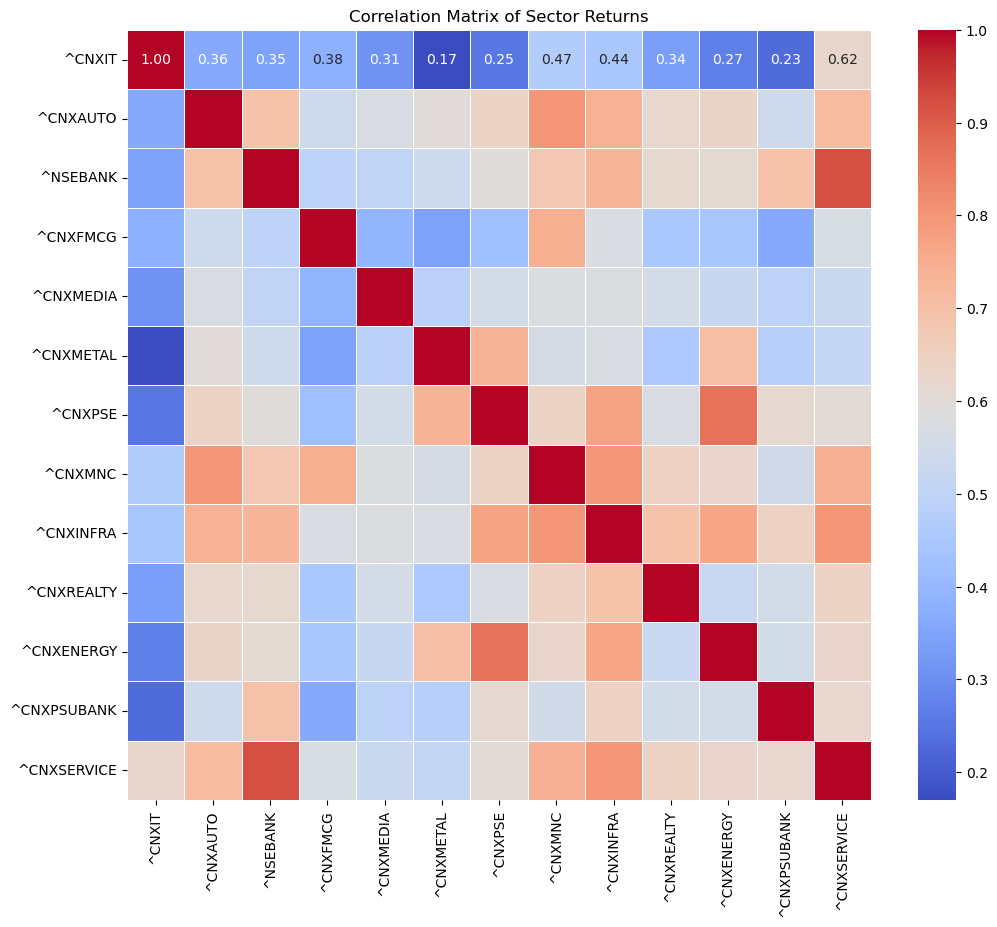

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector Cluster Mapping (for Diversification):
  ^CNXIT: Cluster 2
  ^CNXAUTO: Cluster 1
  ^NSEBANK: Cluster 1
  ^CNXFMCG: Cluster 1
  ^CNXMEDIA: Cluster 0
  ^CNXMETAL: Cluster 0
  ^CNXPSE: Cluster 1
  ^CNXMNC: Cluster 1
  ^CNXINFRA: Cluster 1
  ^CNXREALTY: Cluster 1
  ^CNXENERGY: Cluster 1
  ^CNXPSUBANK: Cluster 0
  ^CNXSERVICE: Cluster 1
Valid symbols for NIFTY_MIDCAP_100.NS: ['ACC.NS', 'APLAPOLLO.NS', 'ABFRL.NS', 'APOLLOTYRE.NS', 'ASHOKLEY.NS', 'ASTRAL.NS', 'AUROPHARMA.NS', 'BANKINDIA.NS', 'MAHABANK.NS', 'BHARATFORG.NS', 'BHEL.NS', 'BIOCON.NS', 'COFORGE.NS', 'COLPAL.NS', 'CONCOR.NS', 'CUMMINSIND.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'FEDERALBNK.NS', 'GMRAIRPORT.NS', 'GLENMARK.NS', 'GODREJPROP.NS', 'HINDPETRO.NS', 'HINDZINC.NS', 'IRB.NS', 'INDIANB.NS', 'IGL.NS', 'INDUSTOWER.NS', 'JUBLFOOD.NS', 'LTF.NS', 'LICHSGFIN.NS', 'LUPIN.NS', 'MRF.NS', 'M&MFIN.NS', 'MARICO.NS', 'MFSL.NS', 'MOTILALOFS.NS', 'MPHASIS.NS', 'MUTHOOTFIN.NS', 'NHPC.NS', 'NMDC.NS', 'NATIONALUM.NS', 'OBEROIRLTY.NS', 'OIL.NS'

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXMEDIA', '^CNXIT']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        COALINDIA.NS: 9.35%
        HINDPETRO.NS: 28.04%
        NLCINDIA.NS: 44.86%
        BPCL.NS: 9.35%
    ^CNXMEDIA: 50.00%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        NETWORK18.NS: 9.35%
        ZEEL.NS: 9.35%
        HATHWAY.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        OFSS.NS: 9.35%
        COFORGE.NS: 28.04%
        TCS.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
  Raw Portfolio Return: 4.68%
  Risk Factor: 0.97
  Effective Portfolio Return: 4.52%
  Cumulative Value after Transaction Costs: ₹104,364.37
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXIT', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMEDIA: 12.50%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 9.35%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXFMCG: 37.50%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 9.35%
        GODREJCP.NS: 28.04%
        MARICO.NS: 44.86%
        DABUR.NS: 9.35%
  Raw Portfolio Return: 7.95%
  Risk Factor: 0.94
  Effective Portfolio Return: 7.48%
  Cumulative Value after Transaction Costs: ₹112,002.43
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXFMCG', '^CNXIT']
  Sector HRP Weights:
    ^CNXMEDIA: 12.50%
      Top Stocks & Weights:
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 44.86%
        DBCORP.NS: 9.35%
    ^CNXFMCG: 37.50%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
        RADICO.NS: 28.04%
        EMAMILTD.NS: 9.35%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
  Raw Portfolio Return: -5.43%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.43%
  Cumulative Value after Transaction Costs: ₹105,761.59
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT']
  Sector HRP Weights:
    ^CNXMEDIA: 12.50%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        ZEEL.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        SUNTV.NS: 28.04%
        DISHTV.NS: 9.35%
    ^CNXENERGY: 50.00%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
  Raw Portfolio Return: 12.66%
  Risk Factor: 0.94
  Effective Portfolio Return: 11.86%
  Cumulative Value after Transaction Costs: ₹118,129.40
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT']
  Sector HRP Weights:
    ^CNXMEDIA: 12.50%
      Top Stocks & Weights:
        SUNTV.NS: 9.35%
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        DISHTV.NS: 44.86%
    ^CNXENERGY: 50.00%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
  Raw Portfolio Return: 5.28%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.28%
  Cumulative Value after Transaction Costs: ₹124,182.28
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXMEDIA', '^CNXIT']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        MARICO.NS: 28.04%
        BRITANNIA.NS: 9.35%
        GODREJCP.NS: 9.35%
        ITC.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXMEDIA: 50.00%
      Top Stocks & Weights:
        SUNTV.NS: 8.41%
        SAREGAMA.NS: 28.04%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
  Raw Portfolio Return: 9.88%
  Risk Factor: 1.00
  Effective Portfolio Return: 9.88%
  Cumulative Value after Transaction Costs: ₹136,247.34
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT']
  Sector HRP Weights:
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 50.00%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        SUNTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
  Raw Portfolio Return: 25.98%
  Risk Factor: 1.00
  Effective Portfolio Return: 25.98%
  Cumulative Value after Transaction Costs: ₹171,391.47
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT']
  Sector HRP Weights:
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 9.35%
        HONAUT.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 50.00%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        ZEEL.NS: 28.04%
        NETWORK18.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        WIPRO.NS: 9.35%
  Raw Portfolio Return: -5.81%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.81%
  Cumulative Value after Transaction Costs: ₹161,197.50
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT']
  Sector HRP Weights:
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 9.35%
        3MINDIA.NS: 8.41%
        HONAUT.NS: 44.86%
    ^CNXMEDIA: 50.00%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
  Raw Portfolio Return: -0.57%
  Risk Factor: 0.97
  Effective Portfolio Return: -0.55%
  Cumulative Value after Transaction Costs: ₹160,066.10
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT']
  Sector HRP Weights:
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        MARUTI.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        HONAUT.NS: 28.04%
    ^CNXMEDIA: 50.00%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 28.04%
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
  Raw Portfolio Return: -2.75%
  STOPLOSS Triggered: Capped Return = -2.75%
  Risk Factor: 1.00
  Effective Portfolio Return: -2.75%
  Cumulative Value after Transaction Costs: ₹155,431.05
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 28.04%
        TATASTEEL.NS: 9.35%
        WELCORP.NS: 44.86%
  Raw Portfolio Return: -3.61%
  STOPLOSS Triggered: Capped Return = -3.61%
  Risk Factor: 1.00
  Effective Portfolio Return: -3.61%
  Cumulative Value after Transaction Costs: ₹149,590.52
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
        APLAPOLLO.NS: 8.41%
        WELCORP.NS: 44.86%
        TATASTEEL.NS: 9.35%
  Raw Portfolio Return: -2.04%
  Risk Factor: 0.99
  Effective Portfolio Return: -2.01%
  Cumulative Value after Transaction Costs: ₹146,366.59
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        OFSS.NS: 44.86%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
  Raw Portfolio Return: -0.95%
  STOPLOSS Triggered: Capped Return = -0.95%
  Risk Factor: 1.00
  Effective Portfolio Return: -0.95%
  Cumulative Value after Transaction Costs: ₹144,758.55
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXSERVICE: 12.50%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        WIPRO.NS: 28.04%
    ^CNXMETAL: 37.50%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
  Raw Portfolio Return: -6.63%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹137,314.42
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
  Raw Portfolio Return: 10.52%
  Risk Factor: 0.97
  Effective Portfolio Return: 10.18%
  Cumulative Value after Transaction Costs: ₹151,061.61
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXSERVICE: 12.50%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 37.50%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        WELCORP.NS: 44.86%
        HINDZINC.NS: 9.35%
  Raw Portfolio Return: -33.30%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹143,293.35
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        NESTLEIND.NS: 9.35%
        BRITANNIA.NS: 44.86%
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 37.50%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        NMDC.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
  Raw Portfolio Return: 28.26%
  Risk Factor: 0.71
  Effective Portfolio Return: 19.95%
  Cumulative Value after Transaction Costs: ₹171,616.08
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        IGL.NS: 9.35%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 28.04%
        BPCL.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        ADANIENT.NS: 9.35%
  Raw Portfolio Return: 37.62%
  Risk Factor: 1.00
  Effective Portfolio Return: 37.62%
  Cumulative Value after Transaction Costs: ₹235,823.75
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        BPCL.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 28.04%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
  Raw Portfolio Return: 25.32%
  Risk Factor: 1.00
  Effective Portfolio Return: 25.32%
  Cumulative Value after Transaction Costs: ₹295,099.95
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
  Raw Portfolio Return: 22.57%
  STOPLOSS Triggered: Capped Return = 22.57%
  Risk Factor: 1.00
  Effective Portfolio Return: 22.57%
  Cumulative Value after Transaction Costs: ₹361,151.61
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        MPHASIS.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        PERSISTENT.NS: 44.86%
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
  Raw Portfolio Return: 25.38%
  Risk Factor: 1.00
  Effective Portfolio Return: 25.38%
  Cumulative Value after Transaction Costs: ₹452,150.25
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TCS.NS: 9.35%
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
  Raw Portfolio Return: 11.58%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.58%
  Cumulative Value after Transaction Costs: ₹503,771.83
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 28.04%
        JSWENERGY.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
  Raw Portfolio Return: 8.08%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.08%
  Cumulative Value after Transaction Costs: ₹543,684.60
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
  Raw Portfolio Return: -0.98%
  STOPLOSS Triggered: Capped Return = -0.98%
  Risk Factor: 0.99
  Effective Portfolio Return: -0.97%
  Cumulative Value after Transaction Costs: ₹537,592.06
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        TATAPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        TATASTEEL.NS: 9.35%
  Raw Portfolio Return: -10.00%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹510,191.76
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        ADANIPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
  Raw Portfolio Return: 15.59%
  Risk Factor: 0.89
  Effective Portfolio Return: 13.92%
  Cumulative Value after Transaction Costs: ₹580,345.69
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        ADANIPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
  Raw Portfolio Return: 13.94%
  Risk Factor: 1.00
  Effective Portfolio Return: 13.94%
  Cumulative Value after Transaction Costs: ₹660,267.46
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        ADANIPOWER.NS: 44.86%
        PETRONET.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
  Raw Portfolio Return: -18.28%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹626,313.56
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 37.50%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
  Raw Portfolio Return: 5.60%
  Risk Factor: 0.95
  Effective Portfolio Return: 5.34%
  Cumulative Value after Transaction Costs: ₹658,761.38
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 37.50%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 28.04%
        JSL.NS: 44.86%
        TATASTEEL.NS: 9.35%
  Raw Portfolio Return: 16.82%
  Risk Factor: 1.00
  Effective Portfolio Return: 16.82%
  Cumulative Value after Transaction Costs: ₹768,382.21
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXFMCG: 12.50%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 50.00%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMETAL: 37.50%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
  Raw Portfolio Return: 18.12%
  Risk Factor: 1.00
  Effective Portfolio Return: 18.12%
  Cumulative Value after Transaction Costs: ₹906,224.31
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        SJVN.NS: 28.04%
        IGL.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        NMDC.NS: 44.86%
        JSL.NS: 9.35%
  Raw Portfolio Return: 0.80%
  Risk Factor: 1.00
  Effective Portfolio Return: 0.80%
  Cumulative Value after Transaction Costs: ₹912,072.65
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        NHPC.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
  Raw Portfolio Return: 5.42%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.42%
  Cumulative Value after Transaction Costs: ₹960,074.90
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 12.50%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        POWERGRID.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        OFSS.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
  Raw Portfolio Return: 4.83%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.83%
  Cumulative Value after Transaction Costs: ₹1,004,976.78
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
  Raw Portfolio Return: -3.67%
  STOPLOSS Triggered: Capped Return = -3.67%
  Risk Factor: 1.00
  Effective Portfolio Return: -3.67%
  Cumulative Value after Transaction Costs: ₹966,643.59
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMNC: 12.50%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 28.04%
        OFSS.NS: 9.35%
    ^CNXIT: 37.50%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 50.00%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        JSL.NS: 9.35%
        WELCORP.NS: 44.86%
  Raw Portfolio Return: -7.78%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.92
  Effective Portfolio Return: -4.58%
  Cumulative Value after Transaction Costs: ₹920,960.51
--------------------------------------------------------------------------------

===== Simulating for Top 4 Sectors =====



C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXMEDIA', '^CNXIT', '^CNXPSE']
  Sector HRP Weights:
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        COALINDIA.NS: 9.35%
        HINDPETRO.NS: 28.04%
        NLCINDIA.NS: 44.86%
        BPCL.NS: 9.35%
    ^CNXMEDIA: 10.53%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        NETWORK18.NS: 9.35%
        ZEEL.NS: 9.35%
        HATHWAY.NS: 44.86%
    ^CNXIT: 47.37%
      Top Stocks & Weights:
        OFSS.NS: 9.35%
        COFORGE.NS: 28.04%
        TCS.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXPSE: 10.53%
      Top Stocks & Weights:
        COALINDIA.NS: 8.41%
        HINDPETRO.NS: 9.35%
        BPCL.NS: 9.35%
        BHEL.NS: 28.04%
        CONCOR.NS: 44.86%
  Raw Portfolio Return: 0.31%
  STOPLOSS Triggered: Capped Return = 0.31%
  Risk Factor: 0.97
  Effective Portfolio Return: 0.30%
  Cumulative Value after Tran

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXMEDIA: 10.53%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 9.35%
        GODREJCP.NS: 28.04%
        MARICO.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        MARUTI.NS: 9.35%
        BRITANNIA.NS: 8.41%
        OFSS.NS: 44.86%
        3MINDIA.NS: 9.35%
  Raw Portfolio Return: 3.80%
  Risk Factor: 0.94
  Effective Portfolio Return: 3.57%
  Cumulative Value after Transaction Costs: ₹103,573.81
------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXFMCG', '^CNXIT', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMEDIA: 10.53%
      Top Stocks & Weights:
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 44.86%
        DBCORP.NS: 9.35%
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
        RADICO.NS: 28.04%
        EMAMILTD.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 47.37%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
  Raw Portfolio Return: 0.34%
  Risk Factor: 1.00
  Effective Portfolio Return: 0.34%
  Cumulative Value after Transaction Costs: ₹103,770.23
--------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMEDIA: 10.53%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        ZEEL.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        SUNTV.NS: 28.04%
        DISHTV.NS: 9.35%
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 47.37%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        NATIONALUM.NS: 9.35%
  Raw Portfolio Return: 16.38%
  Risk Factor: 0.94
  Effective Portfolio Return: 15.34%
  Cumulative Value after Transaction Costs: ₹119,513.16
--------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMEDIA: 10.53%
      Top Stocks & Weights:
        SUNTV.NS: 9.35%
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        DISHTV.NS: 44.86%
    ^CNXENERGY: 47.37%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        MARICO.NS: 8.41%
        BRITANNIA.NS: 44.86%
        GODREJCP.NS: 9.35%
        RADICO.NS: 28.04%
        ITC.NS: 9.35%
  Raw Portfolio Return: 4.94%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.94%
  Cumulative Value after Transaction Costs: ₹125,234.48
---------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXMEDIA', '^CNXIT', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        MARICO.NS: 28.04%
        BRITANNIA.NS: 9.35%
        GODREJCP.NS: 9.35%
        ITC.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXMEDIA: 10.53%
      Top Stocks & Weights:
        SUNTV.NS: 8.41%
        SAREGAMA.NS: 28.04%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMNC: 47.37%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
        JBCHEPHARM.NS: 9.35%
  Raw Portfolio Return: 7.59%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.59%
  Cumulative Value after Transaction Costs: ₹134,541.39
------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 10.53%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        SUNTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 47.37%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        RELIANCE.NS: 9.35%
  Raw Portfolio Return: 11.79%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.79%
  Cumulative Value after Transaction Costs: ₹150,177.56
---------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 9.35%
        HONAUT.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 10.53%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        ZEEL.NS: 28.04%
        NETWORK18.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXENERGY: 47.37%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        RELIANCE.NS: 9.35%
        IOC.NS: 9.35%
  Raw Portfolio Return: -5.86%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.86%
  Cumulative Value after Transaction Costs: ₹141,161.85
--------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 9.35%
        3MINDIA.NS: 8.41%
        HONAUT.NS: 44.86%
    ^CNXMEDIA: 47.37%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        RELIANCE.NS: 9.35%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
  Raw Portfolio Return: -2.23%
  Risk Factor: 0.97
  Effective Portfolio Return: -2.16%
  Cumulative Value after Transaction Costs: ₹137,907.98
---------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        MARUTI.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        HONAUT.NS: 28.04%
    ^CNXMEDIA: 47.37%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        MPHASIS.NS: 28.04%
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        GODREJCP.NS: 44.86%
        MARICO.NS: 9.35%
  Raw Portfolio Return: -3.55%
  STOPLOSS Triggered: Capped Return = -3.55%
  Risk Factor: 1.00
  Effective Portfolio Return: -3.55%
  Cumulative Value after 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 28.04%
        TATASTEEL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 47.37%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        GODREJCP.NS: 9.35%
        MARICO.NS: 9.35%
  Raw Portfolio Return: 5.06%
  STOPLOSS Triggered: Capped Return = 5.06%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.06%
  Cumulative Value afte

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXIT: 47.37%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 31.58%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
        APLAPOLLO.NS: 8.41%
        WELCORP.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
  Raw Portfolio Return: -0.60%
  Risk Factor: 0.99
  Effective Portfolio Return: -0.59%
  Cumulative Value after Transaction Costs: ₹138,289.62
---------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        OFSS.NS: 44.86%
    ^CNXMETAL: 47.37%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 10.53%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        KOTAKBANK.NS: 28.04%
        FEDERALBNK.NS: 8.41%
        ICICIBANK.NS: 44.86%
  Raw Portfolio Return: -0.16%
  STOPLOSS Triggered: Capped Return = -0.16%
  Risk Factor: 1.00
  Effective Portfolio Return: -0.16%
  Cumulative Value

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK']
  Sector HRP Weights:
    ^CNXSERVICE: 10.53%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        WIPRO.NS: 28.04%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 47.37%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        ICICIBANK.NS: 44.86%
  Raw Portfolio Return: -1.52%
  STOPLOSS Triggered: Capped Return = -1.52%
  Risk Factor: 1.00
  Effective Portfolio Return: -1.52%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^CNXSERVICE: 47.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
  Raw Portfolio Return: 6.79%
  Risk Factor: 0.97
  Effective Portfolio Return: 6.57%
  Cumulative Value after Transaction Costs: ₹144,259.3

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK']
  Sector HRP Weights:
    ^CNXSERVICE: 10.53%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        WELCORP.NS: 44.86%
        HINDZINC.NS: 9.35%
    ^NSEBANK: 47.37%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        ICICIBANK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        FEDERALBNK.NS: 44.86%
  Raw Portfolio Return: -41.73%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        NESTLEIND.NS: 9.35%
        BRITANNIA.NS: 44.86%
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
    ^CNXIT: 47.37%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 31.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        NMDC.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        IGL.NS: 28.04%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        HINDPETRO.NS: 44.86%
  Raw Portfolio Return: 27.78%
  Risk Factor: 0.71
  Effective Portfolio Return: 19.61%
  Cumulative Value after Transaction Costs: ₹163,424.2

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        IGL.NS: 9.35%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 28.04%
        BPCL.NS: 44.86%
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        ADANIENT.NS: 9.35%
    ^CNXFMCG: 47.37%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        RADICO.NS: 8.41%
        NESTLEIND.NS: 28.04%
        TATACONSUM.NS: 44.86%
  Raw Portfolio Return: 15.48%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.48%
  Cumulative Value after Transaction Costs: ₹188,438.13
---

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        BPCL.NS: 44.86%
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 28.04%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 47.37%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 8.41%
        RADICO.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
  Raw Portfolio Return: 14.93%
  Risk Factor: 1.00
  Effective Portfolio Return: 14.93%
  Cumulative Value after Transaction Costs: ₹216,250.79


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 47.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 9.35%
        HDFCBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
  Raw Portfolio Return: 3.75%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.75%
  Cumulative Value after Transaction Costs: ₹224,017

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        MPHASIS.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        PERSISTENT.NS: 44.86%
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 47.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
  Raw Portfolio Return: 16.16%
  Risk Factor: 1.00
  Effective Portfolio Return: 16.16%
  Cumulative Value after Transaction Costs: ₹259

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TCS.NS: 9.35%
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 47.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
  Raw Portfolio Return: 17.90%
  Risk Factor: 1.00
  Effective Portfolio Return: 17.90%
  Cumulative Value after Transaction Costs:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 28.04%
        JSWENERGY.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 47.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
  Raw Portfolio Return: -1.94%
  Risk Factor: 1.00
  Effective Portfolio Return: -1.94%
  Cumulative Value after Transaction C

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXSERVICE: 47.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
  Raw Portfolio Return: -1.40%
  STOPLOSS Triggered: Capped Return = -1.40%
  Risk Factor: 0.99
  Effective Portfolio Return: -1.39%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        TATAPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        TATASTEEL.NS: 9.35%
    ^CNXSERVICE: 47.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN.NS: 9.35%
        HDFCBANK.NS: 9.35%
  Raw Portfolio Return: -17.36%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        ADANIPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 47.37%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
  Raw Portfolio Return: 11.10%
  Risk Factor: 0.89
  Effective Portfolio Return: 9.91%
  Cumulative Value after Transaction Costs: ₹307,1

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        ADANIPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 47.37%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
        BRITANNIA.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        MARICO.NS: 9.35%
  Raw Portfolio Return: 4.46%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.46%
  Cumulative Value after Transaction Costs: ₹320,353.26

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        ADANIPOWER.NS: 44.86%
        PETRONET.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 47.37%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
  Raw Portfolio Return: -9.71%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumul

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXIT: 47.37%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 31.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        CGPOWER.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
  Raw Portfolio Return: 6.67%
  Risk Factor: 0.95
  Effective Portfolio Return: 6.36%
  Cumulative Value after Transaction Costs: ₹322,717.81
----

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 47.37%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 31.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 28.04%
        JSL.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
  Raw Portfolio Return: 16.64%
  Risk Factor: 1.00
  Effective Portfolio Return: 16.64%
  Cumulative Value after Transaction Costs: ₹375,

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 10.53%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 47.37%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMETAL: 31.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        SJVN.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        CGPOWER.NS: 9.35%
  Raw Portfolio Return: 18.03%
  Risk Factor: 1.00
  Effective Portfolio Return: 18.03%
  Cumulative Value after Transaction Costs: ₹442,955.42
------

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 31.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        SJVN.NS: 28.04%
        IGL.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 10.53%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        NMDC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXFMCG: 47.37%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
  Raw Portfolio Return: 3.91%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.91%
  Cumulative Value after Transaction Costs: ₹459,597.36
---

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        NHPC.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 47.37%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 9.35%
        BRITANNIA.NS: 9.35%
  Raw Portfolio Return: 6.86%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.86%
  Cumulative Value after Transaction Costs: ₹490,376.04
--

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 10.53%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        POWERGRID.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        OFSS.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 47.37%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
  Raw Portfolio Return: 4.28%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.28%
  Cumulative Value after Transaction Costs: ₹510,577.10
-

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 47.37%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
        SJVN.NS: 9.35%
        IGL.NS: 44.86%
  Raw Portfolio Return: -8.33%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulativ

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMNC: 10.53%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 28.04%
        OFSS.NS: 9.35%
    ^CNXIT: 31.58%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 10.53%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        JSL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXENERGY: 47.37%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
        CGPOWER.NS: 28.04%
        SJVN.NS: 9.35%
  Raw Portfolio Return: -9.46%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.92
  Effective Portfolio Return: -4.58%
  Cumulat

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXMEDIA', '^CNXIT', '^CNXPSE', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        COALINDIA.NS: 9.35%
        HINDPETRO.NS: 28.04%
        NLCINDIA.NS: 44.86%
        BPCL.NS: 9.35%
    ^CNXMEDIA: 8.41%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        NETWORK18.NS: 9.35%
        ZEEL.NS: 9.35%
        HATHWAY.NS: 44.86%
    ^CNXIT: 44.86%
      Top Stocks & Weights:
        OFSS.NS: 9.35%
        COFORGE.NS: 28.04%
        TCS.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXPSE: 9.35%
      Top Stocks & Weights:
        COALINDIA.NS: 8.41%
        HINDPETRO.NS: 9.35%
        BPCL.NS: 9.35%
        BHEL.NS: 28.04%
        CONCOR.NS: 44.86%
    ^CNXMNC: 28.04%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        BRITANNIA.NS: 9.35%
        MARUTI.NS: 8.41%
        JBCHEPHARM.NS: 9.3

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMEDIA: 9.35%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 9.35%
        GODREJCP.NS: 28.04%
        MARICO.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        MARUTI.NS: 9.35%
        BRITANNIA.NS: 8.41%
        OFSS.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXSERVICE: 44.86%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        CHOLAFIN.NS: 28.04%
        HDFCBAN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXFMCG', '^CNXIT', '^CNXENERGY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXMEDIA: 9.35%
      Top Stocks & Weights:
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 44.86%
        DBCORP.NS: 9.35%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
        RADICO.NS: 28.04%
        EMAMILTD.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 8.41%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        JBCHEPHARM.NS: 9.35%
        BRITANNIA.NS: 9.35%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXPSE']
  Sector HRP Weights:
    ^CNXMEDIA: 9.35%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        ZEEL.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        SUNTV.NS: 28.04%
        DISHTV.NS: 9.35%
    ^CNXENERGY: 8.41%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        NATIONALUM.NS: 9.35%
    ^CNXPSE: 44.86%
      Top Stocks & Weights:
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
        NHPC.NS: 8.41%
        NMD

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXFMCG', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMEDIA: 8.41%
      Top Stocks & Weights:
        SUNTV.NS: 9.35%
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        DISHTV.NS: 44.86%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        MARICO.NS: 8.41%
        BRITANNIA.NS: 44.86%
        GODREJCP.NS: 9.35%
        RADICO.NS: 28.04%
        ITC.NS: 9.35%
    ^NSEBANK: 44.86%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        KOTAKBANK.NS: 28.0

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXMEDIA', '^CNXIT', '^CNXMNC', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        MARICO.NS: 28.04%
        BRITANNIA.NS: 9.35%
        GODREJCP.NS: 9.35%
        ITC.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXMEDIA: 9.35%
      Top Stocks & Weights:
        SUNTV.NS: 8.41%
        SAREGAMA.NS: 28.04%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
        JBCHEPHARM.NS: 9.35%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.3

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 8.41%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        SUNTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 44.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        RELIANCE.NS: 9.35%
    ^NSEBANK: 9.35%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        KOTAKBANK.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMNC: 9.35%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 9.35%
        HONAUT.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 8.41%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        ZEEL.NS: 28.04%
        NETWORK18.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXENERGY: 44.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        RELIANCE.NS: 9.35%
        IOC.NS: 9.35%
    ^NSEBANK: 9.35%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        KOTAKBANK.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 9.35%
        3MINDIA.NS: 8.41%
        HONAUT.NS: 44.86%
    ^CNXMEDIA: 44.86%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        RELIANCE.NS: 9.35%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        GODREJCP.NS: 8.41%
        MARICO.NS: 9.35%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        MARUTI.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        HONAUT.NS: 28.04%
    ^CNXMEDIA: 9.35%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        MPHASIS.NS: 28.04%
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        GODREJCP.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXSERVICE: 44.86%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 28.04%
        TATASTEEL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        GODREJCP.NS: 9.35%
        MARICO.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        BRITANNIA.NS: 9.35%
        HONAUT.NS: 8.41%
        3MINDIA.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 28.04%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
        APLAPOLLO.NS: 8.41%
        WELCORP.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
        HINDUNIL

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 8.41%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        OFSS.NS: 44.86%
    ^CNXMETAL: 44.86%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 9.35%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        KOTAKBANK.NS: 28.04%
        FEDERALBNK.NS: 8.41%
        ICICIBANK.NS: 44.86%
    ^CNXSERVICE: 9.35%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 9.35%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXSERVICE: 9.35%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        WIPRO.NS: 28.04%
    ^CNXMETAL: 8.41%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 9.35%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        ICICIBANK.NS: 44.86%
    ^CNXENERGY: 44.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^CNXSERVICE: 8.41%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXFMCG: 44.86%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        BRITANNIA.NS: 44.86%
        RADICO.NS: 28.04

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXSERVICE: 9.35%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 28.04%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 8.41%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        WELCORP.NS: 44.86%
        HINDZINC.NS: 9.35%
    ^NSEBANK: 9.35%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        ICICIBANK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        FEDERALBNK.NS: 44.86%
    ^CNXENERGY: 44.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        NESTLEIND.NS: 9.35%
        BRITANNIA.NS: 44.86%
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 28.04%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        NMDC.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        IGL.NS: 28.04%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        HINDPETRO.NS: 44.86%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 9.35%
        HINDUNILVR.NS: 28.04%
        ESCORTS.NS: 8.41%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        IGL.NS: 9.35%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 28.04%
        BPCL.NS: 44.86%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        ADANIENT.NS: 9.35%
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        RADICO.NS: 8.41%
        NESTLEIND.NS: 28.04%
        TATACONSUM.NS: 44.86%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        ESCORTS.NS: 9.35%
        BRITANNIA.NS: 8.41%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        BPCL.NS: 44.86%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 28.04%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 8.41%
        RADICO.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 8.41%
        JBCHEPHARM.NS: 44.86%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 8.41%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 44.86%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 9.35%
        HDFCBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATACONSUM.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 8.41%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        MPHASIS.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        PERSISTENT.NS: 44.86%
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 44.86%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TCS.NS: 9.35%
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 8.41%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTINDIA.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 28.04%
        JSWENERGY.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 8.41%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTIN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXSERVICE: 8.41%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        JBCHEPHARM.NS: 28.04%
        ABBOTINDIA.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        TATAPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        TATASTEEL.NS: 9.35%
    ^CNXSERVICE: 8.41%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN.NS: 9.35%
        HDFCBANK.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        JBCHEPHARM.NS: 28.04%
        LINDEINDI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        ADANIPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXIT: 8.41%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 44.86%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOO

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        ADANIPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
        BRITANNIA.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 9.35%
        ABBOTINDIA.NS: 8.41%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        ADANIPOWER.NS: 44.86%
        PETRONET.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 8.41%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 9.35%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 44.86%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 28.04%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        CGPOWER.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 28.04%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 28.04%
        JSL.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.NS: 44

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC']
  Sector HRP Weights:
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMETAL: 28.04%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        SJVN.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        CGPOWER.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        A

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        SJVN.NS: 28.04%
        IGL.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        NMDC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXFMCG: 8.41%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 44.86%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        LINDEINDIA.NS: 9.35%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        NHPC.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 9.35%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 44.86%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 28.04%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        POWERGRID.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        OFSS.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 9.35%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 44.86%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 28.04%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
        SJVN.NS: 9.35%
        IGL.NS: 44.86%
    ^CNXFMCG: 44.86%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMNC: 8.41%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 28.04%
        OFSS.NS: 9.35%
    ^CNXIT: 9.35%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 28.04%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        JSL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXENERGY: 9.35%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
        CGPOWER.NS: 28.04%
        SJVN.NS: 9.35%
    ^CNXFMCG: 44.86%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 8.41%
        BRITANNIA.NS: 9.35%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXMEDIA', '^CNXIT', '^CNXPSE', '^CNXMNC', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        COALINDIA.NS: 9.35%
        HINDPETRO.NS: 28.04%
        NLCINDIA.NS: 44.86%
        BPCL.NS: 9.35%
    ^CNXMEDIA: 6.84%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        NETWORK18.NS: 9.35%
        ZEEL.NS: 9.35%
        HATHWAY.NS: 44.86%
    ^CNXIT: 42.74%
      Top Stocks & Weights:
        OFSS.NS: 9.35%
        COFORGE.NS: 28.04%
        TCS.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXPSE: 7.69%
      Top Stocks & Weights:
        COALINDIA.NS: 8.41%
        HINDPETRO.NS: 9.35%
        BPCL.NS: 9.35%
        BHEL.NS: 28.04%
        CONCOR.NS: 44.86%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        BRITANNIA.NS: 9.35%
        MARUTI.NS: 8.41%
        JBCHEPH

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMEDIA: 7.69%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 9.35%
        GODREJCP.NS: 28.04%
        MARICO.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        MARUTI.NS: 9.35%
        BRITANNIA.NS: 8.41%
        OFSS.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXSERVICE: 6.84%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        CHOLAFIN.NS: 28.04%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXFMCG', '^CNXIT', '^CNXENERGY', '^CNXMNC', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMEDIA: 8.55%
      Top Stocks & Weights:
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 44.86%
        DBCORP.NS: 9.35%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
        RADICO.NS: 28.04%
        EMAMILTD.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 7.69%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        JBCHEPHARM.NS: 9.35%
        BRITANNIA.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXPSE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMEDIA: 6.84%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        ZEEL.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        SUNTV.NS: 28.04%
        DISHTV.NS: 9.35%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        NATIONALUM.NS: 9.35%
    ^CNXPSE: 7.69%
      Top Stocks & Weights:
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
        NHPC.NS: 8.41%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXFMCG', '^NSEBANK', '^CNXMNC']
  Sector HRP Weights:
    ^CNXMEDIA: 6.84%
      Top Stocks & Weights:
        SUNTV.NS: 9.35%
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        DISHTV.NS: 44.86%
    ^CNXENERGY: 42.74%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        MARICO.NS: 8.41%
        BRITANNIA.NS: 44.86%
        GODREJCP.NS: 9.35%
        RADICO.NS: 28.04%
        ITC.NS: 9.35%
    ^NSEBANK: 8.55%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        KOTAKBA

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXMEDIA', '^CNXIT', '^CNXMNC', '^CNXENERGY', '^NSEBANK']
  Sector HRP Weights:
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        MARICO.NS: 28.04%
        BRITANNIA.NS: 9.35%
        GODREJCP.NS: 9.35%
        ITC.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXMEDIA: 6.84%
      Top Stocks & Weights:
        SUNTV.NS: 8.41%
        SAREGAMA.NS: 28.04%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
        JBCHEPHARM.NS: 9.35%
    ^CNXENERGY: 42.74%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 6.84%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        SUNTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 42.74%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        RELIANCE.NS: 9.35%
    ^NSEBANK: 8.55%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        KO

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 9.35%
        HONAUT.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 6.84%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        ZEEL.NS: 28.04%
        NETWORK18.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXENERGY: 42.74%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        RELIANCE.NS: 9.35%
        IOC.NS: 9.35%
    ^NSEBANK: 8.55%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        K

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^CNXFMCG', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMNC: 8.55%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 9.35%
        3MINDIA.NS: 8.41%
        HONAUT.NS: 44.86%
    ^CNXMEDIA: 6.84%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 42.74%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        RELIANCE.NS: 9.35%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXFMCG: 8.55%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        GODREJCP.NS: 8.41%
        MARICO

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXSERVICE', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        MARUTI.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        HONAUT.NS: 28.04%
    ^CNXMEDIA: 8.55%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        MPHASIS.NS: 28.04%
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 7.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        GODREJCP.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXSERVICE: 42.74%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 28.04%
        TATASTEEL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 7.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        GODREJCP.NS: 9.35%
        MARICO.NS: 9.35%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        BRITANNIA.NS: 9.35%
        HONAUT.NS: 8.41%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 7.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 25.64%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
        APLAPOLLO.NS: 8.41%
        WELCORP.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXSERVICE', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        OFSS.NS: 44.86%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 6.84%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        KOTAKBANK.NS: 28.04%
        FEDERALBNK.NS: 8.41%
        ICICIBANK.NS: 44.86%
    ^CNXSERVICE: 42.74%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXSERVICE: 6.84%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        WIPRO.NS: 28.04%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 42.74%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        ICICIBANK.NS: 44.86%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        P

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^CNXSERVICE: 6.84%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXFMCG: 7.69%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        BRITANNIA.NS: 44.86%
        RADIC

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXSERVICE: 6.84%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 25.64%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        WELCORP.NS: 44.86%
        HINDZINC.NS: 9.35%
    ^NSEBANK: 42.74%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        ICICIBANK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        FEDERALBNK.NS: 44.86%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 7.69%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        NESTLEIND.NS: 9.35%
        BRITANNIA.NS: 44.86%
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 25.64%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        NMDC.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        IGL.NS: 28.04%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        HINDPETRO.NS: 44.86%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 9.35%
        HINDUNILVR.NS: 28.04%
        ESCOR

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        IGL.NS: 9.35%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 28.04%
        BPCL.NS: 44.86%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        ADANIENT.NS: 9.35%
    ^CNXFMCG: 7.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        RADICO.NS: 8.41%
        NESTLEIND.NS: 28.04%
        TATACONSUM.NS: 44.86%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        ESCORTS.NS: 9.35%
        BRITANNIA.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        BPCL.NS: 44.86%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 28.04%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 7.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 8.41%
        RADICO.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 8.41%
        JBCHEPHARM.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 6.84%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 9.35%
        HDFCBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
    ^CNXFMCG: 7.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        TATAC

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        MPHASIS.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        PERSISTENT.NS: 44.86%
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 7.69%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACON

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TCS.NS: 9.35%
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 6.84%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 28.04%
        JSWENERGY.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 6.84%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXSERVICE: 7.69%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        JBCHEPHARM.NS: 28.04%
        A

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        TATAPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        TATASTEEL.NS: 9.35%
    ^CNXSERVICE: 7.69%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN.NS: 9.35%
        HDFCBANK.NS: 9.35%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        JBCHEPHARM.NS: 28.04%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        ADANIPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 7.69%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        ADANIPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
        BRITANNIA.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 9.35%
        ABBOTI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        ADANIPOWER.NS: 44.86%
        PETRONET.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 7.69%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 25.64%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        CGPOWER.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 25.64%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 28.04%
        JSL.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        AB

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMETAL: 25.64%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        SJVN.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        CGPOWER.NS: 9.35%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        SJVN.NS: 28.04%
        IGL.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        NMDC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXFMCG: 6.84%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 42.74%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        LINDEINDIA

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        NHPC.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 9.35%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 42.74%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 25.64%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        POWERGRID.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        OFSS.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 8.55%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 42.74%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 25.64%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
        SJVN.NS: 9.35%
        IGL.NS: 44.86%
    ^CNXFMCG: 42.74%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMNC: 6.84%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 28.04%
        OFSS.NS: 9.35%
    ^CNXIT: 8.55%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 25.64%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        JSL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXENERGY: 8.55%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
        CGPOWER.NS: 28.04%
        SJVN.NS: 9.35%
    ^CNXFMCG: 42.74%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 8.41%
        BRITAN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXMEDIA', '^CNXIT', '^CNXPSE', '^CNXMNC', '^NSEBANK', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 7.17%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        COALINDIA.NS: 9.35%
        HINDPETRO.NS: 28.04%
        NLCINDIA.NS: 44.86%
        BPCL.NS: 9.35%
    ^CNXMEDIA: 5.69%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        NETWORK18.NS: 9.35%
        ZEEL.NS: 9.35%
        HATHWAY.NS: 44.86%
    ^CNXIT: 40.96%
      Top Stocks & Weights:
        OFSS.NS: 9.35%
        COFORGE.NS: 28.04%
        TCS.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXPSE: 6.37%
      Top Stocks & Weights:
        COALINDIA.NS: 8.41%
        HINDPETRO.NS: 9.35%
        BPCL.NS: 9.35%
        BHEL.NS: 28.04%
        CONCOR.NS: 44.86%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        BRITANNIA.NS: 9.35%
        MARUTI.NS: 8.41%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXPSUBANK']
  Sector HRP Weights:
    ^CNXMEDIA: 6.37%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 9.35%
        GODREJCP.NS: 28.04%
        MARICO.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXMNC: 40.96%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        MARUTI.NS: 9.35%
        BRITANNIA.NS: 8.41%
        OFSS.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXSERVICE: 7.96%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        CHOLAFIN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXFMCG', '^CNXIT', '^CNXENERGY', '^CNXMNC', '^CNXAUTO', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMEDIA: 7.96%
      Top Stocks & Weights:
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 44.86%
        DBCORP.NS: 9.35%
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
        RADICO.NS: 28.04%
        EMAMILTD.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 7.17%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXMNC: 5.69%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        JBCHEPHARM.NS: 9.35%
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXPSE', '^CNXAUTO', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMEDIA: 7.17%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        ZEEL.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        SUNTV.NS: 28.04%
        DISHTV.NS: 9.35%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 5.69%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 23.89%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        NATIONALUM.NS: 9.35%
    ^CNXPSE: 7.96%
      Top Stocks & Weights:
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
        NHP

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXFMCG', '^NSEBANK', '^CNXMNC', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMEDIA: 6.37%
      Top Stocks & Weights:
        SUNTV.NS: 9.35%
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        DISHTV.NS: 44.86%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXFMCG: 7.17%
      Top Stocks & Weights:
        MARICO.NS: 8.41%
        BRITANNIA.NS: 44.86%
        GODREJCP.NS: 9.35%
        RADICO.NS: 28.04%
        ITC.NS: 9.35%
    ^NSEBANK: 5.69%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXMEDIA', '^CNXIT', '^CNXMNC', '^CNXENERGY', '^NSEBANK', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        MARICO.NS: 28.04%
        BRITANNIA.NS: 9.35%
        GODREJCP.NS: 9.35%
        ITC.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXMEDIA: 5.69%
      Top Stocks & Weights:
        SUNTV.NS: 8.41%
        SAREGAMA.NS: 28.04%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
        JBCHEPHARM.NS: 9.35%
    ^CNXENERGY: 40.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMNC: 7.17%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 5.69%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        SUNTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 40.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        RELIANCE.NS: 9.35%
    ^NSEBANK: 7.96%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.NS: 8

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 9.35%
        HONAUT.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 5.69%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        ZEEL.NS: 28.04%
        NETWORK18.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXENERGY: 40.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        RELIANCE.NS: 9.35%
        IOC.NS: 9.35%
    ^NSEBANK: 7.17%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.NS: 8.4

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^CNXFMCG', '^NSEBANK', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 9.35%
        3MINDIA.NS: 8.41%
        HONAUT.NS: 44.86%
    ^CNXMEDIA: 5.69%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 40.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        RELIANCE.NS: 9.35%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        GODREJCP.NS: 8.41%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXSERVICE', '^CNXENERGY', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMNC: 7.96%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        MARUTI.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        HONAUT.NS: 28.04%
    ^CNXMEDIA: 5.69%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        MPHASIS.NS: 28.04%
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 7.96%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        GODREJCP.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HD

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 28.04%
        TATASTEEL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 7.17%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        GODREJCP.NS: 9.35%
        MARICO.NS: 9.35%
    ^CNXMNC: 6.37%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        BRITANNIA.NS: 9.35%
        HONAUT.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXFMCG: 7.17%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
        APLAPOLLO.NS: 8.41%
        WELCORP.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXMNC: 6.37%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        OFSS.NS: 44.86%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 7.17%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        KOTAKBANK.NS: 28.04%
        FEDERALBNK.NS: 8.41%
        ICICIBANK.NS: 44.86%
    ^CNXSERVICE: 6.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        WIPRO.NS: 28.04%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 6.37%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        ICICIBANK.NS: 44.86%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^NSEBANK', '^CNXMNC']
  Sector HRP Weights:
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^CNXSERVICE: 5.69%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXFMCG: 7.17%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        BRITANNIA.NS: 44.86%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG', '^CNXMNC']
  Sector HRP Weights:
    ^CNXSERVICE: 5.69%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 23.89%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        WELCORP.NS: 44.86%
        HINDZINC.NS: 9.35%
    ^NSEBANK: 40.96%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        ICICIBANK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        FEDERALBNK.NS: 44.86%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        NESTLEIND.NS: 9.35%
        BRITANNIA.NS: 44.86%
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 23.89%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        NMDC.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        IGL.NS: 28.04%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        HINDPETRO.NS: 44.86%
    ^CNXMNC: 40.96%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 9.35%
        HINDUNILVR.NS: 28.04%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        IGL.NS: 9.35%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 28.04%
        BPCL.NS: 44.86%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        ADANIENT.NS: 9.35%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        RADICO.NS: 8.41%
        NESTLEIND.NS: 28.04%
        TATACONSUM.NS: 44.86%
    ^CNXMNC: 40.96%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        ESCORTS.NS: 9.35%
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        BPCL.NS: 44.86%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 28.04%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 8.41%
        RADICO.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXMNC: 40.96%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 8.41%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 9.35%
        HDFCBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        MPHASIS.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        PERSISTENT.NS: 44.86%
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TCS.NS: 9.35%
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 5.69%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.3

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 28.04%
        JSWENERGY.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 5.69%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 5.69%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        JBCHEPHARM.NS: 28.0

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK']
  Sector HRP Weights:
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        TATAPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        TATASTEEL.NS: 9.35%
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN.NS: 9.35%
        HDFCBANK.NS: 9.35%
    ^CNXMNC: 5.69%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        JBCHEPHARM.NS: 2

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        ADANIPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        ADANIPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
        BRITANNIA.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXMNC: 40.96%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 9.35%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        ADANIPOWER.NS: 44.86%
        PETRONET.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 7.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 23.89%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        CGPOWER.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXMNC: 40.96%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 23.89%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 28.04%
        JSL.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
    ^CNXMNC: 40.96%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXFMCG: 5.69%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMETAL: 23.89%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        SJVN.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        CGPOWER.NS: 9.35%
    ^CNXMNC: 40.96%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LIN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        SJVN.NS: 28.04%
        IGL.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        NMDC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXFMCG: 7.17%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 6.37%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        NHPC.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXMNC: 7.17%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 9.35%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 6.37%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 23.89%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        POWERGRID.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        OFSS.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.96%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXMNC: 7.17%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 6.37%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMNC: 7.17%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 23.89%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
        SJVN.NS: 9.35%
        IGL.NS: 44.86%
    ^CNXFMCG: 6.37%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMNC: 7.17%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 28.04%
        OFSS.NS: 9.35%
    ^CNXIT: 7.96%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 23.89%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        JSL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXENERGY: 7.96%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
        CGPOWER.NS: 28.04%
        SJVN.NS: 9.35%
    ^CNXFMCG: 6.37%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 8.41%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXMEDIA', '^CNXIT', '^CNXPSE', '^CNXMNC', '^NSEBANK', '^CNXINFRA', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXENERGY: 4.83%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        COALINDIA.NS: 9.35%
        HINDPETRO.NS: 28.04%
        NLCINDIA.NS: 44.86%
        BPCL.NS: 9.35%
    ^CNXMEDIA: 22.54%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        NETWORK18.NS: 9.35%
        ZEEL.NS: 9.35%
        HATHWAY.NS: 44.86%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        OFSS.NS: 9.35%
        COFORGE.NS: 28.04%
        TCS.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXPSE: 39.45%
      Top Stocks & Weights:
        COALINDIA.NS: 8.41%
        HINDPETRO.NS: 9.35%
        BPCL.NS: 9.35%
        BHEL.NS: 28.04%
        CONCOR.NS: 44.86%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        BRITANNIA.NS: 9.35%
        MARUT

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXPSUBANK', '^CNXENERGY']
  Sector HRP Weights:
    ^CNXMEDIA: 5.37%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXFMCG: 6.01%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 9.35%
        GODREJCP.NS: 28.04%
        MARICO.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXMNC: 4.83%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        MARUTI.NS: 9.35%
        BRITANNIA.NS: 8.41%
        OFSS.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXSERVICE: 7.51%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXFMCG', '^CNXIT', '^CNXENERGY', '^CNXMNC', '^CNXAUTO', '^NSEBANK', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMEDIA: 7.51%
      Top Stocks & Weights:
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 44.86%
        DBCORP.NS: 9.35%
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
        RADICO.NS: 28.04%
        EMAMILTD.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 5.37%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXMNC: 4.83%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        JBCHEPHARM.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXPSE', '^CNXAUTO', '^CNXFMCG', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMEDIA: 6.76%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        ZEEL.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        SUNTV.NS: 28.04%
        DISHTV.NS: 9.35%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 4.83%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 22.54%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        NATIONALUM.NS: 9.35%
    ^CNXPSE: 7.51%
      Top Stocks & Weights:
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXFMCG', '^NSEBANK', '^CNXMNC', '^CNXMETAL', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMEDIA: 6.01%
      Top Stocks & Weights:
        SUNTV.NS: 9.35%
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        DISHTV.NS: 44.86%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        MARICO.NS: 8.41%
        BRITANNIA.NS: 44.86%
        GODREJCP.NS: 9.35%
        RADICO.NS: 28.04%
        ITC.NS: 9.35%
    ^NSEBANK: 4.83%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDERALBNK.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXMEDIA', '^CNXIT', '^CNXMNC', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        MARICO.NS: 28.04%
        BRITANNIA.NS: 9.35%
        GODREJCP.NS: 9.35%
        ITC.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXMEDIA: 5.37%
      Top Stocks & Weights:
        SUNTV.NS: 8.41%
        SAREGAMA.NS: 28.04%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMNC: 7.51%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
        JBCHEPHARM.NS: 9.35%
    ^CNXENERGY: 4.83%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXSERVICE', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 4.83%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        SUNTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 39.45%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        RELIANCE.NS: 9.35%
    ^NSEBANK: 7.51%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FEDE

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 9.35%
        HONAUT.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 4.83%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        ZEEL.NS: 28.04%
        NETWORK18.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXENERGY: 39.45%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        RELIANCE.NS: 9.35%
        IOC.NS: 9.35%
    ^NSEBANK: 7.51%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        FED

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^CNXFMCG', '^NSEBANK', '^CNXSERVICE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMNC: 4.83%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 9.35%
        3MINDIA.NS: 8.41%
        HONAUT.NS: 44.86%
    ^CNXMEDIA: 5.37%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        RELIANCE.NS: 9.35%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        GODREJC

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXSERVICE', '^CNXENERGY', '^NSEBANK', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMNC: 4.83%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        MARUTI.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        HONAUT.NS: 28.04%
    ^CNXMEDIA: 5.37%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        MPHASIS.NS: 28.04%
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 7.51%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        GODREJCP.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXSERVICE: 7.51%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXMEDIA']
  Sector HRP Weights:
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 28.04%
        TATASTEEL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        GODREJCP.NS: 9.35%
        MARICO.NS: 9.35%
    ^CNXMNC: 5.37%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        BRITANNIA.NS: 9.35%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXMEDIA']
  Sector HRP Weights:
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
        APLAPOLLO.NS: 8.41%
        WELCORP.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXMNC: 5.37%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^CNXMEDIA']
  Sector HRP Weights:
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        OFSS.NS: 44.86%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 6.01%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        KOTAKBANK.NS: 28.04%
        FEDERALBNK.NS: 8.41%
        ICICIBANK.NS: 44.86%
    ^CNXSERVICE: 5.37%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG', '^CNXMNC', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        WIPRO.NS: 28.04%
    ^CNXMETAL: 22.54%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 39.45%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        ICICIBANK.NS: 44.86%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        REL

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^NSEBANK', '^CNXMNC', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        BRITANNIA

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG', '^CNXMNC', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 22.54%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        WELCORP.NS: 44.86%
        HINDZINC.NS: 9.35%
    ^NSEBANK: 39.45%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        ICICIBANK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        FEDERALBNK.NS: 44.86%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        R

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        NESTLEIND.NS: 9.35%
        BRITANNIA.NS: 44.86%
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 22.54%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        NMDC.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        IGL.NS: 28.04%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        HINDPETRO.NS: 44.86%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 9.35%
        HINDUNILV

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        IGL.NS: 9.35%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 28.04%
        BPCL.NS: 44.86%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        ADANIENT.NS: 9.35%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        RADICO.NS: 8.41%
        NESTLEIND.NS: 28.04%
        TATACONSUM.NS: 44.86%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        ESCORTS.NS: 9

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        BPCL.NS: 44.86%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 28.04%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 8.41%
        RADICO.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 9.35%
        HDFCBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNIL

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        MPHASIS.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        PERSISTENT.NS: 44.86%
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 6.76%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        ESCORTS.NS: 9.3

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TCS.NS: 9.35%
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 6.76%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        E

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 28.04%
        JSWENERGY.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 6.76%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 6.76%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        JBCHE

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        TATAPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        TATASTEEL.NS: 9.35%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN.NS: 9.35%
        HDFCBANK.NS: 9.35%
    ^CNXMNC: 6.76%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        JB

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        ADANIPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        ADANIPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
        BRITANNIA.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        ADANIPOWER.NS: 44.86%
        PETRONET.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 4.83%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJ

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXFMCG: 5.37%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 22.54%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        CGPOWER.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXMNC: 4.83%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 22.54%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 28.04%
        JSL.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCO

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMETAL: 22.54%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        SJVN.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        CGPOWER.NS: 9.35%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^CNXREALTY', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        SJVN.NS: 28.04%
        IGL.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        NMDC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 6.01%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY', '^CNXSERVICE', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        NHPC.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXMNC: 5.37%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 9.35%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY', '^CNXSERVICE', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 22.54%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        POWERGRID.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        OFSS.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.51%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXMNC: 5.37%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXMNC: 5.37%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 22.54%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
        SJVN.NS: 9.35%
        IGL.NS: 44.86%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXMNC: 5.37%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 28.04%
        OFSS.NS: 9.35%
    ^CNXIT: 7.51%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 22.54%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        JSL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXENERGY: 7.51%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
        CGPOWER.NS: 28.04%
        SJVN.NS: 9.35%
    ^CNXFMCG: 6.76%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSU

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXMEDIA', '^CNXIT', '^CNXPSE', '^CNXMNC', '^NSEBANK', '^CNXINFRA', '^CNXMETAL', '^CNXFMCG']
  Sector HRP Weights:
    ^CNXENERGY: 4.17%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        COALINDIA.NS: 9.35%
        HINDPETRO.NS: 28.04%
        NLCINDIA.NS: 44.86%
        BPCL.NS: 9.35%
    ^CNXMEDIA: 21.47%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        NETWORK18.NS: 9.35%
        ZEEL.NS: 9.35%
        HATHWAY.NS: 44.86%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        OFSS.NS: 9.35%
        COFORGE.NS: 28.04%
        TCS.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXPSE: 38.17%
      Top Stocks & Weights:
        COALINDIA.NS: 8.41%
        HINDPETRO.NS: 9.35%
        BPCL.NS: 9.35%
        BHEL.NS: 28.04%
        CONCOR.NS: 44.86%
    ^CNXMNC: 5.11%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        BRITANNIA.NS: 9.35%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXPSUBANK', '^CNXENERGY', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMEDIA: 6.44%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXFMCG: 7.16%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 9.35%
        GODREJCP.NS: 28.04%
        MARICO.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        MARUTI.NS: 9.35%
        BRITANNIA.NS: 8.41%
        OFSS.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXSERVICE: 5.11%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXFMCG', '^CNXIT', '^CNXENERGY', '^CNXMNC', '^CNXAUTO', '^NSEBANK', '^CNXSERVICE', '^CNXPSUBANK']
  Sector HRP Weights:
    ^CNXMEDIA: 5.11%
      Top Stocks & Weights:
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 44.86%
        DBCORP.NS: 9.35%
    ^CNXFMCG: 7.16%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
        RADICO.NS: 28.04%
        EMAMILTD.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 4.60%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXPSE', '^CNXAUTO', '^CNXFMCG', '^NSEBANK', '^CNXMNC']
  Sector HRP Weights:
    ^CNXMEDIA: 6.44%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        ZEEL.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        SUNTV.NS: 28.04%
        DISHTV.NS: 9.35%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 4.60%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        NATIONALUM.NS: 9.35%
    ^CNXPSE: 7.16%
      Top Stocks & Weights:
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPC

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXFMCG', '^NSEBANK', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXPSE']
  Sector HRP Weights:
    ^CNXMEDIA: 5.11%
      Top Stocks & Weights:
        SUNTV.NS: 9.35%
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        DISHTV.NS: 44.86%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXFMCG: 5.72%
      Top Stocks & Weights:
        MARICO.NS: 8.41%
        BRITANNIA.NS: 44.86%
        GODREJCP.NS: 9.35%
        RADICO.NS: 28.04%
        ITC.NS: 9.35%
    ^NSEBANK: 4.17%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        F

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXMEDIA', '^CNXIT', '^CNXMNC', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXSERVICE', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        MARICO.NS: 28.04%
        BRITANNIA.NS: 9.35%
        GODREJCP.NS: 9.35%
        ITC.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXMEDIA: 5.72%
      Top Stocks & Weights:
        SUNTV.NS: 8.41%
        SAREGAMA.NS: 28.04%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
        JBCHEPHARM.NS: 9.35%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.8

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXSERVICE', '^CNXFMCG', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 5.72%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        SUNTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        RELIANCE.NS: 9.35%
    ^NSEBANK: 5.11%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 9.35%
        HONAUT.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 7.16%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        ZEEL.NS: 28.04%
        NETWORK18.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXENERGY: 6.44%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        RELIANCE.NS: 9.35%
        IOC.NS: 9.35%
    ^NSEBANK: 5.11%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^CNXFMCG', '^NSEBANK', '^CNXSERVICE', '^CNXAUTO', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 9.35%
        3MINDIA.NS: 8.41%
        HONAUT.NS: 44.86%
    ^CNXMEDIA: 4.60%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        RELIANCE.NS: 9.35%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXSERVICE', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        MARUTI.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        HONAUT.NS: 28.04%
    ^CNXMEDIA: 4.60%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        MPHASIS.NS: 28.04%
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        GODREJCP.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXSERVICE: 5.72%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXMEDIA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 28.04%
        TATASTEEL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        GODREJCP.NS: 9.35%
        MARICO.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        BRITANNIA.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXMEDIA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
        APLAPOLLO.NS: 8.41%
        WELCORP.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^CNXMEDIA', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        OFSS.NS: 44.86%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 5.72%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        KOTAKBANK.NS: 28.04%
        FEDERALBNK.NS: 8.41%
        ICICIBANK.NS: 44.86%
    ^CNXSERVICE: 5.11%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        B

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG', '^CNXMNC', '^CNXREALTY', '^CNXPSE']
  Sector HRP Weights:
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 6.44%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        WIPRO.NS: 28.04%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 38.17%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        ICICIBANK.NS: 44.86%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 8.41%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^NSEBANK', '^CNXMNC', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^CNXSERVICE: 5.11%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG', '^CNXMNC', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXSERVICE: 5.11%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        WELCORP.NS: 44.86%
        HINDZINC.NS: 9.35%
    ^NSEBANK: 4.60%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        ICICIBANK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        FEDERALBNK.NS: 44.86%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 8.4

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        NESTLEIND.NS: 9.35%
        BRITANNIA.NS: 44.86%
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        NMDC.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        IGL.NS: 28.04%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        HINDPETRO.NS: 44.86%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 9.35%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        IGL.NS: 9.35%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 28.04%
        BPCL.NS: 44.86%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        ADANIENT.NS: 9.35%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        RADICO.NS: 8.41%
        NESTLEIND.NS: 28.04%
        TATACONSUM.NS: 44.86%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        BPCL.NS: 44.86%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 28.04%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 8.41%
        RADICO.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        AB

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 9.35%
        HDFCBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        MPHASIS.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        PERSISTENT.NS: 44.86%
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TCS.NS: 9.35%
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 5.72%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 28.04%
        JSWENERGY.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 5.72%
      Top Stocks & Weights:
        JBCHEPHARM.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 5.72%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        TATAPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        TATASTEEL.NS: 9.35%
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN.NS: 9.35%
        HDFCBANK.NS: 9.35%
    ^CNXMNC: 5.72%
      Top Stocks & Weights:
        ESCORTS.NS: 8.4

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        ADANIPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        ADANIPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
        BRITANNIA.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXMNC: 5.72%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        ADANIPOWER.NS: 44.86%
        PETRONET.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 4.17%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXINFRA', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        CGPOWER.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXMNC: 5.72%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXFMCG: 4.60%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 28.04%
        JSL.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXFMCG: 4.60%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        SJVN.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        CGPOWER.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEP

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^CNXREALTY', '^NSEBANK', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 21.47%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        SJVN.NS: 28.04%
        IGL.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 7.16%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        NMDC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXFMCG: 4.60%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY', '^CNXSERVICE', '^CNXINFRA', '^CNXPSE']
  Sector HRP Weights:
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        NHPC.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 6.44%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXMNC: 4.60%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 9.35%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 5.72%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        T

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY', '^CNXSERVICE', '^CNXINFRA', '^CNXPSE']
  Sector HRP Weights:
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        POWERGRID.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 6.44%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        OFSS.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXMNC: 4.60%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 5.72%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY', '^CNXINFRA', '^CNXPSE']
  Sector HRP Weights:
    ^CNXMNC: 4.60%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 6.44%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 21.47%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
        SJVN.NS: 9.35%
        IGL.NS: 44.86%
    ^CNXFMCG: 5.72%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        B

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY', '^CNXINFRA', '^NSEBANK']
  Sector HRP Weights:
    ^CNXMNC: 4.17%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 28.04%
        OFSS.NS: 9.35%
    ^CNXIT: 21.47%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 7.16%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        JSL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXENERGY: 7.16%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
        CGPOWER.NS: 28.04%
        SJVN.NS: 9.35%
    ^CNXFMCG: 6.44%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
     

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXMEDIA', '^CNXIT', '^CNXPSE', '^CNXMNC', '^NSEBANK', '^CNXINFRA', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXENERGY: 3.66%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        COALINDIA.NS: 9.35%
        HINDPETRO.NS: 28.04%
        NLCINDIA.NS: 44.86%
        BPCL.NS: 9.35%
    ^CNXMEDIA: 20.58%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        NETWORK18.NS: 9.35%
        ZEEL.NS: 9.35%
        HATHWAY.NS: 44.86%
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        OFSS.NS: 9.35%
        COFORGE.NS: 28.04%
        TCS.NS: 8.41%
        HCLTECH.NS: 44.86%
        MPHASIS.NS: 9.35%
    ^CNXPSE: 37.05%
      Top Stocks & Weights:
        COALINDIA.NS: 8.41%
        HINDPETRO.NS: 9.35%
        BPCL.NS: 9.35%
        BHEL.NS: 28.04%
        CONCOR.NS: 44.86%
    ^CNXMNC: 4.41%
      Top Stocks & Weights:
        OFSS.NS: 28.04%
        BRITAN

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXPSUBANK', '^CNXENERGY', '^CNXAUTO', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMEDIA: 6.18%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        DISHTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        MPHASIS.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXFMCG: 6.86%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        EMAMILTD.NS: 9.35%
        GODREJCP.NS: 28.04%
        MARICO.NS: 44.86%
        DABUR.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.04%
        MARUTI.NS: 9.35%
        BRITANNIA.NS: 8.41%
        OFSS.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXSERVICE: 4.41%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXFMCG', '^CNXIT', '^CNXENERGY', '^CNXMNC', '^CNXAUTO', '^NSEBANK', '^CNXSERVICE', '^CNXPSUBANK', '^CNXPSE']
  Sector HRP Weights:
    ^CNXMEDIA: 4.90%
      Top Stocks & Weights:
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        SUNTV.NS: 44.86%
        DBCORP.NS: 9.35%
    ^CNXFMCG: 6.86%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
        RADICO.NS: 28.04%
        EMAMILTD.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 4.41%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXPSE', '^CNXAUTO', '^CNXFMCG', '^NSEBANK', '^CNXMNC', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMEDIA: 4.90%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        ZEEL.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        SUNTV.NS: 28.04%
        DISHTV.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        NATIONALUM.NS: 9.35%
    ^CNXPSE: 6.18%
      Top Stocks & Weights:
        HINDPETRO.NS: 9.35%
        IOC.NS: 28.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: ['^CNXMEDIA', '^CNXENERGY', '^CNXIT', '^CNXFMCG', '^NSEBANK', '^CNXMNC', '^CNXMETAL', '^CNXAUTO', '^CNXPSE', '^CNXSERVICE']
  Sector HRP Weights:
    ^CNXMEDIA: 4.90%
      Top Stocks & Weights:
        SUNTV.NS: 9.35%
        ZEEL.NS: 8.41%
        SAREGAMA.NS: 28.04%
        TIPSMUSIC.NS: 9.35%
        DISHTV.NS: 44.86%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        OFSS.NS: 8.41%
        COFORGE.NS: 44.86%
        HCLTECH.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXFMCG: 5.49%
      Top Stocks & Weights:
        MARICO.NS: 8.41%
        BRITANNIA.NS: 44.86%
        GODREJCP.NS: 9.35%
        RADICO.NS: 28.04%
        ITC.NS: 9.35%
    ^NSEBANK: 3.66%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXMEDIA', '^CNXIT', '^CNXMNC', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXSERVICE', '^CNXMETAL', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        MARICO.NS: 28.04%
        BRITANNIA.NS: 9.35%
        GODREJCP.NS: 9.35%
        ITC.NS: 8.41%
        HINDUNILVR.NS: 44.86%
    ^CNXMEDIA: 4.90%
      Top Stocks & Weights:
        SUNTV.NS: 8.41%
        SAREGAMA.NS: 28.04%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
        JBCHEPHARM.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PET

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXSERVICE', '^CNXFMCG', '^CNXMETAL', '^CNXPSE']
  Sector HRP Weights:
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 8.41%
        BRITANNIA.NS: 44.86%
        HONAUT.NS: 28.04%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 4.90%
      Top Stocks & Weights:
        SAREGAMA.NS: 28.04%
        SUNTV.NS: 8.41%
        ZEEL.NS: 44.86%
        TIPSMUSIC.NS: 9.35%
        DBCORP.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        HINDPETRO.NS: 28.04%
        PETRONET.NS: 44.86%
        IOC.NS: 9.35%
        RELIANCE.NS: 9.35%
    ^NSEBANK: 4.41%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY', '^CNXMETAL']
  Sector HRP Weights:
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        MARUTI.NS: 9.35%
        HONAUT.NS: 28.04%
        BRITANNIA.NS: 44.86%
        3MINDIA.NS: 9.35%
    ^CNXMEDIA: 4.90%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        TIPSMUSIC.NS: 44.86%
        ZEEL.NS: 28.04%
        NETWORK18.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        WIPRO.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        RELIANCE.NS: 9.35%
        IOC.NS: 9.35%
    ^NSEBANK: 4.41%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSI

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXENERGY', '^CNXFMCG', '^NSEBANK', '^CNXSERVICE', '^CNXAUTO', '^CNXMETAL', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        MARUTI.NS: 28.04%
        BRITANNIA.NS: 9.35%
        3MINDIA.NS: 8.41%
        HONAUT.NS: 44.86%
    ^CNXMEDIA: 4.00%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        OFSS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        RELIANCE.NS: 9.35%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: ['^CNXMNC', '^CNXMEDIA', '^CNXIT', '^CNXFMCG', '^CNXSERVICE', '^CNXENERGY', '^NSEBANK', '^CNXAUTO', '^CNXMETAL', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
        BRITANNIA.NS: 44.86%
        MARUTI.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        HONAUT.NS: 28.04%
    ^CNXMEDIA: 4.00%
      Top Stocks & Weights:
        SAREGAMA.NS: 8.41%
        SUNTV.NS: 9.35%
        ZEEL.NS: 28.04%
        TIPSMUSIC.NS: 44.86%
        NETWORK18.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 28.04%
        COFORGE.NS: 8.41%
        TCS.NS: 9.35%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        GODREJCP.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXMEDIA', '^CNXAUTO', '^CNXPSE']
  Sector HRP Weights:
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 28.04%
        TATASTEEL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 5.49%
      Top Stocks & Weights:
        BRITANNIA.NS: 8.41%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 44.86%
        GODREJCP.NS: 9.35%
        MARICO.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 9.35%
        B

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXMEDIA', '^CNXAUTO', '^CNXREALTY']
  Sector HRP Weights:
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        RADICO.NS: 28.04%
        HINDUNILVR.NS: 8.41%
        MARICO.NS: 9.35%
        GODREJCP.NS: 44.86%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 9.35%
        COFORGE.NS: 8.41%
        TCS.NS: 28.04%
        OFSS.NS: 44.86%
        INFY.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
        APLAPOLLO.NS: 8.41%
        WELCORP.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        IOC.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 8.41%
      

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^CNXMEDIA', '^CNXREALTY', '^CNXPSUBANK']
  Sector HRP Weights:
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        IOC.NS: 28.04%
        HINDPETRO.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        OFSS.NS: 44.86%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 5.49%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        INDUSINDBK.NS: 9.35%
        KOTAKBANK.NS: 28.04%
        FEDERALBNK.NS: 8.41%
        ICICIBANK.NS: 44.86%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINANCE.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG', '^CNXMNC', '^CNXREALTY', '^CNXPSE', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXSERVICE: 4.41%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 6.18%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        WIPRO.NS: 28.04%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        JSWSTEEL.NS: 9.35%
        APLAPOLLO.NS: 8.41%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^NSEBANK: 4.00%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        FEDERALBNK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        ICICIBANK.NS: 44.86%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IG

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^NSEBANK', '^CNXMNC', '^CNXREALTY', '^CNXINFRA', '^CNXPSE']
  Sector HRP Weights:
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 9.35%
        PETRONET.NS: 44.86%
        HINDPETRO.NS: 28.04%
        BPCL.NS: 9.35%
    ^CNXIT: 6.18%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
        NMDC.NS: 28.04%
    ^CNXSERVICE: 4.41%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXFMCG: 5.49%
      Top Stocks & Weights:
        HINDUNILVR.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: ['^CNXSERVICE', '^CNXIT', '^CNXMETAL', '^NSEBANK', '^CNXENERGY', '^CNXFMCG', '^CNXMNC', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        HDFCBANK.NS: 28.04%
        MUTHOOTFIN.NS: 9.35%
        KOTAKBANK.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        WELCORP.NS: 44.86%
        HINDZINC.NS: 9.35%
    ^NSEBANK: 4.41%
      Top Stocks & Weights:
        HDFCBANK.NS: 9.35%
        KOTAKBANK.NS: 9.35%
        ICICIBANK.NS: 8.41%
        INDUSINDBK.NS: 28.04%
        FEDERALBNK.NS: 44.86%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
       

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXPSE']
  Sector HRP Weights:
    ^CNXFMCG: 5.49%
      Top Stocks & Weights:
        HINDUNILVR.NS: 8.41%
        NESTLEIND.NS: 9.35%
        BRITANNIA.NS: 44.86%
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
    ^CNXIT: 6.18%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        NMDC.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 28.04%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        HINDPETRO.NS: 44.86%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ABBOTINDIA.NS:

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXENERGY: 20.58%
      Top Stocks & Weights:
        IGL.NS: 9.35%
        RELIANCE.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 28.04%
        BPCL.NS: 44.86%
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        HCLTECH.NS: 28.04%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
        ADANIENT.NS: 9.35%
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        RADICO.NS: 8.41%
        NESTLEIND.NS: 28.04%
        TATACONSUM.NS: 44.86%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ABBOTINDIA.NS: 28.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXAUTO', '^CNXINFRA']
  Sector HRP Weights:
    ^CNXENERGY: 20.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        BPCL.NS: 44.86%
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 28.04%
        HINDZINC.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 8.41%
        RADICO.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 9.3

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
        HCLTECH.NS: 9.35%
    ^CNXENERGY: 20.58%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        JSWSTEEL.NS: 8.41%
        ADANIENT.NS: 9.35%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINANCE.NS: 28.04%
        BAJAJFINSV.NS: 9.35%
        MUTHOOTFIN.NS: 9.35%
        HDFCBANK.NS: 8.41%
        KOTAKBANK.NS: 44.86%
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        BRITANNIA.N

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXFMCG', '^CNXMNC', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        COFORGE.NS: 28.04%
        MPHASIS.NS: 8.41%
        TCS.NS: 9.35%
        INFY.NS: 9.35%
        PERSISTENT.NS: 44.86%
    ^CNXENERGY: 20.58%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        NMDC.NS: 9.35%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        RADICO.NS

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        PERSISTENT.NS: 9.35%
        TCS.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        IGL.NS: 8.41%
        RELIANCE.NS: 28.04%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        GSPL.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHE

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        PETRONET.NS: 44.86%
        TORNTPOWER.NS: 28.04%
        JSWENERGY.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        ADANIENT.NS: 44.86%
        TATASTEEL.NS: 9.35%
        HINDZINC.NS: 28.04%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        TORNTPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TATAPOWER.NS: 44.86%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        HDFCBANK.NS: 9.35%
        CHOLAFIN.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORT

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: ['^CNXIT', '^CNXENERGY', '^CNXMETAL', '^CNXSERVICE', '^CNXMNC', '^CNXFMCG', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        MPHASIS.NS: 8.41%
        COFORGE.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXENERGY: 20.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        TATAPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        NMDC.NS: 28.04%
        TATASTEEL.NS: 9.35%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINANCE.NS: 8.41%
        BAJAJFINSV.NS: 44.86%
        MUTHOOTFIN.NS: 28.04%
        CHOLAFIN.NS: 9.35%
        HDFCBANK.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESC

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXENERGY: 20.58%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 28.04%
        ADANIPOWER.NS: 8.41%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJF

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXENERGY: 20.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 44.86%
        ADANIPOWER.NS: 9.35%
        TORNTPOWER.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        RADICO.NS: 28.04%
        TATACONSUM.NS: 9.35%
        BRITANNIA.NS: 8.41%
        HINDUNILVR.NS: 44.86%
        MARICO.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXSERVICE', '^CNXMNC', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXENERGY: 20.58%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        ADANIPOWER.NS: 44.86%
        PETRONET.NS: 9.35%
        CGPOWER.NS: 28.04%
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        PERSISTENT.NS: 9.35%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 8.41%
        ADANIENT.NS: 44.86%
        JSWSTEEL.NS: 9.35%
        TATASTEEL.NS: 9.35%
        NMDC.NS: 28.04%
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXSERVICE: 4.90%
      Top Stocks & Weights:
        BAJFINA

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXINFRA', '^CNXREALTY', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        HINDUNILVR.NS: 9.35%
        NESTLEIND.NS: 28.04%
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        INFY.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        IGL.NS: 9.35%
        CGPOWER.NS: 28.04%
        PETRONET.NS: 9.35%
        TORNTPOWER.NS: 44.86%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        BRITANNIA.NS: 9.35%
        TATACONSUM.NS: 44.86%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 6.86%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 9.35%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 28.04%
        JSL.NS: 44.86%
        TATASTEEL.NS: 9.35%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        CGPOWER.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPHA

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: ['^CNXFMCG', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXMNC', '^CNXSERVICE', '^NSEBANK', '^CNXREALTY', '^CNXINFRA', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXFMCG: 6.18%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXIT: 20.58%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        INFY.NS: 9.35%
    ^CNXMETAL: 6.86%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 9.35%
        IGL.NS: 8.41%
        SJVN.NS: 28.04%
        TORNTPOWER.NS: 44.86%
        CGPOWER.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXFMCG', '^CNXMNC', '^CNXSERVICE', '^CNXREALTY', '^NSEBANK', '^CNXINFRA', '^CNXPSE']
  Sector HRP Weights:
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        SJVN.NS: 28.04%
        IGL.NS: 44.86%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 6.18%
      Top Stocks & Weights:
        COFORGE.NS: 8.41%
        PERSISTENT.NS: 9.35%
        MPHASIS.NS: 44.86%
        TCS.NS: 28.04%
        HCLTECH.NS: 9.35%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        NMDC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXFMCG: 4.00%
      Top Stocks & Weights:
        RADICO.NS: 8.41%
        TATACONSUM.NS: 44.86%
        BRITANNIA.NS: 9.35%
        NESTLEIND.NS: 28.04%
        HINDUNILVR.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY', '^CNXSERVICE', '^CNXINFRA', '^CNXPSE', '^NSEBANK']
  Sector HRP Weights:
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        NHPC.NS: 9.35%
        POWERGRID.NS: 9.35%
    ^CNXIT: 6.18%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        HCLTECH.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 28.04%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 9.35%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 4.00%
      Top Stocks & Weights:
        RADICO.NS: 8.4

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: ['^CNXENERGY', '^CNXIT', '^CNXMETAL', '^CNXMNC', '^CNXFMCG', '^CNXREALTY', '^CNXSERVICE', '^CNXINFRA', '^CNXPSE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        SJVN.NS: 28.04%
        POWERGRID.NS: 9.35%
        NHPC.NS: 9.35%
    ^CNXIT: 6.18%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 44.86%
        OFSS.NS: 28.04%
        TCS.NS: 9.35%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        HINDZINC.NS: 44.86%
        JSL.NS: 9.35%
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXFMCG: 5.49%
      Top Stocks & Weights:
        RADICO.NS: 8.

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY', '^CNXINFRA', '^CNXPSE', '^CNXAUTO']
  Sector HRP Weights:
    ^CNXMNC: 4.41%
      Top Stocks & Weights:
        ESCORTS.NS: 28.04%
        JBCHEPHARM.NS: 8.41%
        LINDEINDIA.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        BRITANNIA.NS: 9.35%
    ^CNXIT: 6.18%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 9.35%
        JSWSTEEL.NS: 8.41%
        JSL.NS: 9.35%
        NMDC.NS: 44.86%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 9.35%
        POWERGRID.NS: 28.04%
        SJVN.NS: 9.35%
        IGL.NS: 44.86%
    ^CNXFMCG: 5.49%
      Top Stocks & Weights:
        RADICO.NS: 8.4

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2025-01-01 to 2025-03-31:
  Selected Sectors: ['^CNXMNC', '^CNXIT', '^CNXMETAL', '^CNXENERGY', '^CNXFMCG', '^CNXSERVICE', '^CNXREALTY', '^CNXINFRA', '^NSEBANK', '^CNXPSE']
  Sector HRP Weights:
    ^CNXMNC: 3.66%
      Top Stocks & Weights:
        JBCHEPHARM.NS: 8.41%
        ESCORTS.NS: 9.35%
        ABBOTINDIA.NS: 44.86%
        LINDEINDIA.NS: 28.04%
        OFSS.NS: 9.35%
    ^CNXIT: 6.18%
      Top Stocks & Weights:
        PERSISTENT.NS: 9.35%
        COFORGE.NS: 8.41%
        MPHASIS.NS: 9.35%
        OFSS.NS: 28.04%
        HCLTECH.NS: 44.86%
    ^CNXMETAL: 20.58%
      Top Stocks & Weights:
        APLAPOLLO.NS: 28.04%
        ADANIENT.NS: 8.41%
        JSWSTEEL.NS: 9.35%
        JSL.NS: 9.35%
        WELCORP.NS: 44.86%
    ^CNXENERGY: 6.86%
      Top Stocks & Weights:
        RELIANCE.NS: 8.41%
        TORNTPOWER.NS: 44.86%
        POWERGRID.NS: 9.35%
        CGPOWER.NS: 28.04%
        SJVN.NS: 9.35%
    ^CNXFMCG: 5.49%
      Top Stocks & Weights:
        RADICO.NS: 2

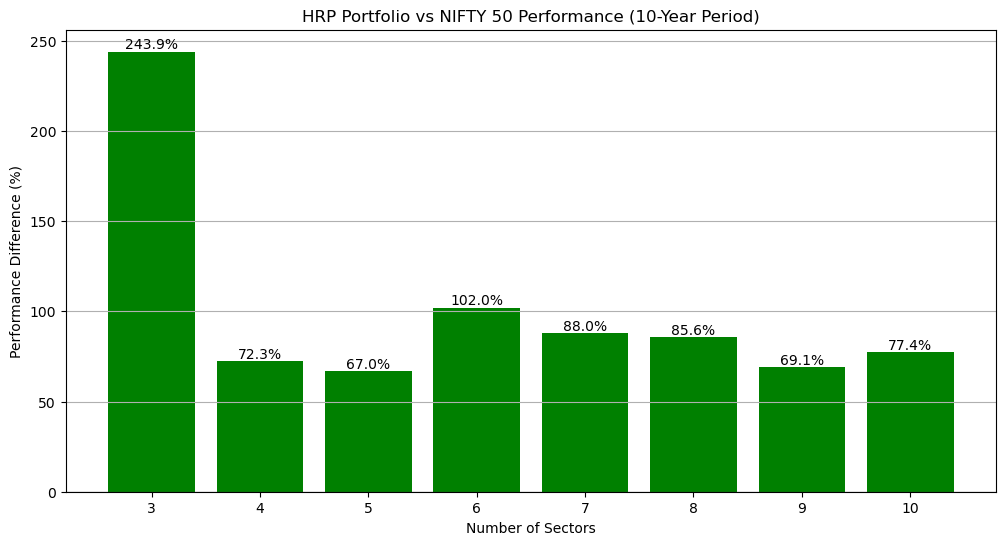


--- Investment Advice as of 2025-04-01 ---
Using training data from 2024-07-22 to 2025-03-31:

--- Top 3 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:

Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%

Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:

Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%

Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%
------------------------------------------------------------
--- Top 6 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%
------------------------------------------------------------
--- Top 7 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%
------------------------------------------------------------
--- Top 8 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%
------------------------------------------------------------
--- Top 9 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXAUTO
  Top Stocks: ['EICHERMOT.NS', 'TVSMOTOR.NS', 'M&M.NS', 'ASHOKLEY.NS', 'MARUTI.NS']
  Recommended HRP Weights:
    EICHERMOT.NS: 9.35%
    TVSMOTOR.NS: 8.41%
    M&M.NS: 44.86%
    ASHOKLEY.NS: 28.04%
    MARUTI.NS: 9.35%
------------------------------------------------------------
--- Top 10 Sectors Recommendation ---
Selected Sectors and Their Top 5 Stocks with Recommended Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXSERVICE
  Top Stocks: ['MUTHOOTFIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS']
  Recommended HRP Weights:
    MUTHOOTFIN.NS: 28.04%
    BAJFINANCE.NS: 8.41%
    KOTAKBANK.NS: 9.35%
    BAJAJFINSV.NS: 44.86%
    SHRIRAMFIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXMETAL
  Top Stocks: ['WELCORP.NS', 'JSWSTEEL.NS', 'VEDL.NS', 'HINDALCO.NS', 'APLAPOLLO.NS']
  Recommended HRP Weights:
    WELCORP.NS: 8.41%
    JSWSTEEL.NS: 28.04%
    VEDL.NS: 9.35%
    HINDALCO.NS: 9.35%
    APLAPOLLO.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXIT
  Top Stocks: ['COFORGE.NS', 'PERSISTENT.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']
  Recommended HRP Weights:
    COFORGE.NS: 28.04%
    PERSISTENT.NS: 9.35%
    WIPRO.NS: 8.41%
    HCLTECH.NS: 9.35%
    TECHM.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^NSEBANK
  Top Stocks: ['KOTAKBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'FEDERALBNK.NS', 'BANKBARODA.NS']
  Recommended HRP Weights:
    KOTAKBANK.NS: 9.35%
    HDFCBANK.NS: 8.41%
    ICICIBANK.NS: 44.86%
    FEDERALBNK.NS: 28.04%
    BANKBARODA.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXINFRA
  Top Stocks: ['BHARTIARTL.NS', 'INDHOTEL.NS', 'SHREECEM.NS', 'HINDPETRO.NS', 'APOLLOHOSP.NS']
  Recommended HRP Weights:
    BHARTIARTL.NS: 8.41%
    INDHOTEL.NS: 9.35%
    SHREECEM.NS: 44.86%
    HINDPETRO.NS: 28.04%
    APOLLOHOSP.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSUBANK
  Top Stocks: ['INDIANB.NS', 'UNIONBANK.NS', 'BANKINDIA.NS', 'BANKBARODA.NS', 'SBIN.NS']
  Recommended HRP Weights:
    INDIANB.NS: 9.35%
    UNIONBANK.NS: 8.41%
    BANKINDIA.NS: 44.86%
    BANKBARODA.NS: 28.04%
    SBIN.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXPSE
  Top Stocks: ['HINDPETRO.NS', 'BEL.NS', 'BPCL.NS', 'NTPC.NS', 'NMDC.NS']
  Recommended HRP Weights:
    HINDPETRO.NS: 28.04%
    BEL.NS: 9.35%
    BPCL.NS: 9.35%
    NTPC.NS: 8.41%
    NMDC.NS: 44.86%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXREALTY
  Top Stocks: ['ANANTRAJ.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS', 'DLF.NS', 'BRIGADE.NS']
  Recommended HRP Weights:
    ANANTRAJ.NS: 9.35%
    OBEROIRLTY.NS: 8.41%
    PHOENIXLTD.NS: 28.04%
    DLF.NS: 44.86%
    BRIGADE.NS: 9.35%


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector: ^CNXAUTO
  Top Stocks: ['EICHERMOT.NS', 'TVSMOTOR.NS', 'M&M.NS', 'ASHOKLEY.NS', 'MARUTI.NS']
  Recommended HRP Weights:
    EICHERMOT.NS: 9.35%
    TVSMOTOR.NS: 8.41%
    M&M.NS: 44.86%
    ASHOKLEY.NS: 28.04%
    MARUTI.NS: 9.35%

Sector: ^CNXENERGY
  Top Stocks: ['RPOWER.NS', 'GVT&D.NS', 'HINDPETRO.NS', 'TORNTPOWER.NS', 'TRITURBINE.NS']
  Recommended HRP Weights:
    RPOWER.NS: 8.41%
    GVT&D.NS: 28.04%
    HINDPETRO.NS: 9.35%
    TORNTPOWER.NS: 44.86%
    TRITURBINE.NS: 9.35%
------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\1347459497.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import requests

# =============================================================================
# 0. User Input: Number of Years for Simulation (between 1 and 15)
# =============================================================================
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-15): "))
        if 1 <= num_years <= 15:
            break
        else:
            print("Please enter a number between 1 and 15.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 15.")

# =============================================================================
# 1. Sector Data Download and Preprocessing (using sector indices)
# =============================================================================
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

prices = pd.concat(data_dict, axis=1).dropna()
# If columns are multi-index, reset to plain tickers.
if isinstance(prices.columns, pd.MultiIndex):
    prices.columns = prices.columns.get_level_values(0)
returns = prices.pct_change().dropna()

# =============================================================================
# 2. Download Benchmark Data for Trend/Stoploss Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded for trend analysis.")
benchmark_series = benchmark_data['Close'].squeeze()

# =============================================================================
# 3. Correlation Analysis & Clustering for Diversification (Sector Level)
# =============================================================================
correlation_matrix = returns.corr()
print(f"\nCorrelation Matrix of Sector Returns (Last {num_years} Years):")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values
sector_labels = kmeans.fit_predict(sector_features)
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 4. Validated Stocks Extraction: Read Valid Stock Components from CSV File
# =============================================================================
# Expect 'validated_stocks.csv' with columns "Sector" and "Symbol"
try:
    df_valid = pd.read_csv('validated_stocks.csv')
    all_symbols = {}
    for sector, group in df_valid.groupby('Sector'):
        symbols = group['Symbol'].tolist()
        symbols = [s if s.endswith('.NS') else s + '.NS' for s in symbols]
        all_symbols[sector] = symbols
        print(f"Valid symbols for {sector}: {symbols}")
        print("----------")
except Exception as e:
    print("Error reading validated stocks file:", e)
    all_symbols = {}

# =============================================================================
# 5. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    """
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    corr = returns_df.corr().fillna(0)
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    return weights / weights.sum()

# =============================================================================
# 6. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification.
    """
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    return selected[:n]

# =============================================================================
# 7. Function to Select Top Stocks within a Sector
# =============================================================================
def get_top_stocks(sector, train_start, train_end, top_n=5):
    """
    For a given sector, download historical data for its valid component stocks (from all_symbols)
    over the training period, compute Sharpe ratios, and return the top 'top_n' stocks along with
    their HRP weights.
    """
    symbols = all_symbols.get(sector, [])
    if not symbols:
        print(f"No valid symbols available for sector {sector}.")
        return [], pd.Series(dtype=float)
    
    stock_data = yf.download(symbols, start=train_start, end=train_end, progress=False, auto_adjust=True)
    if 'Close' in stock_data.columns:
        prices_stock = stock_data['Close']
    else:
        prices_stock = stock_data
    prices_stock = prices_stock.dropna(how='all', axis=0)
    if prices_stock.empty:
        print(f"No training data available for stocks in sector {sector}.")
        return [], pd.Series(dtype=float)
    
    returns_stock = prices_stock.pct_change().dropna()
    sharpe = returns_stock.mean() / returns_stock.std()
    sharpe = sharpe.dropna()
    top_stocks = sharpe.sort_values(ascending=False).head(top_n).index.tolist()
    selected_returns = returns_stock[top_stocks]
    hrp_weights_stocks = get_hrp_weights(selected_returns)
    return top_stocks, hrp_weights_stocks

# =============================================================================
# 8. Quarterly Rebalancing Simulation with Enhanced Risk Management & Transaction Costs
# =============================================================================
print("\n--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
stoploss_pct = 0.05  # 5% stoploss threshold
transaction_cost_rate = 0.00075  # 0.15% per trade (0.075% per buy and sell)

results_summary = []
all_quarterly_results = {}

def get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates):
    if i == 0:
        return 1.0
    prev_q_start = prices.index[0] if i-1 == 0 else quarter_end_dates[i-2] + pd.Timedelta(days=1)
    prev_q_end = quarter_end_dates[i-1]
    benchmark_prev = benchmark_series[(benchmark_series.index >= prev_q_start) & (benchmark_series.index <= prev_q_end)]
    if benchmark_prev.empty:
        return 1.0
    prev_return = (benchmark_prev.iloc[-1] / benchmark_prev.iloc[0]) - 1
    return np.clip(1 + prev_return, 0.5, 1.0)

# Loop over different numbers of sectors to invest in (from 3 to 10)
for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []
    quarterly_results = []
    
    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        sharpe_scores = training_returns.mean() / training_returns.std()
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        selected_training_returns = training_returns[selected_sectors]
        sector_hrp_weights = get_hrp_weights(selected_training_returns)
        
        # For each selected sector, determine top 5 stocks and get their HRP weights.
        sector_stock_info = {}
        sector_stock_returns = {}
        sector_weighted_returns = {}
        
        for sector in selected_sectors:
            # Use the same training period as for sectors.
            train_start = training_prices.index[0].date()
            train_end = training_end.date()
            top_stocks, stock_hrp_weights = get_top_stocks(sector, train_start, train_end, top_n=5)
            if not top_stocks:
                continue
            stock_prices = yf.download(top_stocks, start=q_start, end=q_end, progress=False, auto_adjust=True)
            if 'Close' in stock_prices.columns:
                stock_prices = stock_prices['Close']
            stock_prices = stock_prices.dropna(how='all', axis=0)
            if stock_prices.empty or len(stock_prices) < 2:
                continue
            start_prices = stock_prices.iloc[0]
            end_prices = stock_prices.iloc[-1]
            stock_ret = (end_prices / start_prices) - 1
            weighted_return = np.dot(stock_hrp_weights[top_stocks], stock_ret[top_stocks])
            
            sector_stock_info[sector] = {
                'top_stocks': top_stocks,
                'stock_hrp_weights': stock_hrp_weights[top_stocks].to_dict()
            }
            sector_stock_returns[sector] = stock_ret.to_dict()
            sector_weighted_returns[sector] = weighted_return
        
        if not sector_weighted_returns:
            continue
        
        overall_return = 0
        for sector in selected_sectors:
            if sector in sector_weighted_returns:
                overall_return += sector_hrp_weights[sector] * sector_weighted_returns[sector]
        
        # Modified Stoploss: if daily cumulative drop is below threshold, 
        # then use effective return = raw return if raw return is better than -stoploss_pct.
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        daily_returns = period_prices.pct_change().dropna()
        daily_portfolio_returns = daily_returns.apply(lambda row: np.dot([sector_hrp_weights[s] for s in selected_sectors], row[selected_sectors]), axis=1)
        cum_daily = (1 + daily_portfolio_returns).cumprod()
        if cum_daily.min() < (1 - stoploss_pct):
            stoploss_triggered = True
            stoploss_return = overall_return if overall_return > -stoploss_pct else -stoploss_pct
        else:
            stoploss_triggered = False
            stoploss_return = overall_return
        
        risk_factor = get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates)
        effective_return = risk_factor * stoploss_return
        
        net_value_entry = cumulative_value * (1 - transaction_cost_rate)
        new_value = net_value_entry * (1 + effective_return)
        net_value_exit = new_value * (1 - transaction_cost_rate)
        cumulative_value = net_value_exit
        quarterly_returns.append(effective_return)
        
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'sector_hrp_weights': sector_hrp_weights.to_dict(),
            'sector_stock_info': sector_stock_info,
            'sector_stock_returns': sector_stock_returns,
            'sector_weighted_returns': sector_weighted_returns,
            'raw_portfolio_return': overall_return,
            'stoploss_triggered': stoploss_triggered,
            'stoploss_return': stoploss_return,
            'risk_factor': risk_factor,
            'effective_portfolio_return': effective_return,
            'cumulative_value': cumulative_value
        })
        
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  Sector HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {sector_hrp_weights[sector]:.2%}")
            if sector in sector_stock_info:
                info = sector_stock_info[sector]
                print("      Top Stocks & Weights:")
                for stock, wt in info['stock_hrp_weights'].items():
                    print(f"        {stock}: {wt:.2%}")
        print(f"  Raw Portfolio Return: {overall_return:.2%}")
        if stoploss_triggered:
            print(f"  STOPLOSS Triggered: Capped Return = {stoploss_return:.2%}")
        print(f"  Risk Factor: {risk_factor:.2f}")
        print(f"  Effective Portfolio Return: {effective_return:.2%}")
        print(f"  Cumulative Value after Transaction Costs: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan
    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# 9. Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
initial_capital_bench = 100000
benchmark_results = []

filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price = float(filtered_data.iloc[0])
end_price = float(filtered_data.iloc[-1])
total_return = (end_price / start_price) - 1
cagr = ((1 + total_return) ** (1/num_years)) - 1
final_value = initial_capital_bench * (1 + total_return)

benchmark_results.append({
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return * 100, 2),
    'CAGR (%)': round(cagr * 100, 2),
    'Final Portfolio Value': round(final_value, 2)
})

benchmark_results_df = pd.DataFrame(benchmark_results)
print(f"\n=== NIFTY 50 Benchmark Performance ({num_years} Years) ===")
print(benchmark_results_df.to_string(index=False))

nifty_final = final_value
comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_final) / nifty_final * 100
).round(2)

print(f"\n=== Final Performance Comparison ({num_years}-Year Period) ===")
print(comparison_df[['Number of Sectors', 'HRP Portfolio Value', 'NIFTY Value', 'Outperformance (%)']].to_string(index=False))

plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'],
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title(f"HRP Portfolio vs NIFTY 50 Performance ({num_years}-Year Period)")
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')
plt.show()

# =============================================================================
# 10. Investment Advice Based on Last 1 Year Data (Stock-Level)
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")
for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors and Their Top 5 Stocks with Recommended Weights:")
    for sector in top_n_sectors:
        top_stocks, stock_hrp_weights = get_top_stocks(sector, advice_training_prices.index[0].date(), advice_training_end.date(), top_n=5)
        if top_stocks:
            print(f"\nSector: {sector}")
            print(f"  Top Stocks: {top_stocks}")
            print("  Recommended HRP Weights:")
            for stock in top_stocks:
                print(f"    {stock}: {stock_hrp_weights[stock]:.2%}")
    print("-" * 60)

In [34]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import time
from pytz import UTC

# Configuration
MIN_YEARS_HISTORY = 10
MIN_DATA_POINTS = 2000  # ~200 trading days/year * 10 years
REQUEST_INTERVAL = 1    # Seconds between requests
MAX_RETRIES = 3         # Max API retries

# Full sector files dictionary
sector_files = {
    "^CNXIT": "^CNXIT.csv",
    "^CNXAUTO": "^CNXAUTO.csv",
    "^NSEBANK": "^NSEBANK.csv",
    "^CNXFMCG": "^CNXFMCG.csv",
    "^CNXMEDIA": "^CNXMEDIA.csv",
    "^CNXMETAL": "^CNXMETAL.csv",
    "^CNXPSE": "^CNXPSE.csv",
    "^CNXMNC": "^CNXMNC.csv",
    "^CNXINFRA": "^CNXINFRA.csv",
    "^CNXREALTY": "^CNXREALTY.csv",
    "^CNXENERGY": "^CNXENERGY.csv",
    "^CNXPSUBANK": "^CNXPSUBANK.csv",
    "^CNXSERVICE": "^CNXSERVICE.csv",
    "^CNXCONSUM": "^CNXCONSUM.csv",
    "NIFTY_MIDCAP_100.NS": "NIFTY_MIDCAP_100.NS.csv"
}

# Dictionary to hold symbols for each sector (with .NS extension)
all_symbols = {}

# Read CSV files and collect symbols
for sector, filename in sector_files.items():
    try:
        df = pd.read_csv(filename)
        symbols = df['Symbol'].tolist()
        symbols_with_ns = [f"{symbol}.NS" for symbol in symbols]
        all_symbols[sector] = symbols_with_ns
        print(f"Processed {sector} with {len(symbols_with_ns)} symbols")
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")
        all_symbols[sector] = []

def get_historical_data(symbol, retries=MAX_RETRIES):
    """Get historical data with retry logic"""
    for attempt in range(retries):
        try:
            ticker = yf.Ticker(symbol)
            hist = ticker.history(
                period="max",
                interval="1d",
                actions=False,
                timeout=10
            )
            return hist
        except Exception as e:
            if attempt < retries - 1:
                time.sleep(2)
                continue
            return None

def is_valid_stock(symbol):
    """Enhanced validation with timezone handling"""
    try:
        hist = get_historical_data(symbol)
        
        if hist is None or hist.empty:
            return False, "No historical data"
            
        # Ensure tz-aware index
        if not hist.index.tz:
            hist.index = hist.index.tz_localize(UTC)
            
        # Calculate cutoff date (UTC)
        cutoff_date = pd.Timestamp.now(tz=UTC) - pd.DateOffset(years=MIN_YEARS_HISTORY)
        
        # Find first valid date with closing price
        valid_dates = hist[hist['Close'].notna()].index
        if not valid_dates.empty:
            start_date = valid_dates[0]
        else:
            return False, "No valid closing prices"
            
        # Check history length
        if start_date > cutoff_date:
            return False, f"History starts {start_date.strftime('%Y-%m-%d')}"
            
        # Check data points
        valid_data = hist[hist.index >= start_date]
        if len(valid_data) < MIN_DATA_POINTS:
            return False, f"Only {len(valid_data)} data points"
            
        # Check recent data
        recent_data = hist.last('30D')
        if recent_data.empty:
            return False, "No recent data"
            
        return True, "Valid"
        
    except Exception as e:
        return False, f"Validation error: {str(e)}"

# Validate symbols with comprehensive checks
validation_results = {}

for sector, symbols in all_symbols.items():
    print(f"\nValidating {sector}...")
    sector_results = {
        'valid': [],
        'invalid': {},
        'total': len(symbols)
    }
    
    for i, symbol in enumerate(symbols):
        time.sleep(REQUEST_INTERVAL)
        
        try:
            valid, reason = is_valid_stock(symbol)
            if valid:
                sector_results['valid'].append(symbol)
            else:
                sector_results['invalid'][symbol] = reason
        except Exception as e:
            sector_results['invalid'][symbol] = f"Unexpected error: {str(e)}"
            
    validation_results[sector] = sector_results

# Generate final report
print("\n\nFinal Validation Report:")
for sector, results in validation_results.items():
    print(f"\nSector: {sector}")
    print(f"Total symbols: {results['total']}")
    print(f"Valid symbols: {len(results['valid'])}")
    print(f"Invalid symbols: {len(results['invalid'])}")
    
    if results['invalid']:
        print("\nInvalid Symbols:")
        for symbol, reason in results['invalid'].items():
            print(f"{symbol}: {reason}")

# Save validated symbols to CSV
valid_symbols = []
for sector, symbols in validation_results.items():
    valid_symbols.extend([(sector, sym) for sym in symbols['valid']])

pd.DataFrame(valid_symbols, columns=['Sector', 'Symbol']).to_csv("validated_stocks.csv", index=False)
print("\nSaved validated symbols to validated_stocks.csv")

Processed ^CNXIT with 10 symbols
Processed ^CNXAUTO with 15 symbols
Processed ^NSEBANK with 12 symbols
Processed ^CNXFMCG with 15 symbols
Processed ^CNXMEDIA with 10 symbols
Processed ^CNXMETAL with 15 symbols
Processed ^CNXPSE with 20 symbols
Processed ^CNXMNC with 30 symbols
Processed ^CNXINFRA with 30 symbols
Processed ^CNXREALTY with 10 symbols
Processed ^CNXENERGY with 40 symbols
Processed ^CNXPSUBANK with 12 symbols
Processed ^CNXSERVICE with 20 symbols
Processed ^CNXCONSUM with 30 symbols
Processed NIFTY_MIDCAP_100.NS with 100 symbols

Validating ^CNXIT...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXAUTO...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^NSEBANK...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXFMCG...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXMEDIA...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXMETAL...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXPSE...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXMNC...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXINFRA...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXREALTY...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXENERGY...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXPSUBANK...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXSERVICE...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating ^CNXCONSUM...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l


Validating NIFTY_MIDCAP_100.NS...


C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: l



Final Validation Report:

Sector: ^CNXIT
Total symbols: 10
Valid symbols: 9
Invalid symbols: 1

Invalid Symbols:
LTIM.NS: History starts 2016-07-21

Sector: ^CNXAUTO
Total symbols: 15
Valid symbols: 14
Invalid symbols: 1

Invalid Symbols:
TIINDIA.NS: History starts 2017-11-02

Sector: ^NSEBANK
Total symbols: 12
Valid symbols: 10
Invalid symbols: 2

Invalid Symbols:
AUBANK.NS: History starts 2017-07-11
IDFCFIRSTB.NS: History starts 2015-11-06

Sector: ^CNXFMCG
Total symbols: 15
Valid symbols: 13
Invalid symbols: 2

Invalid Symbols:
UNITDSPR.NS: History starts 2024-05-30
VBL.NS: History starts 2016-11-08

Sector: ^CNXMEDIA
Total symbols: 10
Valid symbols: 8
Invalid symbols: 2

Invalid Symbols:
NAZARA.NS: History starts 2021-03-30
PVRINOX.NS: History starts 2022-11-10

Sector: ^CNXMETAL
Total symbols: 15
Valid symbols: 14
Invalid symbols: 1

Invalid Symbols:
LLOYDSME.NS: History starts 2023-07-17

Sector: ^CNXPSE
Total symbols: 20
Valid symbols: 16
Invalid symbols: 4

Invalid Symbols:
H

C:\Users\sarda\AppData\Local\Temp\ipykernel_15320\3794486860.py:97: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = hist.last('30D')
